In [3]:
pip install koreanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 39.3 MB/s eta 0:00:00


In [4]:
import os
import random
import plotly 
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import koreanize_matplotlib
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor


warnings.filterwarnings("ignore")
# pd.options.display.max_rows = None
# pd.options.display.max_columns = None
%config InlineBackend.figure_format = 'retina'


# plt.style.use('dark_background')
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'NanumGothic'

In [5]:
train = pd.read_csv('train_mldl_돌려도_되는_버전.csv')
test = pd.read_csv('test_mldl_돌려도_되는_버전.csv')
submission = pd.read_csv('sample_submission.csv')

In [6]:
train_OHI = pd.get_dummies(train)
print(train_OHI.shape)
train_OHI.head(2)

test_OHI = pd.get_dummies(test)
print(test_OHI.shape)
test_OHI.head(2)

(7500, 13)
(7500, 12)


,운동시간(분),나이,키_scaled,체중(kg)_scaled,심박수(BPM)_scaled,체온(C)_scaled,BMI_scaled,성별_F,성별_M,체중상태_과체중,체중상태_보통체중,체중상태_비만
0,26.0,45,-1.371519,-1.533814,1.196443,0.747076,-1.710789,1,0,0,1,0
1,29.0,21,0.950143,1.006669,1.614011,0.604820,0.718424,0,1,1,0,0


In [7]:
# 모델 학습
X = train_OHI.drop(columns=['소모칼로리'])
y = train_OHI['소모칼로리']

In [8]:
import tensorflow as tf

tf.__version__

'2.12.0'

In [10]:
model = tf.keras.Sequential([
    # tf.keras.layers.BatchNormalization(input_shape=X_train.iloc[0].shape),
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=X.iloc[0].shape),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1)
])

In [11]:
optimizer = tf.keras.optimizers.Adam(0.001)

model.compile(loss="mse", 
              optimizer=optimizer, 
              metrics=["mse", "mae"]
              )

In [12]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history = model.fit(X, y, 
                    epochs=1000,
                    batch_size=64,
                    callbacks=[early_stop], verbose=1)
history

Epoch 1/1000
104/118 [=========================>....] - ETA: 0s - loss: 6505.9927 - mse: 6505.9927 - mae: 61.7386

118/118 [==============================] - 2s 4ms/step - loss: 6063.7959 - mse: 6063.7959 - mae: 59.2513
Epoch 2/1000
116/118 [============================>.] - ETA: 0s - loss: 1549.5941 - mse: 1549.5941 - mae: 31.7663

118/118 [==============================] - 0s 3ms/step - loss: 1540.1333 - mse: 1540.1333 - mae: 31.6503
Epoch 3/1000
103/118 [=========================>....] - ETA: 0s - loss: 607.8564 - mse: 607.8564 - mae: 18.9039

118/118 [==============================] - 0s 2ms/step - loss: 593.5355 - mse: 593.5355 - mae: 18.5935
Epoch 4/1000
114/118 [===========================>..] - ETA: 0s - loss: 412.9593 - mse: 412.9593 - mae: 15.3219

118/118 [==============================] - 0s 2ms/step - loss: 411.7620 - mse: 411.7620 - mae: 15.3058
Epoch 5/1000
113/118 [===========================>..] - ETA: 0s - loss: 362.4767 - mse: 362.4767 - mae: 14.3486

118/118 [==============================] - 0s 2ms/step - loss: 362.1854 - mse: 362.1854 - mae: 14.3634
Epoch 6/1000
117/118 [============================>.] - ETA: 0s - loss: 353.2376 - mse: 353.2376 - mae: 14.0437

118/118 [==============================] - 0s 2ms/step - loss: 353.2993 - mse: 353.2993 - mae: 14.0480
Epoch 7/1000
115/118 [============================>.] - ETA: 0s - loss: 319.4259 - mse: 319.4259 - mae: 13.3537

118/118 [==============================] - 0s 2ms/step - loss: 318.4847 - mse: 318.4847 - mae: 13.3426
Epoch 8/1000
103/118 [=========================>....] - ETA: 0s - loss: 288.1152 - mse: 288.1152 - mae: 12.6693

118/118 [==============================] - 0s 3ms/step - loss: 287.0882 - mse: 287.0882 - mae: 12.6343
Epoch 9/1000
 97/118 [=======================>......] - ETA: 0s - loss: 273.1292 - mse: 273.1292 - mae: 12.2340

118/118 [==============================] - 0s 2ms/step - loss: 270.7090 - mse: 270.7090 - mae: 12.1961
Epoch 10/1000
 92/118 [======================>.......] - ETA: 0s - loss: 253.8988 - mse: 253.8988 - mae: 11.8790

118/118 [==============================] - 0s 2ms/step - loss: 252.3141 - mse: 252.3141 - mae: 11.8490
Epoch 11/1000
103/118 [=========================>....] - ETA: 0s - loss: 243.1241 - mse: 243.1241 - mae: 11.5146

118/118 [==============================] - 0s 2ms/step - loss: 243.3511 - mse: 243.3511 - mae: 11.5388
Epoch 12/1000
 99/118 [========================>.....] - ETA: 0s - loss: 216.2783 - mse: 216.2783 - mae: 10.8251

118/118 [==============================] - 0s 2ms/step - loss: 220.5423 - mse: 220.5423 - mae: 10.9153
Epoch 13/1000
 98/118 [=======================>......] - ETA: 0s - loss: 201.4841 - mse: 201.4841 - mae: 10.5040

118/118 [==============================] - 0s 2ms/step - loss: 207.5930 - mse: 207.5930 - mae: 10.6242
Epoch 14/1000
 99/118 [========================>.....] - ETA: 0s - loss: 197.3358 - mse: 197.3358 - mae: 10.4221

118/118 [==============================] - 0s 2ms/step - loss: 191.8792 - mse: 191.8792 - mae: 10.3021
Epoch 15/1000
104/118 [=========================>....] - ETA: 0s - loss: 186.6052 - mse: 186.6052 - mae: 10.0396

118/118 [==============================] - 0s 2ms/step - loss: 182.8437 - mse: 182.8437 - mae: 9.9808
Epoch 16/1000
101/118 [========================>.....] - ETA: 0s - loss: 172.8811 - mse: 172.8811 - mae: 9.6774

118/118 [==============================] - 0s 2ms/step - loss: 173.1288 - mse: 173.1288 - mae: 9.6655
Epoch 17/1000
 95/118 [=======================>......] - ETA: 0s - loss: 168.8932 - mse: 168.8932 - mae: 9.5452

118/118 [==============================] - 0s 2ms/step - loss: 167.6709 - mse: 167.6709 - mae: 9.5137
Epoch 18/1000
 98/118 [=======================>......] - ETA: 0s - loss: 155.5452 - mse: 155.5452 - mae: 9.2792

118/118 [==============================] - 0s 2ms/step - loss: 157.0324 - mse: 157.0324 - mae: 9.2927
Epoch 19/1000
 95/118 [=======================>......] - ETA: 0s - loss: 149.1966 - mse: 149.1966 - mae: 9.0382

118/118 [==============================] - 0s 2ms/step - loss: 146.5571 - mse: 146.5571 - mae: 8.9678
Epoch 20/1000
104/118 [=========================>....] - ETA: 0s - loss: 150.6205 - mse: 150.6205 - mae: 9.0228

118/118 [==============================] - 0s 2ms/step - loss: 149.7707 - mse: 149.7707 - mae: 9.0027
Epoch 21/1000
 97/118 [=======================>......] - ETA: 0s - loss: 144.5864 - mse: 144.5864 - mae: 8.7880

118/118 [==============================] - 0s 2ms/step - loss: 141.2478 - mse: 141.2478 - mae: 8.7102
Epoch 22/1000
103/118 [=========================>....] - ETA: 0s - loss: 136.5761 - mse: 136.5761 - mae: 8.5467

118/118 [==============================] - 0s 2ms/step - loss: 135.6236 - mse: 135.6236 - mae: 8.4881
Epoch 23/1000
 98/118 [=======================>......] - ETA: 0s - loss: 131.4937 - mse: 131.4937 - mae: 8.2901

118/118 [==============================] - 0s 2ms/step - loss: 131.0327 - mse: 131.0327 - mae: 8.2965
Epoch 24/1000
 95/118 [=======================>......] - ETA: 0s - loss: 123.2338 - mse: 123.2338 - mae: 8.1269

118/118 [==============================] - 0s 2ms/step - loss: 124.3148 - mse: 124.3148 - mae: 8.1477
Epoch 25/1000
102/118 [========================>.....] - ETA: 0s - loss: 122.5337 - mse: 122.5337 - mae: 8.0424

118/118 [==============================] - 0s 2ms/step - loss: 123.0007 - mse: 123.0007 - mae: 8.0511
Epoch 26/1000
 99/118 [========================>.....] - ETA: 0s - loss: 118.3340 - mse: 118.3340 - mae: 7.8994

118/118 [==============================] - 0s 2ms/step - loss: 119.7955 - mse: 119.7955 - mae: 7.9262
Epoch 27/1000
110/118 [==========================>...] - ETA: 0s - loss: 116.5926 - mse: 116.5926 - mae: 7.7906

118/118 [==============================] - 0s 2ms/step - loss: 116.9834 - mse: 116.9834 - mae: 7.7922
Epoch 28/1000
101/118 [========================>.....] - ETA: 0s - loss: 112.5898 - mse: 112.5898 - mae: 7.5550

118/118 [==============================] - 0s 2ms/step - loss: 112.2883 - mse: 112.2883 - mae: 7.5551
Epoch 29/1000
 97/118 [=======================>......] - ETA: 0s - loss: 112.1102 - mse: 112.1102 - mae: 7.5512

118/118 [==============================] - 0s 2ms/step - loss: 112.1915 - mse: 112.1915 - mae: 7.5731
Epoch 30/1000
101/118 [========================>.....] - ETA: 0s - loss: 109.1159 - mse: 109.1159 - mae: 7.4537

118/118 [==============================] - 0s 2ms/step - loss: 110.1049 - mse: 110.1049 - mae: 7.4796
Epoch 31/1000
115/118 [============================>.] - ETA: 0s - loss: 104.9007 - mse: 104.9007 - mae: 7.2979

118/118 [==============================] - 0s 2ms/step - loss: 104.6490 - mse: 104.6490 - mae: 7.2943
Epoch 32/1000
117/118 [============================>.] - ETA: 0s - loss: 99.8303 - mse: 99.8303 - mae: 7.1638

118/118 [==============================] - 0s 3ms/step - loss: 99.8455 - mse: 99.8455 - mae: 7.1665
Epoch 33/1000
106/118 [=========================>....] - ETA: 0s - loss: 98.6268 - mse: 98.6268 - mae: 7.1164

118/118 [==============================] - 1s 5ms/step - loss: 98.1160 - mse: 98.1160 - mae: 7.0896
Epoch 34/1000
116/118 [============================>.] - ETA: 0s - loss: 92.2033 - mse: 92.2033 - mae: 6.8738

118/118 [==============================] - 1s 5ms/step - loss: 92.4321 - mse: 92.4321 - mae: 6.8781
Epoch 35/1000
114/118 [===========================>..] - ETA: 0s - loss: 97.9973 - mse: 97.9973 - mae: 7.0393

118/118 [==============================] - 0s 2ms/step - loss: 98.4149 - mse: 98.4149 - mae: 7.0548
Epoch 36/1000
108/118 [==========================>...] - ETA: 0s - loss: 95.4012 - mse: 95.4012 - mae: 6.9095

118/118 [==============================] - 0s 3ms/step - loss: 93.9647 - mse: 93.9647 - mae: 6.8571
Epoch 37/1000
112/118 [===========================>..] - ETA: 0s - loss: 90.4056 - mse: 90.4056 - mae: 6.7622

118/118 [==============================] - 0s 3ms/step - loss: 89.8502 - mse: 89.8502 - mae: 6.7520
Epoch 38/1000
116/118 [============================>.] - ETA: 0s - loss: 92.8450 - mse: 92.8450 - mae: 6.8606

118/118 [==============================] - 0s 3ms/step - loss: 92.8451 - mse: 92.8451 - mae: 6.8606
Epoch 39/1000
117/118 [============================>.] - ETA: 0s - loss: 86.8932 - mse: 86.8932 - mae: 6.6443

118/118 [==============================] - 1s 6ms/step - loss: 86.8654 - mse: 86.8654 - mae: 6.6438
Epoch 40/1000
118/118 [==============================] - ETA: 0s - loss: 87.2362 - mse: 87.2362 - mae: 6.6234

118/118 [==============================] - 1s 12ms/step - loss: 87.2362 - mse: 87.2362 - mae: 6.6234
Epoch 41/1000
114/118 [===========================>..] - ETA: 0s - loss: 88.6782 - mse: 88.6782 - mae: 6.5863

118/118 [==============================] - 1s 9ms/step - loss: 88.3436 - mse: 88.3436 - mae: 6.5791
Epoch 42/1000
117/118 [============================>.] - ETA: 0s - loss: 87.2635 - mse: 87.2635 - mae: 6.5716

118/118 [==============================] - 1s 8ms/step - loss: 87.2690 - mse: 87.2690 - mae: 6.5736
Epoch 43/1000
114/118 [===========================>..] - ETA: 0s - loss: 84.7838 - mse: 84.7838 - mae: 6.5316

118/118 [==============================] - 1s 9ms/step - loss: 84.8103 - mse: 84.8103 - mae: 6.5321
Epoch 44/1000
110/118 [==========================>...] - ETA: 0s - loss: 84.8866 - mse: 84.8866 - mae: 6.4923

118/118 [==============================] - 1s 6ms/step - loss: 84.4105 - mse: 84.4105 - mae: 6.4599
Epoch 45/1000
113/118 [===========================>..] - ETA: 0s - loss: 83.9927 - mse: 83.9927 - mae: 6.4511

118/118 [==============================] - 1s 5ms/step - loss: 84.9865 - mse: 84.9865 - mae: 6.4749
Epoch 46/1000
114/118 [===========================>..] - ETA: 0s - loss: 85.3320 - mse: 85.3320 - mae: 6.4827

118/118 [==============================] - 1s 5ms/step - loss: 84.7770 - mse: 84.7770 - mae: 6.4645
Epoch 47/1000
113/118 [===========================>..] - ETA: 0s - loss: 82.7269 - mse: 82.7269 - mae: 6.3488

118/118 [==============================] - 0s 4ms/step - loss: 82.6309 - mse: 82.6309 - mae: 6.3517
Epoch 48/1000
 97/118 [=======================>......] - ETA: 0s - loss: 81.8371 - mse: 81.8371 - mae: 6.2575

118/118 [==============================] - 0s 2ms/step - loss: 81.7748 - mse: 81.7748 - mae: 6.2974
Epoch 49/1000
116/118 [============================>.] - ETA: 0s - loss: 79.7000 - mse: 79.7000 - mae: 6.2713

118/118 [==============================] - 0s 2ms/step - loss: 79.5664 - mse: 79.5664 - mae: 6.2671
Epoch 50/1000
 94/118 [======================>.......] - ETA: 0s - loss: 82.3821 - mse: 82.3821 - mae: 6.3082

118/118 [==============================] - 0s 2ms/step - loss: 82.8263 - mse: 82.8263 - mae: 6.3297
Epoch 51/1000
 96/118 [=======================>......] - ETA: 0s - loss: 77.4580 - mse: 77.4580 - mae: 6.1717

118/118 [==============================] - 0s 2ms/step - loss: 78.3188 - mse: 78.3188 - mae: 6.2187
Epoch 52/1000
 98/118 [=======================>......] - ETA: 0s - loss: 78.3198 - mse: 78.3198 - mae: 6.1951

118/118 [==============================] - 0s 2ms/step - loss: 79.2584 - mse: 79.2584 - mae: 6.2076
Epoch 53/1000
101/118 [========================>.....] - ETA: 0s - loss: 78.2417 - mse: 78.2417 - mae: 6.1564

118/118 [==============================] - 0s 2ms/step - loss: 79.5140 - mse: 79.5140 - mae: 6.2031
Epoch 54/1000
118/118 [==============================] - ETA: 0s - loss: 76.2687 - mse: 76.2687 - mae: 6.1476

118/118 [==============================] - 0s 2ms/step - loss: 76.2687 - mse: 76.2687 - mae: 6.1476
Epoch 55/1000
 98/118 [=======================>......] - ETA: 0s - loss: 79.6489 - mse: 79.6489 - mae: 6.1883

118/118 [==============================] - 0s 2ms/step - loss: 78.0913 - mse: 78.0913 - mae: 6.1513
Epoch 56/1000
 97/118 [=======================>......] - ETA: 0s - loss: 77.6065 - mse: 77.6065 - mae: 6.1381

118/118 [==============================] - 0s 2ms/step - loss: 78.8287 - mse: 78.8287 - mae: 6.1984
Epoch 57/1000
113/118 [===========================>..] - ETA: 0s - loss: 73.2016 - mse: 73.2016 - mae: 5.9862

118/118 [==============================] - 0s 3ms/step - loss: 73.7185 - mse: 73.7185 - mae: 6.0007
Epoch 58/1000
112/118 [===========================>..] - ETA: 0s - loss: 77.2946 - mse: 77.2946 - mae: 6.1582

118/118 [==============================] - 1s 4ms/step - loss: 77.1613 - mse: 77.1613 - mae: 6.1448
Epoch 59/1000
113/118 [===========================>..] - ETA: 0s - loss: 73.3859 - mse: 73.3859 - mae: 5.9624

118/118 [==============================] - 0s 2ms/step - loss: 73.1251 - mse: 73.1251 - mae: 5.9488
Epoch 60/1000
111/118 [===========================>..] - ETA: 0s - loss: 73.5028 - mse: 73.5028 - mae: 5.9447

118/118 [==============================] - 0s 3ms/step - loss: 72.7725 - mse: 72.7725 - mae: 5.9250
Epoch 61/1000
118/118 [==============================] - ETA: 0s - loss: 73.3268 - mse: 73.3268 - mae: 5.9186

118/118 [==============================] - 0s 4ms/step - loss: 73.3268 - mse: 73.3268 - mae: 5.9186
Epoch 62/1000
102/118 [========================>.....] - ETA: 0s - loss: 69.0784 - mse: 69.0784 - mae: 5.7896

118/118 [==============================] - 0s 4ms/step - loss: 70.6432 - mse: 70.6432 - mae: 5.8342
Epoch 63/1000
118/118 [==============================] - ETA: 0s - loss: 74.7800 - mse: 74.7800 - mae: 5.9418

118/118 [==============================] - 1s 7ms/step - loss: 74.7800 - mse: 74.7800 - mae: 5.9418
Epoch 64/1000
116/118 [============================>.] - ETA: 0s - loss: 71.5211 - mse: 71.5211 - mae: 5.9062

118/118 [==============================] - 1s 12ms/step - loss: 71.3188 - mse: 71.3188 - mae: 5.9012
Epoch 65/1000
113/118 [===========================>..] - ETA: 0s - loss: 74.5122 - mse: 74.5122 - mae: 5.9345

118/118 [==============================] - 1s 10ms/step - loss: 74.4329 - mse: 74.4329 - mae: 5.9243
Epoch 66/1000
116/118 [============================>.] - ETA: 0s - loss: 73.0882 - mse: 73.0882 - mae: 5.8906

118/118 [==============================] - 1s 7ms/step - loss: 72.7825 - mse: 72.7825 - mae: 5.8803
Epoch 67/1000
114/118 [===========================>..] - ETA: 0s - loss: 71.3106 - mse: 71.3106 - mae: 5.8083

118/118 [==============================] - 1s 5ms/step - loss: 71.6947 - mse: 71.6947 - mae: 5.8225
Epoch 68/1000
100/118 [========================>.....] - ETA: 0s - loss: 72.3539 - mse: 72.3539 - mae: 5.8804

118/118 [==============================] - 0s 4ms/step - loss: 71.7047 - mse: 71.7047 - mae: 5.8511
Epoch 69/1000
111/118 [===========================>..] - ETA: 0s - loss: 70.7552 - mse: 70.7552 - mae: 5.8348

118/118 [==============================] - 0s 3ms/step - loss: 71.0112 - mse: 71.0112 - mae: 5.8483
Epoch 70/1000
111/118 [===========================>..] - ETA: 0s - loss: 70.0535 - mse: 70.0535 - mae: 5.7431

118/118 [==============================] - 1s 4ms/step - loss: 70.1193 - mse: 70.1193 - mae: 5.7518
Epoch 71/1000
114/118 [===========================>..] - ETA: 0s - loss: 72.1115 - mse: 72.1115 - mae: 5.8304

118/118 [==============================] - 1s 6ms/step - loss: 72.0752 - mse: 72.0752 - mae: 5.8309
Epoch 72/1000
111/118 [===========================>..] - ETA: 0s - loss: 69.8779 - mse: 69.8779 - mae: 5.7744

118/118 [==============================] - 1s 5ms/step - loss: 69.4474 - mse: 69.4474 - mae: 5.7504
Epoch 73/1000
106/118 [=========================>....] - ETA: 0s - loss: 69.0351 - mse: 69.0351 - mae: 5.7055

118/118 [==============================] - 0s 4ms/step - loss: 69.0537 - mse: 69.0537 - mae: 5.7035
Epoch 74/1000
116/118 [============================>.] - ETA: 0s - loss: 73.0847 - mse: 73.0847 - mae: 5.8450

118/118 [==============================] - 0s 3ms/step - loss: 73.0145 - mse: 73.0145 - mae: 5.8455
Epoch 75/1000
106/118 [=========================>....] - ETA: 0s - loss: 66.8264 - mse: 66.8264 - mae: 5.6284

118/118 [==============================] - 0s 3ms/step - loss: 67.4398 - mse: 67.4398 - mae: 5.6458
Epoch 76/1000
108/118 [==========================>...] - ETA: 0s - loss: 69.2549 - mse: 69.2549 - mae: 5.7186

118/118 [==============================] - 0s 2ms/step - loss: 68.2681 - mse: 68.2681 - mae: 5.6682
Epoch 77/1000
117/118 [============================>.] - ETA: 0s - loss: 67.5252 - mse: 67.5252 - mae: 5.6113

118/118 [==============================] - 0s 2ms/step - loss: 67.4905 - mse: 67.4905 - mae: 5.6108
Epoch 78/1000
115/118 [============================>.] - ETA: 0s - loss: 65.0929 - mse: 65.0929 - mae: 5.5257

118/118 [==============================] - 0s 2ms/step - loss: 65.3248 - mse: 65.3248 - mae: 5.5312
Epoch 79/1000
118/118 [==============================] - ETA: 0s - loss: 68.0782 - mse: 68.0782 - mae: 5.6425

118/118 [==============================] - 0s 2ms/step - loss: 68.0782 - mse: 68.0782 - mae: 5.6425
Epoch 80/1000
104/118 [=========================>....] - ETA: 0s - loss: 69.2001 - mse: 69.2001 - mae: 5.5989

118/118 [==============================] - 0s 2ms/step - loss: 68.9519 - mse: 68.9519 - mae: 5.6092
Epoch 81/1000
100/118 [========================>.....] - ETA: 0s - loss: 67.1642 - mse: 67.1642 - mae: 5.6071

118/118 [==============================] - 0s 2ms/step - loss: 67.2293 - mse: 67.2293 - mae: 5.5997
Epoch 82/1000
 96/118 [=======================>......] - ETA: 0s - loss: 68.6926 - mse: 68.6926 - mae: 5.6155

118/118 [==============================] - 0s 2ms/step - loss: 67.7913 - mse: 67.7913 - mae: 5.6063
Epoch 83/1000
 96/118 [=======================>......] - ETA: 0s - loss: 66.8754 - mse: 66.8754 - mae: 5.5679

118/118 [==============================] - 0s 2ms/step - loss: 67.4430 - mse: 67.4430 - mae: 5.5967
Epoch 84/1000
112/118 [===========================>..] - ETA: 0s - loss: 66.5652 - mse: 66.5652 - mae: 5.6131

118/118 [==============================] - 1s 5ms/step - loss: 66.6128 - mse: 66.6128 - mae: 5.6274
Epoch 85/1000
100/118 [========================>.....] - ETA: 0s - loss: 65.5047 - mse: 65.5047 - mae: 5.5161

118/118 [==============================] - 0s 3ms/step - loss: 65.6266 - mse: 65.6266 - mae: 5.5311
Epoch 86/1000
117/118 [============================>.] - ETA: 0s - loss: 61.7478 - mse: 61.7478 - mae: 5.4184

118/118 [==============================] - 0s 2ms/step - loss: 61.7279 - mse: 61.7279 - mae: 5.4186
Epoch 87/1000
 94/118 [======================>.......] - ETA: 0s - loss: 66.6677 - mse: 66.6677 - mae: 5.6004

118/118 [==============================] - 0s 2ms/step - loss: 64.8398 - mse: 64.8398 - mae: 5.5342
Epoch 88/1000
 97/118 [=======================>......] - ETA: 0s - loss: 65.2935 - mse: 65.2935 - mae: 5.5126

118/118 [==============================] - 0s 2ms/step - loss: 65.1951 - mse: 65.1951 - mae: 5.5139
Epoch 89/1000
117/118 [============================>.] - ETA: 0s - loss: 63.8346 - mse: 63.8346 - mae: 5.4238

118/118 [==============================] - 0s 3ms/step - loss: 63.8526 - mse: 63.8526 - mae: 5.4254
Epoch 90/1000
117/118 [============================>.] - ETA: 0s - loss: 65.0887 - mse: 65.0887 - mae: 5.4436

118/118 [==============================] - 1s 6ms/step - loss: 65.0721 - mse: 65.0721 - mae: 5.4428
Epoch 91/1000
117/118 [============================>.] - ETA: 0s - loss: 70.4336 - mse: 70.4336 - mae: 5.6845

118/118 [==============================] - 1s 6ms/step - loss: 70.5340 - mse: 70.5340 - mae: 5.6889
Epoch 92/1000
111/118 [===========================>..] - ETA: 0s - loss: 67.8203 - mse: 67.8203 - mae: 5.5868

118/118 [==============================] - 1s 5ms/step - loss: 69.0372 - mse: 69.0372 - mae: 5.6177
Epoch 93/1000
113/118 [===========================>..] - ETA: 0s - loss: 64.7861 - mse: 64.7861 - mae: 5.5107

118/118 [==============================] - 1s 6ms/step - loss: 64.7561 - mse: 64.7561 - mae: 5.5107
Epoch 94/1000
110/118 [==========================>...] - ETA: 0s - loss: 63.0257 - mse: 63.0257 - mae: 5.4534

118/118 [==============================] - 0s 3ms/step - loss: 62.4313 - mse: 62.4313 - mae: 5.4241
Epoch 95/1000
111/118 [===========================>..] - ETA: 0s - loss: 62.1894 - mse: 62.1894 - mae: 5.4141

118/118 [==============================] - 0s 4ms/step - loss: 62.4068 - mse: 62.4068 - mae: 5.4119
Epoch 96/1000
102/118 [========================>.....] - ETA: 0s - loss: 63.9613 - mse: 63.9613 - mae: 5.3893

118/118 [==============================] - 0s 4ms/step - loss: 64.0348 - mse: 64.0348 - mae: 5.4039
Epoch 97/1000
116/118 [============================>.] - ETA: 0s - loss: 62.7992 - mse: 62.7992 - mae: 5.3902

118/118 [==============================] - 0s 2ms/step - loss: 62.9861 - mse: 62.9861 - mae: 5.3979
Epoch 98/1000
116/118 [============================>.] - ETA: 0s - loss: 67.2732 - mse: 67.2732 - mae: 5.5266

118/118 [==============================] - 0s 2ms/step - loss: 67.1310 - mse: 67.1310 - mae: 5.5202
Epoch 99/1000
117/118 [============================>.] - ETA: 0s - loss: 65.6028 - mse: 65.6028 - mae: 5.5211

118/118 [==============================] - 0s 2ms/step - loss: 65.5258 - mse: 65.5258 - mae: 5.5172
Epoch 100/1000
116/118 [============================>.] - ETA: 0s - loss: 64.8154 - mse: 64.8154 - mae: 5.4687

118/118 [==============================] - 0s 2ms/step - loss: 65.6252 - mse: 65.6252 - mae: 5.4878
Epoch 101/1000
110/118 [==========================>...] - ETA: 0s - loss: 62.3417 - mse: 62.3417 - mae: 5.3375

118/118 [==============================] - 0s 2ms/step - loss: 61.6595 - mse: 61.6595 - mae: 5.3120
Epoch 102/1000
115/118 [============================>.] - ETA: 0s - loss: 65.3653 - mse: 65.3653 - mae: 5.4554

118/118 [==============================] - 0s 2ms/step - loss: 65.3579 - mse: 65.3579 - mae: 5.4564
Epoch 103/1000
100/118 [========================>.....] - ETA: 0s - loss: 64.5388 - mse: 64.5388 - mae: 5.4262

118/118 [==============================] - 0s 2ms/step - loss: 64.5607 - mse: 64.5607 - mae: 5.4339
Epoch 104/1000
114/118 [===========================>..] - ETA: 0s - loss: 63.7166 - mse: 63.7166 - mae: 5.4104

118/118 [==============================] - 0s 2ms/step - loss: 63.6759 - mse: 63.6759 - mae: 5.4147
Epoch 105/1000
108/118 [==========================>...] - ETA: 0s - loss: 63.9982 - mse: 63.9982 - mae: 5.4227

118/118 [==============================] - 1s 5ms/step - loss: 64.5240 - mse: 64.5240 - mae: 5.4347
Epoch 106/1000
106/118 [=========================>....] - ETA: 0s - loss: 64.2815 - mse: 64.2815 - mae: 5.4425

118/118 [==============================] - 0s 3ms/step - loss: 65.8211 - mse: 65.8211 - mae: 5.4884
Epoch 107/1000
110/118 [==========================>...] - ETA: 0s - loss: 59.8648 - mse: 59.8648 - mae: 5.3087

118/118 [==============================] - 0s 2ms/step - loss: 60.8333 - mse: 60.8333 - mae: 5.3584
Epoch 108/1000
111/118 [===========================>..] - ETA: 0s - loss: 61.9326 - mse: 61.9326 - mae: 5.3578

118/118 [==============================] - 0s 2ms/step - loss: 62.0505 - mse: 62.0505 - mae: 5.3649
Epoch 109/1000
114/118 [===========================>..] - ETA: 0s - loss: 62.8479 - mse: 62.8479 - mae: 5.3805

118/118 [==============================] - 0s 2ms/step - loss: 62.8735 - mse: 62.8735 - mae: 5.3773
Epoch 110/1000
117/118 [============================>.] - ETA: 0s - loss: 62.7852 - mse: 62.7852 - mae: 5.3381

118/118 [==============================] - 0s 2ms/step - loss: 62.7088 - mse: 62.7088 - mae: 5.3346
Epoch 111/1000
100/118 [========================>.....] - ETA: 0s - loss: 61.0185 - mse: 61.0185 - mae: 5.3550

118/118 [==============================] - 0s 2ms/step - loss: 62.1793 - mse: 62.1793 - mae: 5.3791
Epoch 112/1000
103/118 [=========================>....] - ETA: 0s - loss: 63.3680 - mse: 63.3680 - mae: 5.3719

118/118 [==============================] - 0s 2ms/step - loss: 62.7886 - mse: 62.7886 - mae: 5.3635
Epoch 113/1000
 98/118 [=======================>......] - ETA: 0s - loss: 60.5147 - mse: 60.5147 - mae: 5.2951

118/118 [==============================] - 0s 2ms/step - loss: 60.6022 - mse: 60.6022 - mae: 5.2895
Epoch 114/1000
106/118 [=========================>....] - ETA: 0s - loss: 62.8718 - mse: 62.8718 - mae: 5.3525

118/118 [==============================] - 0s 2ms/step - loss: 63.4291 - mse: 63.4291 - mae: 5.3757
Epoch 115/1000
116/118 [============================>.] - ETA: 0s - loss: 59.6569 - mse: 59.6569 - mae: 5.2528

118/118 [==============================] - 0s 2ms/step - loss: 60.1235 - mse: 60.1235 - mae: 5.2603
Epoch 116/1000
 95/118 [=======================>......] - ETA: 0s - loss: 62.1664 - mse: 62.1664 - mae: 5.3903

118/118 [==============================] - 0s 2ms/step - loss: 62.3457 - mse: 62.3457 - mae: 5.3649
Epoch 117/1000
 99/118 [========================>.....] - ETA: 0s - loss: 61.1201 - mse: 61.1201 - mae: 5.2889

118/118 [==============================] - 0s 2ms/step - loss: 60.1862 - mse: 60.1862 - mae: 5.2464
Epoch 118/1000
 95/118 [=======================>......] - ETA: 0s - loss: 60.8084 - mse: 60.8084 - mae: 5.2790

118/118 [==============================] - 0s 2ms/step - loss: 61.7153 - mse: 61.7153 - mae: 5.3071
Epoch 119/1000
 97/118 [=======================>......] - ETA: 0s - loss: 58.8068 - mse: 58.8068 - mae: 5.2058

118/118 [==============================] - 0s 2ms/step - loss: 59.6421 - mse: 59.6421 - mae: 5.2471
Epoch 120/1000
100/118 [========================>.....] - ETA: 0s - loss: 59.6486 - mse: 59.6486 - mae: 5.2725

118/118 [==============================] - 0s 2ms/step - loss: 60.6516 - mse: 60.6516 - mae: 5.3308
Epoch 121/1000
116/118 [============================>.] - ETA: 0s - loss: 61.1567 - mse: 61.1567 - mae: 5.2982

118/118 [==============================] - 0s 2ms/step - loss: 61.5546 - mse: 61.5546 - mae: 5.3112
Epoch 122/1000
 94/118 [======================>.......] - ETA: 0s - loss: 64.3299 - mse: 64.3299 - mae: 5.3928

118/118 [==============================] - 0s 2ms/step - loss: 63.2874 - mse: 63.2874 - mae: 5.3711
Epoch 123/1000
111/118 [===========================>..] - ETA: 0s - loss: 61.7317 - mse: 61.7317 - mae: 5.3213

118/118 [==============================] - 0s 2ms/step - loss: 62.1611 - mse: 62.1611 - mae: 5.3299
Epoch 124/1000
115/118 [============================>.] - ETA: 0s - loss: 62.7409 - mse: 62.7409 - mae: 5.3545

118/118 [==============================] - 0s 2ms/step - loss: 62.4579 - mse: 62.4579 - mae: 5.3416
Epoch 125/1000
100/118 [========================>.....] - ETA: 0s - loss: 60.0914 - mse: 60.0914 - mae: 5.2276

118/118 [==============================] - 0s 3ms/step - loss: 60.2671 - mse: 60.2671 - mae: 5.2385
Epoch 126/1000
111/118 [===========================>..] - ETA: 0s - loss: 60.8869 - mse: 60.8869 - mae: 5.2268

118/118 [==============================] - 0s 4ms/step - loss: 60.3141 - mse: 60.3141 - mae: 5.2007
Epoch 127/1000
104/118 [=========================>....] - ETA: 0s - loss: 60.8208 - mse: 60.8208 - mae: 5.3323

118/118 [==============================] - 0s 4ms/step - loss: 60.7902 - mse: 60.7902 - mae: 5.3224
Epoch 128/1000
117/118 [============================>.] - ETA: 0s - loss: 62.0836 - mse: 62.0836 - mae: 5.3321

118/118 [==============================] - 0s 2ms/step - loss: 62.2330 - mse: 62.2330 - mae: 5.3396
Epoch 129/1000
114/118 [===========================>..] - ETA: 0s - loss: 61.8302 - mse: 61.8302 - mae: 5.3018

118/118 [==============================] - 1s 4ms/step - loss: 61.7652 - mse: 61.7652 - mae: 5.3013
Epoch 130/1000
118/118 [==============================] - ETA: 0s - loss: 60.9917 - mse: 60.9917 - mae: 5.2690

118/118 [==============================] - 1s 6ms/step - loss: 60.9917 - mse: 60.9917 - mae: 5.2690
Epoch 131/1000
114/118 [===========================>..] - ETA: 0s - loss: 65.2047 - mse: 65.2047 - mae: 5.3455

118/118 [==============================] - 1s 8ms/step - loss: 65.3249 - mse: 65.3249 - mae: 5.3425
Epoch 132/1000
116/118 [============================>.] - ETA: 0s - loss: 60.9233 - mse: 60.9233 - mae: 5.2941

118/118 [==============================] - 1s 10ms/step - loss: 60.7823 - mse: 60.7823 - mae: 5.2881
Epoch 133/1000
115/118 [============================>.] - ETA: 0s - loss: 62.7380 - mse: 62.7380 - mae: 5.2878

118/118 [==============================] - 1s 11ms/step - loss: 62.8089 - mse: 62.8089 - mae: 5.2971
Epoch 134/1000
113/118 [===========================>..] - ETA: 0s - loss: 59.0593 - mse: 59.0593 - mae: 5.1761

118/118 [==============================] - 1s 7ms/step - loss: 58.8069 - mse: 58.8069 - mae: 5.1746
Epoch 135/1000
117/118 [============================>.] - ETA: 0s - loss: 59.5740 - mse: 59.5740 - mae: 5.2218

118/118 [==============================] - 1s 9ms/step - loss: 59.5878 - mse: 59.5878 - mae: 5.2223
Epoch 136/1000
111/118 [===========================>..] - ETA: 0s - loss: 63.7885 - mse: 63.7885 - mae: 5.3500

118/118 [==============================] - 1s 7ms/step - loss: 63.4121 - mse: 63.4121 - mae: 5.3393
Epoch 137/1000
112/118 [===========================>..] - ETA: 0s - loss: 60.0760 - mse: 60.0760 - mae: 5.2243

118/118 [==============================] - 1s 8ms/step - loss: 59.5833 - mse: 59.5833 - mae: 5.2043
Epoch 138/1000
107/118 [==========================>...] - ETA: 0s - loss: 60.3483 - mse: 60.3483 - mae: 5.2464

118/118 [==============================] - 1s 6ms/step - loss: 59.7051 - mse: 59.7051 - mae: 5.2225
Epoch 139/1000
116/118 [============================>.] - ETA: 0s - loss: 61.2385 - mse: 61.2385 - mae: 5.2672

118/118 [==============================] - 1s 6ms/step - loss: 61.3762 - mse: 61.3762 - mae: 5.2716
Epoch 140/1000
109/118 [==========================>...] - ETA: 0s - loss: 61.6131 - mse: 61.6131 - mae: 5.3175

118/118 [==============================] - 1s 5ms/step - loss: 62.1074 - mse: 62.1074 - mae: 5.3227
Epoch 141/1000
109/118 [==========================>...] - ETA: 0s - loss: 62.7068 - mse: 62.7068 - mae: 5.2923

118/118 [==============================] - 1s 5ms/step - loss: 62.6153 - mse: 62.6153 - mae: 5.2772
Epoch 142/1000
117/118 [============================>.] - ETA: 0s - loss: 60.3170 - mse: 60.3170 - mae: 5.2077

118/118 [==============================] - 1s 5ms/step - loss: 60.2747 - mse: 60.2747 - mae: 5.2076
Epoch 143/1000
113/118 [===========================>..] - ETA: 0s - loss: 58.7384 - mse: 58.7384 - mae: 5.2148

118/118 [==============================] - 1s 5ms/step - loss: 58.1506 - mse: 58.1506 - mae: 5.1805
Epoch 144/1000
115/118 [============================>.] - ETA: 0s - loss: 60.3671 - mse: 60.3671 - mae: 5.2160

118/118 [==============================] - 1s 6ms/step - loss: 60.2227 - mse: 60.2227 - mae: 5.2146
Epoch 145/1000
106/118 [=========================>....] - ETA: 0s - loss: 59.7845 - mse: 59.7845 - mae: 5.1613

118/118 [==============================] - 1s 4ms/step - loss: 59.6762 - mse: 59.6762 - mae: 5.1656
Epoch 146/1000
109/118 [==========================>...] - ETA: 0s - loss: 61.1582 - mse: 61.1582 - mae: 5.2644

118/118 [==============================] - 1s 5ms/step - loss: 61.2078 - mse: 61.2078 - mae: 5.2729
Epoch 147/1000
118/118 [==============================] - ETA: 0s - loss: 61.9033 - mse: 61.9033 - mae: 5.2946

118/118 [==============================] - 1s 7ms/step - loss: 61.9033 - mse: 61.9033 - mae: 5.2946
Epoch 148/1000
118/118 [==============================] - ETA: 0s - loss: 60.4157 - mse: 60.4157 - mae: 5.2359

118/118 [==============================] - 1s 8ms/step - loss: 60.4157 - mse: 60.4157 - mae: 5.2359
Epoch 149/1000
114/118 [===========================>..] - ETA: 0s - loss: 60.7822 - mse: 60.7822 - mae: 5.2276

118/118 [==============================] - 1s 12ms/step - loss: 61.4947 - mse: 61.4947 - mae: 5.2515
Epoch 150/1000
115/118 [============================>.] - ETA: 0s - loss: 58.5522 - mse: 58.5522 - mae: 5.1636

118/118 [==============================] - 1s 9ms/step - loss: 58.7616 - mse: 58.7616 - mae: 5.1652
Epoch 151/1000
112/118 [===========================>..] - ETA: 0s - loss: 61.8145 - mse: 61.8145 - mae: 5.2627

118/118 [==============================] - 1s 7ms/step - loss: 62.0843 - mse: 62.0843 - mae: 5.2671
Epoch 152/1000
117/118 [============================>.] - ETA: 0s - loss: 60.7747 - mse: 60.7747 - mae: 5.2166

118/118 [==============================] - 1s 9ms/step - loss: 61.0480 - mse: 61.0480 - mae: 5.2231
Epoch 153/1000
109/118 [==========================>...] - ETA: 0s - loss: 60.0678 - mse: 60.0678 - mae: 5.2400

118/118 [==============================] - 1s 5ms/step - loss: 59.5465 - mse: 59.5465 - mae: 5.2195
Epoch 154/1000
112/118 [===========================>..] - ETA: 0s - loss: 57.8869 - mse: 57.8869 - mae: 5.1619

118/118 [==============================] - 0s 4ms/step - loss: 57.9070 - mse: 57.9070 - mae: 5.1619
Epoch 155/1000
117/118 [============================>.] - ETA: 0s - loss: 57.1765 - mse: 57.1765 - mae: 5.0782

118/118 [==============================] - 1s 5ms/step - loss: 57.2251 - mse: 57.2251 - mae: 5.0798
Epoch 156/1000
117/118 [============================>.] - ETA: 0s - loss: 60.9189 - mse: 60.9189 - mae: 5.2372

118/118 [==============================] - 1s 5ms/step - loss: 60.9178 - mse: 60.9178 - mae: 5.2385
Epoch 157/1000
109/118 [==========================>...] - ETA: 0s - loss: 56.1742 - mse: 56.1742 - mae: 5.0540

118/118 [==============================] - 1s 4ms/step - loss: 56.7774 - mse: 56.7774 - mae: 5.0873
Epoch 158/1000
115/118 [============================>.] - ETA: 0s - loss: 58.6982 - mse: 58.6982 - mae: 5.1814

118/118 [==============================] - 0s 4ms/step - loss: 58.6004 - mse: 58.6004 - mae: 5.1791
Epoch 159/1000
114/118 [===========================>..] - ETA: 0s - loss: 60.3325 - mse: 60.3325 - mae: 5.1468

118/118 [==============================] - 1s 5ms/step - loss: 60.1078 - mse: 60.1078 - mae: 5.1429
Epoch 160/1000
111/118 [===========================>..] - ETA: 0s - loss: 61.5882 - mse: 61.5882 - mae: 5.2645

118/118 [==============================] - 1s 4ms/step - loss: 61.1440 - mse: 61.1440 - mae: 5.2461
Epoch 161/1000
108/118 [==========================>...] - ETA: 0s - loss: 61.6760 - mse: 61.6760 - mae: 5.2132

118/118 [==============================] - 1s 4ms/step - loss: 61.6940 - mse: 61.6940 - mae: 5.2111
Epoch 162/1000
 94/118 [======================>.......] - ETA: 0s - loss: 57.7816 - mse: 57.7816 - mae: 5.0945

118/118 [==============================] - 0s 2ms/step - loss: 56.9747 - mse: 56.9747 - mae: 5.0754
Epoch 163/1000
 95/118 [=======================>......] - ETA: 0s - loss: 60.6212 - mse: 60.6212 - mae: 5.2028

118/118 [==============================] - 0s 2ms/step - loss: 59.8268 - mse: 59.8268 - mae: 5.1945
Epoch 164/1000
 99/118 [========================>.....] - ETA: 0s - loss: 60.7273 - mse: 60.7273 - mae: 5.1537

118/118 [==============================] - 0s 2ms/step - loss: 60.3786 - mse: 60.3786 - mae: 5.1610
Epoch 165/1000
102/118 [========================>.....] - ETA: 0s - loss: 59.4190 - mse: 59.4190 - mae: 5.1924

118/118 [==============================] - 0s 2ms/step - loss: 59.2555 - mse: 59.2555 - mae: 5.1589
Epoch 166/1000
 98/118 [=======================>......] - ETA: 0s - loss: 61.9889 - mse: 61.9889 - mae: 5.2918

118/118 [==============================] - 0s 2ms/step - loss: 61.5641 - mse: 61.5641 - mae: 5.2673
Epoch 167/1000
113/118 [===========================>..] - ETA: 0s - loss: 62.6915 - mse: 62.6915 - mae: 5.3075

118/118 [==============================] - 0s 2ms/step - loss: 62.0859 - mse: 62.0859 - mae: 5.2809
Epoch 168/1000
 96/118 [=======================>......] - ETA: 0s - loss: 61.0596 - mse: 61.0596 - mae: 5.1797

118/118 [==============================] - 0s 2ms/step - loss: 60.2080 - mse: 60.2080 - mae: 5.1768
Epoch 169/1000
 97/118 [=======================>......] - ETA: 0s - loss: 56.2594 - mse: 56.2594 - mae: 5.0617

118/118 [==============================] - 0s 2ms/step - loss: 56.5388 - mse: 56.5388 - mae: 5.0867
Epoch 170/1000
 98/118 [=======================>......] - ETA: 0s - loss: 59.3656 - mse: 59.3656 - mae: 5.2164

118/118 [==============================] - 0s 2ms/step - loss: 58.1841 - mse: 58.1841 - mae: 5.1574
Epoch 171/1000
103/118 [=========================>....] - ETA: 0s - loss: 57.7811 - mse: 57.7811 - mae: 5.1079

118/118 [==============================] - 0s 3ms/step - loss: 58.7333 - mse: 58.7333 - mae: 5.1459
Epoch 172/1000
102/118 [========================>.....] - ETA: 0s - loss: 61.8501 - mse: 61.8501 - mae: 5.2425

118/118 [==============================] - 0s 3ms/step - loss: 62.0364 - mse: 62.0364 - mae: 5.2635
Epoch 173/1000
118/118 [==============================] - ETA: 0s - loss: 59.5641 - mse: 59.5641 - mae: 5.1817

118/118 [==============================] - 0s 3ms/step - loss: 59.5641 - mse: 59.5641 - mae: 5.1817
Epoch 174/1000
103/118 [=========================>....] - ETA: 0s - loss: 58.9325 - mse: 58.9325 - mae: 5.1549

118/118 [==============================] - 0s 3ms/step - loss: 59.4310 - mse: 59.4310 - mae: 5.1777
Epoch 175/1000
103/118 [=========================>....] - ETA: 0s - loss: 59.2892 - mse: 59.2892 - mae: 5.1914

118/118 [==============================] - 0s 3ms/step - loss: 59.7832 - mse: 59.7832 - mae: 5.2070
Epoch 176/1000
106/118 [=========================>....] - ETA: 0s - loss: 59.2237 - mse: 59.2237 - mae: 5.1883

118/118 [==============================] - 0s 3ms/step - loss: 59.0372 - mse: 59.0372 - mae: 5.1874
Epoch 177/1000
107/118 [==========================>...] - ETA: 0s - loss: 60.3021 - mse: 60.3021 - mae: 5.1781

118/118 [==============================] - 0s 3ms/step - loss: 60.0323 - mse: 60.0323 - mae: 5.1694
Epoch 178/1000
112/118 [===========================>..] - ETA: 0s - loss: 60.0360 - mse: 60.0360 - mae: 5.2056

118/118 [==============================] - 0s 3ms/step - loss: 60.0137 - mse: 60.0137 - mae: 5.2048
Epoch 179/1000
114/118 [===========================>..] - ETA: 0s - loss: 59.4854 - mse: 59.4854 - mae: 5.1252

118/118 [==============================] - 0s 3ms/step - loss: 59.2592 - mse: 59.2592 - mae: 5.1106
Epoch 180/1000
116/118 [============================>.] - ETA: 0s - loss: 60.4764 - mse: 60.4764 - mae: 5.2042

118/118 [==============================] - 0s 3ms/step - loss: 60.5188 - mse: 60.5188 - mae: 5.2050
Epoch 181/1000
 96/118 [=======================>......] - ETA: 0s - loss: 57.4556 - mse: 57.4556 - mae: 5.0910

118/118 [==============================] - 0s 2ms/step - loss: 57.6391 - mse: 57.6391 - mae: 5.0789
Epoch 182/1000
108/118 [==========================>...] - ETA: 0s - loss: 58.3748 - mse: 58.3748 - mae: 5.1552

118/118 [==============================] - 0s 2ms/step - loss: 57.7880 - mse: 57.7880 - mae: 5.1284
Epoch 183/1000
 95/118 [=======================>......] - ETA: 0s - loss: 56.7906 - mse: 56.7906 - mae: 5.0890

118/118 [==============================] - 0s 2ms/step - loss: 57.5617 - mse: 57.5617 - mae: 5.0955
Epoch 184/1000
 98/118 [=======================>......] - ETA: 0s - loss: 57.0097 - mse: 57.0097 - mae: 5.0480

118/118 [==============================] - 0s 2ms/step - loss: 56.3509 - mse: 56.3509 - mae: 5.0286
Epoch 185/1000
116/118 [============================>.] - ETA: 0s - loss: 58.8601 - mse: 58.8601 - mae: 5.0996

118/118 [==============================] - 0s 2ms/step - loss: 58.7240 - mse: 58.7240 - mae: 5.0951
Epoch 186/1000
115/118 [============================>.] - ETA: 0s - loss: 59.3766 - mse: 59.3766 - mae: 5.1932

118/118 [==============================] - 0s 2ms/step - loss: 59.4087 - mse: 59.4087 - mae: 5.1989
Epoch 187/1000
117/118 [============================>.] - ETA: 0s - loss: 59.5618 - mse: 59.5618 - mae: 5.1759

118/118 [==============================] - 0s 2ms/step - loss: 59.5127 - mse: 59.5127 - mae: 5.1744
Epoch 188/1000
114/118 [===========================>..] - ETA: 0s - loss: 55.6855 - mse: 55.6855 - mae: 5.0058

118/118 [==============================] - 0s 2ms/step - loss: 56.6210 - mse: 56.6210 - mae: 5.0377
Epoch 189/1000
116/118 [============================>.] - ETA: 0s - loss: 58.9026 - mse: 58.9026 - mae: 5.1482

118/118 [==============================] - 0s 2ms/step - loss: 59.0072 - mse: 59.0072 - mae: 5.1509
Epoch 190/1000
105/118 [=========================>....] - ETA: 0s - loss: 55.9211 - mse: 55.9211 - mae: 5.0428

118/118 [==============================] - 0s 2ms/step - loss: 56.4483 - mse: 56.4483 - mae: 5.0542
Epoch 191/1000
 98/118 [=======================>......] - ETA: 0s - loss: 60.7086 - mse: 60.7086 - mae: 5.2053

118/118 [==============================] - 0s 2ms/step - loss: 59.5889 - mse: 59.5889 - mae: 5.1762
Epoch 192/1000
115/118 [============================>.] - ETA: 0s - loss: 61.5757 - mse: 61.5757 - mae: 5.2059

118/118 [==============================] - 0s 2ms/step - loss: 61.5996 - mse: 61.5996 - mae: 5.2113
Epoch 193/1000
107/118 [==========================>...] - ETA: 0s - loss: 58.7993 - mse: 58.7993 - mae: 5.1614

118/118 [==============================] - 0s 2ms/step - loss: 59.7091 - mse: 59.7091 - mae: 5.1903
Epoch 194/1000
 99/118 [========================>.....] - ETA: 0s - loss: 57.9297 - mse: 57.9297 - mae: 5.1079

118/118 [==============================] - 0s 3ms/step - loss: 57.9805 - mse: 57.9805 - mae: 5.1334
Epoch 195/1000
112/118 [===========================>..] - ETA: 0s - loss: 61.2041 - mse: 61.2041 - mae: 5.2392

118/118 [==============================] - 0s 2ms/step - loss: 60.7895 - mse: 60.7895 - mae: 5.2223
Epoch 196/1000
109/118 [==========================>...] - ETA: 0s - loss: 59.6367 - mse: 59.6367 - mae: 5.1490

118/118 [==============================] - 0s 2ms/step - loss: 59.7157 - mse: 59.7157 - mae: 5.1649
Epoch 197/1000
105/118 [=========================>....] - ETA: 0s - loss: 56.3401 - mse: 56.3401 - mae: 5.0268

118/118 [==============================] - 0s 3ms/step - loss: 56.3387 - mse: 56.3387 - mae: 5.0228
Epoch 198/1000
117/118 [============================>.] - ETA: 0s - loss: 59.0875 - mse: 59.0875 - mae: 5.1687

118/118 [==============================] - 0s 2ms/step - loss: 59.0742 - mse: 59.0742 - mae: 5.1687
Epoch 199/1000
116/118 [============================>.] - ETA: 0s - loss: 56.2616 - mse: 56.2616 - mae: 4.9963

118/118 [==============================] - 0s 2ms/step - loss: 56.1446 - mse: 56.1446 - mae: 4.9911
Epoch 200/1000
115/118 [============================>.] - ETA: 0s - loss: 57.8341 - mse: 57.8341 - mae: 5.0737

118/118 [==============================] - 0s 2ms/step - loss: 58.1494 - mse: 58.1494 - mae: 5.0920
Epoch 201/1000
117/118 [============================>.] - ETA: 0s - loss: 56.4792 - mse: 56.4792 - mae: 5.0601

118/118 [==============================] - 0s 2ms/step - loss: 56.4277 - mse: 56.4277 - mae: 5.0575
Epoch 202/1000
118/118 [==============================] - ETA: 0s - loss: 58.6652 - mse: 58.6652 - mae: 5.1569

118/118 [==============================] - 0s 2ms/step - loss: 58.6652 - mse: 58.6652 - mae: 5.1569
Epoch 203/1000
111/118 [===========================>..] - ETA: 0s - loss: 58.9965 - mse: 58.9965 - mae: 5.1392

118/118 [==============================] - 0s 2ms/step - loss: 59.3035 - mse: 59.3035 - mae: 5.1609
Epoch 204/1000
112/118 [===========================>..] - ETA: 0s - loss: 57.0322 - mse: 57.0322 - mae: 5.0845

118/118 [==============================] - 0s 2ms/step - loss: 56.4034 - mse: 56.4034 - mae: 5.0558
Epoch 205/1000
101/118 [========================>.....] - ETA: 0s - loss: 57.2071 - mse: 57.2071 - mae: 5.0848

118/118 [==============================] - 0s 2ms/step - loss: 57.8432 - mse: 57.8432 - mae: 5.0893
Epoch 206/1000
 97/118 [=======================>......] - ETA: 0s - loss: 56.0985 - mse: 56.0985 - mae: 5.0133

118/118 [==============================] - 0s 2ms/step - loss: 56.9291 - mse: 56.9291 - mae: 5.0351
Epoch 207/1000
110/118 [==========================>...] - ETA: 0s - loss: 58.2285 - mse: 58.2285 - mae: 5.0559

118/118 [==============================] - 0s 2ms/step - loss: 58.2833 - mse: 58.2833 - mae: 5.0599
Epoch 208/1000
 96/118 [=======================>......] - ETA: 0s - loss: 60.6253 - mse: 60.6253 - mae: 5.1728

118/118 [==============================] - 0s 2ms/step - loss: 60.2039 - mse: 60.2039 - mae: 5.1694
Epoch 209/1000
110/118 [==========================>...] - ETA: 0s - loss: 58.2437 - mse: 58.2437 - mae: 5.0787

118/118 [==============================] - 0s 2ms/step - loss: 58.9698 - mse: 58.9698 - mae: 5.1032
Epoch 210/1000
115/118 [============================>.] - ETA: 0s - loss: 59.6122 - mse: 59.6122 - mae: 5.1609

118/118 [==============================] - 0s 2ms/step - loss: 59.6743 - mse: 59.6743 - mae: 5.1710
Epoch 211/1000
105/118 [=========================>....] - ETA: 0s - loss: 56.5023 - mse: 56.5023 - mae: 5.0330

118/118 [==============================] - 0s 3ms/step - loss: 55.8735 - mse: 55.8735 - mae: 5.0140
Epoch 212/1000
100/118 [========================>.....] - ETA: 0s - loss: 57.2755 - mse: 57.2755 - mae: 5.0157

118/118 [==============================] - 0s 2ms/step - loss: 56.5893 - mse: 56.5893 - mae: 5.0019
Epoch 213/1000
113/118 [===========================>..] - ETA: 0s - loss: 57.2664 - mse: 57.2664 - mae: 5.0366

118/118 [==============================] - 0s 2ms/step - loss: 57.3661 - mse: 57.3661 - mae: 5.0469
Epoch 214/1000
 98/118 [=======================>......] - ETA: 0s - loss: 57.9153 - mse: 57.9153 - mae: 5.0898

118/118 [==============================] - 0s 3ms/step - loss: 57.7476 - mse: 57.7476 - mae: 5.0677
Epoch 215/1000
110/118 [==========================>...] - ETA: 0s - loss: 55.3572 - mse: 55.3572 - mae: 4.9662

118/118 [==============================] - 0s 3ms/step - loss: 55.3020 - mse: 55.3020 - mae: 4.9574
Epoch 216/1000
115/118 [============================>.] - ETA: 0s - loss: 56.9749 - mse: 56.9749 - mae: 5.0000

118/118 [==============================] - 0s 3ms/step - loss: 56.9385 - mse: 56.9385 - mae: 4.9991
Epoch 217/1000
113/118 [===========================>..] - ETA: 0s - loss: 59.5723 - mse: 59.5723 - mae: 5.1161

118/118 [==============================] - 0s 3ms/step - loss: 59.1280 - mse: 59.1280 - mae: 5.0927
Epoch 218/1000
103/118 [=========================>....] - ETA: 0s - loss: 56.7428 - mse: 56.7428 - mae: 5.0503

118/118 [==============================] - 0s 3ms/step - loss: 57.4335 - mse: 57.4335 - mae: 5.0758
Epoch 219/1000
106/118 [=========================>....] - ETA: 0s - loss: 57.8795 - mse: 57.8795 - mae: 5.0559

118/118 [==============================] - 0s 3ms/step - loss: 57.8410 - mse: 57.8410 - mae: 5.0436
Epoch 220/1000
117/118 [============================>.] - ETA: 0s - loss: 55.4149 - mse: 55.4149 - mae: 4.9856

118/118 [==============================] - 0s 3ms/step - loss: 55.5459 - mse: 55.5459 - mae: 4.9904
Epoch 221/1000
115/118 [============================>.] - ETA: 0s - loss: 57.8154 - mse: 57.8154 - mae: 5.0615

118/118 [==============================] - 0s 3ms/step - loss: 57.7177 - mse: 57.7177 - mae: 5.0604
Epoch 222/1000
118/118 [==============================] - ETA: 0s - loss: 57.8891 - mse: 57.8891 - mae: 5.0282

118/118 [==============================] - 0s 3ms/step - loss: 57.8891 - mse: 57.8891 - mae: 5.0282
Epoch 223/1000
118/118 [==============================] - ETA: 0s - loss: 54.8078 - mse: 54.8078 - mae: 4.9300

118/118 [==============================] - 0s 3ms/step - loss: 54.8078 - mse: 54.8078 - mae: 4.9300
Epoch 224/1000
 99/118 [========================>.....] - ETA: 0s - loss: 58.3958 - mse: 58.3958 - mae: 5.1457

118/118 [==============================] - 0s 3ms/step - loss: 57.3997 - mse: 57.3997 - mae: 5.0873
Epoch 225/1000
100/118 [========================>.....] - ETA: 0s - loss: 57.1071 - mse: 57.1071 - mae: 5.0608

118/118 [==============================] - 0s 3ms/step - loss: 56.7919 - mse: 56.7919 - mae: 5.0384
Epoch 226/1000
111/118 [===========================>..] - ETA: 0s - loss: 59.1584 - mse: 59.1584 - mae: 5.1196

118/118 [==============================] - 0s 2ms/step - loss: 59.1057 - mse: 59.1057 - mae: 5.1193
Epoch 227/1000
114/118 [===========================>..] - ETA: 0s - loss: 57.2771 - mse: 57.2771 - mae: 5.0299

118/118 [==============================] - 0s 2ms/step - loss: 57.1922 - mse: 57.1922 - mae: 5.0228
Epoch 228/1000
117/118 [============================>.] - ETA: 0s - loss: 56.5643 - mse: 56.5643 - mae: 5.0269

118/118 [==============================] - 0s 2ms/step - loss: 56.5458 - mse: 56.5458 - mae: 5.0278
Epoch 229/1000
112/118 [===========================>..] - ETA: 0s - loss: 56.2645 - mse: 56.2645 - mae: 4.9751

118/118 [==============================] - 0s 2ms/step - loss: 56.1488 - mse: 56.1488 - mae: 4.9758
Epoch 230/1000
112/118 [===========================>..] - ETA: 0s - loss: 58.0035 - mse: 58.0035 - mae: 5.1049

118/118 [==============================] - 0s 2ms/step - loss: 58.0924 - mse: 58.0924 - mae: 5.1133
Epoch 231/1000
114/118 [===========================>..] - ETA: 0s - loss: 57.5470 - mse: 57.5470 - mae: 5.0703

118/118 [==============================] - 0s 2ms/step - loss: 57.6304 - mse: 57.6304 - mae: 5.0775
Epoch 232/1000
117/118 [============================>.] - ETA: 0s - loss: 58.1141 - mse: 58.1141 - mae: 5.1048

118/118 [==============================] - 0s 2ms/step - loss: 58.1249 - mse: 58.1249 - mae: 5.1052
Epoch 233/1000
109/118 [==========================>...] - ETA: 0s - loss: 55.2741 - mse: 55.2741 - mae: 4.9824

118/118 [==============================] - 0s 2ms/step - loss: 55.0899 - mse: 55.0899 - mae: 4.9814
Epoch 234/1000
 96/118 [=======================>......] - ETA: 0s - loss: 61.0636 - mse: 61.0636 - mae: 5.1583

118/118 [==============================] - 0s 2ms/step - loss: 60.0826 - mse: 60.0826 - mae: 5.1227
Epoch 235/1000
102/118 [========================>.....] - ETA: 0s - loss: 58.4977 - mse: 58.4977 - mae: 5.1335

118/118 [==============================] - 0s 2ms/step - loss: 57.7448 - mse: 57.7448 - mae: 5.1066
Epoch 236/1000
116/118 [============================>.] - ETA: 0s - loss: 56.4823 - mse: 56.4823 - mae: 5.0094

118/118 [==============================] - 0s 2ms/step - loss: 56.3523 - mse: 56.3523 - mae: 5.0018
Epoch 237/1000
110/118 [==========================>...] - ETA: 0s - loss: 59.2908 - mse: 59.2908 - mae: 5.1004

118/118 [==============================] - 0s 2ms/step - loss: 58.7974 - mse: 58.7974 - mae: 5.0648
Epoch 238/1000
118/118 [==============================] - ETA: 0s - loss: 60.0857 - mse: 60.0857 - mae: 5.0966

118/118 [==============================] - 0s 2ms/step - loss: 60.0857 - mse: 60.0857 - mae: 5.0966
Epoch 239/1000
114/118 [===========================>..] - ETA: 0s - loss: 58.2312 - mse: 58.2312 - mae: 5.0948

118/118 [==============================] - 0s 2ms/step - loss: 58.8219 - mse: 58.8219 - mae: 5.1157
Epoch 240/1000
 96/118 [=======================>......] - ETA: 0s - loss: 58.2560 - mse: 58.2560 - mae: 5.0442

118/118 [==============================] - 0s 2ms/step - loss: 58.5802 - mse: 58.5802 - mae: 5.0551
Epoch 241/1000
112/118 [===========================>..] - ETA: 0s - loss: 55.0532 - mse: 55.0532 - mae: 4.9691

118/118 [==============================] - 0s 2ms/step - loss: 55.1018 - mse: 55.1018 - mae: 4.9742
Epoch 242/1000
 94/118 [======================>.......] - ETA: 0s - loss: 57.1219 - mse: 57.1219 - mae: 5.0046

118/118 [==============================] - 0s 2ms/step - loss: 57.4758 - mse: 57.4758 - mae: 5.0303
Epoch 243/1000
105/118 [=========================>....] - ETA: 0s - loss: 56.3021 - mse: 56.3021 - mae: 5.0288

118/118 [==============================] - 0s 3ms/step - loss: 56.4646 - mse: 56.4646 - mae: 5.0227
Epoch 244/1000
106/118 [=========================>....] - ETA: 0s - loss: 55.8373 - mse: 55.8373 - mae: 5.0111

118/118 [==============================] - 0s 2ms/step - loss: 55.9652 - mse: 55.9652 - mae: 5.0056
Epoch 245/1000
115/118 [============================>.] - ETA: 0s - loss: 55.8516 - mse: 55.8516 - mae: 5.0043

118/118 [==============================] - 0s 2ms/step - loss: 56.0255 - mse: 56.0255 - mae: 5.0175
Epoch 246/1000
 97/118 [=======================>......] - ETA: 0s - loss: 55.4315 - mse: 55.4315 - mae: 4.9564

118/118 [==============================] - 0s 3ms/step - loss: 55.3092 - mse: 55.3092 - mae: 4.9625
Epoch 247/1000
107/118 [==========================>...] - ETA: 0s - loss: 60.2167 - mse: 60.2167 - mae: 5.1639

118/118 [==============================] - 0s 2ms/step - loss: 59.5008 - mse: 59.5008 - mae: 5.1276
Epoch 248/1000
105/118 [=========================>....] - ETA: 0s - loss: 56.4566 - mse: 56.4566 - mae: 5.0054

118/118 [==============================] - 0s 2ms/step - loss: 56.5384 - mse: 56.5384 - mae: 5.0251
Epoch 249/1000
 98/118 [=======================>......] - ETA: 0s - loss: 59.5990 - mse: 59.5990 - mae: 5.0729

118/118 [==============================] - 0s 2ms/step - loss: 59.8140 - mse: 59.8140 - mae: 5.0978
Epoch 250/1000
115/118 [============================>.] - ETA: 0s - loss: 57.8000 - mse: 57.8000 - mae: 5.0064

118/118 [==============================] - 0s 2ms/step - loss: 57.5512 - mse: 57.5512 - mae: 5.0003
Epoch 251/1000
117/118 [============================>.] - ETA: 0s - loss: 55.0304 - mse: 55.0304 - mae: 4.9491

118/118 [==============================] - 0s 2ms/step - loss: 55.0642 - mse: 55.0642 - mae: 4.9501
Epoch 252/1000
118/118 [==============================] - ETA: 0s - loss: 59.6852 - mse: 59.6852 - mae: 5.0992

118/118 [==============================] - 0s 2ms/step - loss: 59.6852 - mse: 59.6852 - mae: 5.0992
Epoch 253/1000
113/118 [===========================>..] - ETA: 0s - loss: 57.2762 - mse: 57.2762 - mae: 5.0705

118/118 [==============================] - 0s 2ms/step - loss: 58.0610 - mse: 58.0610 - mae: 5.0975
Epoch 254/1000
117/118 [============================>.] - ETA: 0s - loss: 55.8946 - mse: 55.8946 - mae: 4.9450

118/118 [==============================] - 0s 2ms/step - loss: 55.8819 - mse: 55.8819 - mae: 4.9456
Epoch 255/1000
106/118 [=========================>....] - ETA: 0s - loss: 56.0470 - mse: 56.0470 - mae: 4.9489

118/118 [==============================] - 0s 2ms/step - loss: 56.8951 - mse: 56.8951 - mae: 4.9612
Epoch 256/1000
 94/118 [======================>.......] - ETA: 0s - loss: 57.9679 - mse: 57.9679 - mae: 5.0153

118/118 [==============================] - 0s 2ms/step - loss: 57.2161 - mse: 57.2161 - mae: 5.0161
Epoch 257/1000
 98/118 [=======================>......] - ETA: 0s - loss: 56.2740 - mse: 56.2740 - mae: 5.0408

118/118 [==============================] - 0s 2ms/step - loss: 56.1254 - mse: 56.1254 - mae: 5.0425
Epoch 258/1000
114/118 [===========================>..] - ETA: 0s - loss: 57.2843 - mse: 57.2843 - mae: 5.0247

118/118 [==============================] - 0s 2ms/step - loss: 57.3713 - mse: 57.3713 - mae: 5.0353
Epoch 259/1000
 94/118 [======================>.......] - ETA: 0s - loss: 55.8957 - mse: 55.8957 - mae: 5.0043

118/118 [==============================] - 0s 2ms/step - loss: 55.9789 - mse: 55.9789 - mae: 4.9832
Epoch 260/1000
106/118 [=========================>....] - ETA: 0s - loss: 56.7692 - mse: 56.7692 - mae: 4.9936

118/118 [==============================] - 0s 3ms/step - loss: 58.3330 - mse: 58.3330 - mae: 5.0449
Epoch 261/1000
105/118 [=========================>....] - ETA: 0s - loss: 52.2756 - mse: 52.2756 - mae: 4.7932

118/118 [==============================] - 0s 4ms/step - loss: 53.1176 - mse: 53.1176 - mae: 4.8503
Epoch 262/1000
114/118 [===========================>..] - ETA: 0s - loss: 54.3416 - mse: 54.3416 - mae: 4.9442

118/118 [==============================] - 0s 3ms/step - loss: 54.3580 - mse: 54.3580 - mae: 4.9418
Epoch 263/1000
102/118 [========================>.....] - ETA: 0s - loss: 52.1494 - mse: 52.1494 - mae: 4.8107

118/118 [==============================] - 0s 3ms/step - loss: 52.3921 - mse: 52.3921 - mae: 4.8230
Epoch 264/1000
101/118 [========================>.....] - ETA: 0s - loss: 53.2580 - mse: 53.2580 - mae: 4.9066

118/118 [==============================] - 0s 3ms/step - loss: 54.6670 - mse: 54.6670 - mae: 4.9391
Epoch 265/1000
109/118 [==========================>...] - ETA: 0s - loss: 56.2039 - mse: 56.2039 - mae: 4.9486

118/118 [==============================] - 0s 3ms/step - loss: 55.9100 - mse: 55.9100 - mae: 4.9506
Epoch 266/1000
111/118 [===========================>..] - ETA: 0s - loss: 56.3626 - mse: 56.3626 - mae: 5.0204

118/118 [==============================] - 0s 3ms/step - loss: 56.4103 - mse: 56.4103 - mae: 5.0190
Epoch 267/1000
102/118 [========================>.....] - ETA: 0s - loss: 55.8859 - mse: 55.8859 - mae: 4.9650

118/118 [==============================] - 0s 3ms/step - loss: 55.9422 - mse: 55.9422 - mae: 4.9706
Epoch 268/1000
113/118 [===========================>..] - ETA: 0s - loss: 54.6831 - mse: 54.6831 - mae: 4.9324

118/118 [==============================] - 0s 3ms/step - loss: 54.2613 - mse: 54.2613 - mae: 4.9130
Epoch 269/1000
104/118 [=========================>....] - ETA: 0s - loss: 56.8722 - mse: 56.8722 - mae: 4.9680

118/118 [==============================] - 0s 3ms/step - loss: 55.9553 - mse: 55.9553 - mae: 4.9315
Epoch 270/1000
113/118 [===========================>..] - ETA: 0s - loss: 58.2891 - mse: 58.2891 - mae: 5.0819

118/118 [==============================] - 0s 2ms/step - loss: 58.3610 - mse: 58.3610 - mae: 5.0854
Epoch 271/1000
112/118 [===========================>..] - ETA: 0s - loss: 55.6957 - mse: 55.6957 - mae: 4.9880

118/118 [==============================] - 0s 2ms/step - loss: 55.9932 - mse: 55.9932 - mae: 4.9837
Epoch 272/1000
115/118 [============================>.] - ETA: 0s - loss: 54.9942 - mse: 54.9942 - mae: 4.9143

118/118 [==============================] - 0s 2ms/step - loss: 54.9156 - mse: 54.9156 - mae: 4.9181
Epoch 273/1000
109/118 [==========================>...] - ETA: 0s - loss: 53.1934 - mse: 53.1934 - mae: 4.8798

118/118 [==============================] - 0s 3ms/step - loss: 52.8685 - mse: 52.8685 - mae: 4.8701
Epoch 274/1000
107/118 [==========================>...] - ETA: 0s - loss: 53.7134 - mse: 53.7134 - mae: 4.8724

118/118 [==============================] - 0s 3ms/step - loss: 53.4199 - mse: 53.4199 - mae: 4.8581
Epoch 275/1000
115/118 [============================>.] - ETA: 0s - loss: 54.6762 - mse: 54.6762 - mae: 4.9250

118/118 [==============================] - 0s 4ms/step - loss: 54.3999 - mse: 54.3999 - mae: 4.9158
Epoch 276/1000
115/118 [============================>.] - ETA: 0s - loss: 54.8194 - mse: 54.8194 - mae: 4.9162

118/118 [==============================] - 1s 4ms/step - loss: 54.9608 - mse: 54.9608 - mae: 4.9189
Epoch 277/1000
112/118 [===========================>..] - ETA: 0s - loss: 54.4645 - mse: 54.4645 - mae: 4.9200

118/118 [==============================] - 0s 4ms/step - loss: 54.5718 - mse: 54.5718 - mae: 4.9252
Epoch 278/1000
118/118 [==============================] - ETA: 0s - loss: 57.8924 - mse: 57.8924 - mae: 5.0766

118/118 [==============================] - 0s 4ms/step - loss: 57.8924 - mse: 57.8924 - mae: 5.0766
Epoch 279/1000
111/118 [===========================>..] - ETA: 0s - loss: 55.1599 - mse: 55.1599 - mae: 4.9071

118/118 [==============================] - 1s 6ms/step - loss: 54.9911 - mse: 54.9911 - mae: 4.8959
Epoch 280/1000
112/118 [===========================>..] - ETA: 0s - loss: 57.7228 - mse: 57.7228 - mae: 4.9860

118/118 [==============================] - 0s 4ms/step - loss: 57.8979 - mse: 57.8979 - mae: 4.9896
Epoch 281/1000
108/118 [==========================>...] - ETA: 0s - loss: 58.0369 - mse: 58.0369 - mae: 5.0174

118/118 [==============================] - 1s 5ms/step - loss: 57.4643 - mse: 57.4643 - mae: 4.9952
Epoch 282/1000
110/118 [==========================>...] - ETA: 0s - loss: 53.7808 - mse: 53.7808 - mae: 4.8791

118/118 [==============================] - 0s 3ms/step - loss: 54.0770 - mse: 54.0770 - mae: 4.9048
Epoch 283/1000
114/118 [===========================>..] - ETA: 0s - loss: 55.3809 - mse: 55.3809 - mae: 4.8969

118/118 [==============================] - 1s 6ms/step - loss: 55.4576 - mse: 55.4576 - mae: 4.9005
Epoch 284/1000
108/118 [==========================>...] - ETA: 0s - loss: 56.4946 - mse: 56.4946 - mae: 4.9779

118/118 [==============================] - 0s 4ms/step - loss: 56.3455 - mse: 56.3455 - mae: 4.9785
Epoch 285/1000
109/118 [==========================>...] - ETA: 0s - loss: 57.1945 - mse: 57.1945 - mae: 4.9993

118/118 [==============================] - 0s 4ms/step - loss: 56.8798 - mse: 56.8798 - mae: 4.9894
Epoch 286/1000
 96/118 [=======================>......] - ETA: 0s - loss: 57.4967 - mse: 57.4967 - mae: 5.0044

118/118 [==============================] - 0s 2ms/step - loss: 56.2568 - mse: 56.2568 - mae: 4.9593
Epoch 287/1000
105/118 [=========================>....] - ETA: 0s - loss: 55.9001 - mse: 55.9001 - mae: 4.9583

118/118 [==============================] - 0s 2ms/step - loss: 55.3545 - mse: 55.3545 - mae: 4.9381
Epoch 288/1000
112/118 [===========================>..] - ETA: 0s - loss: 55.0878 - mse: 55.0878 - mae: 4.9054

118/118 [==============================] - 0s 2ms/step - loss: 54.8414 - mse: 54.8414 - mae: 4.8986
Epoch 289/1000
114/118 [===========================>..] - ETA: 0s - loss: 55.5167 - mse: 55.5167 - mae: 4.9404

118/118 [==============================] - 0s 2ms/step - loss: 55.3071 - mse: 55.3071 - mae: 4.9362
Epoch 290/1000
111/118 [===========================>..] - ETA: 0s - loss: 55.6812 - mse: 55.6812 - mae: 4.9210

118/118 [==============================] - 0s 2ms/step - loss: 55.5919 - mse: 55.5919 - mae: 4.9220
Epoch 291/1000
105/118 [=========================>....] - ETA: 0s - loss: 51.9975 - mse: 51.9975 - mae: 4.8184

118/118 [==============================] - 0s 2ms/step - loss: 52.5747 - mse: 52.5747 - mae: 4.8285
Epoch 292/1000
118/118 [==============================] - ETA: 0s - loss: 55.3434 - mse: 55.3434 - mae: 4.9584

118/118 [==============================] - 0s 2ms/step - loss: 55.3434 - mse: 55.3434 - mae: 4.9584
Epoch 293/1000
113/118 [===========================>..] - ETA: 0s - loss: 53.7380 - mse: 53.7380 - mae: 4.8579

118/118 [==============================] - 0s 2ms/step - loss: 53.7730 - mse: 53.7730 - mae: 4.8683
Epoch 294/1000
106/118 [=========================>....] - ETA: 0s - loss: 54.5700 - mse: 54.5700 - mae: 4.9089

118/118 [==============================] - 0s 3ms/step - loss: 54.7292 - mse: 54.7292 - mae: 4.9217
Epoch 295/1000
117/118 [============================>.] - ETA: 0s - loss: 55.4952 - mse: 55.4952 - mae: 4.9537

118/118 [==============================] - 0s 4ms/step - loss: 55.4525 - mse: 55.4525 - mae: 4.9525
Epoch 296/1000
110/118 [==========================>...] - ETA: 0s - loss: 54.2419 - mse: 54.2419 - mae: 4.9328

118/118 [==============================] - 1s 5ms/step - loss: 53.3667 - mse: 53.3667 - mae: 4.9044
Epoch 297/1000
118/118 [==============================] - ETA: 0s - loss: 52.2381 - mse: 52.2381 - mae: 4.8221

118/118 [==============================] - 0s 4ms/step - loss: 52.2381 - mse: 52.2381 - mae: 4.8221
Epoch 298/1000
113/118 [===========================>..] - ETA: 0s - loss: 53.2204 - mse: 53.2204 - mae: 4.8231

118/118 [==============================] - 1s 10ms/step - loss: 53.1569 - mse: 53.1569 - mae: 4.8194
Epoch 299/1000
112/118 [===========================>..] - ETA: 0s - loss: 52.1533 - mse: 52.1533 - mae: 4.8908

118/118 [==============================] - 1s 5ms/step - loss: 52.8233 - mse: 52.8233 - mae: 4.9180
Epoch 300/1000
103/118 [=========================>....] - ETA: 0s - loss: 54.4098 - mse: 54.4098 - mae: 4.8864

118/118 [==============================] - 0s 3ms/step - loss: 53.9979 - mse: 53.9979 - mae: 4.8763
Epoch 301/1000
103/118 [=========================>....] - ETA: 0s - loss: 56.0606 - mse: 56.0606 - mae: 4.9791

118/118 [==============================] - 0s 3ms/step - loss: 55.8496 - mse: 55.8496 - mae: 4.9629
Epoch 302/1000
 98/118 [=======================>......] - ETA: 0s - loss: 56.2990 - mse: 56.2990 - mae: 5.0162

118/118 [==============================] - 0s 3ms/step - loss: 55.0332 - mse: 55.0332 - mae: 4.9557
Epoch 303/1000
100/118 [========================>.....] - ETA: 0s - loss: 52.1762 - mse: 52.1762 - mae: 4.7830

118/118 [==============================] - 0s 3ms/step - loss: 51.8451 - mse: 51.8451 - mae: 4.7758
Epoch 304/1000
105/118 [=========================>....] - ETA: 0s - loss: 57.1497 - mse: 57.1497 - mae: 5.0005

118/118 [==============================] - 0s 3ms/step - loss: 56.5630 - mse: 56.5630 - mae: 4.9739
Epoch 305/1000
113/118 [===========================>..] - ETA: 0s - loss: 52.4831 - mse: 52.4831 - mae: 4.8754

118/118 [==============================] - 0s 2ms/step - loss: 52.6506 - mse: 52.6506 - mae: 4.8856
Epoch 306/1000
105/118 [=========================>....] - ETA: 0s - loss: 56.6239 - mse: 56.6239 - mae: 4.9552

118/118 [==============================] - 0s 2ms/step - loss: 56.7937 - mse: 56.7937 - mae: 4.9538
Epoch 307/1000
111/118 [===========================>..] - ETA: 0s - loss: 55.0167 - mse: 55.0167 - mae: 4.8859

118/118 [==============================] - 0s 2ms/step - loss: 54.9955 - mse: 54.9955 - mae: 4.8792
Epoch 308/1000
108/118 [==========================>...] - ETA: 0s - loss: 54.1580 - mse: 54.1580 - mae: 4.8761

118/118 [==============================] - 0s 2ms/step - loss: 54.4239 - mse: 54.4239 - mae: 4.8987
Epoch 309/1000
106/118 [=========================>....] - ETA: 0s - loss: 53.7407 - mse: 53.7407 - mae: 4.8389

118/118 [==============================] - 0s 3ms/step - loss: 54.5108 - mse: 54.5108 - mae: 4.8804
Epoch 310/1000
112/118 [===========================>..] - ETA: 0s - loss: 54.3097 - mse: 54.3097 - mae: 4.9039

118/118 [==============================] - 0s 2ms/step - loss: 54.9473 - mse: 54.9473 - mae: 4.9344
Epoch 311/1000
104/118 [=========================>....] - ETA: 0s - loss: 55.5882 - mse: 55.5882 - mae: 4.9686

118/118 [==============================] - 0s 3ms/step - loss: 56.4786 - mse: 56.4786 - mae: 5.0044
Epoch 312/1000
108/118 [==========================>...] - ETA: 0s - loss: 55.9355 - mse: 55.9355 - mae: 4.9629

118/118 [==============================] - 0s 3ms/step - loss: 55.9508 - mse: 55.9508 - mae: 4.9695
Epoch 313/1000
105/118 [=========================>....] - ETA: 0s - loss: 53.3677 - mse: 53.3677 - mae: 4.8796

118/118 [==============================] - 0s 3ms/step - loss: 53.6202 - mse: 53.6202 - mae: 4.8929
Epoch 314/1000
113/118 [===========================>..] - ETA: 0s - loss: 51.9298 - mse: 51.9298 - mae: 4.7754

118/118 [==============================] - 0s 2ms/step - loss: 52.5740 - mse: 52.5740 - mae: 4.8078
Epoch 315/1000
100/118 [========================>.....] - ETA: 0s - loss: 50.9787 - mse: 50.9787 - mae: 4.7723

118/118 [==============================] - 0s 3ms/step - loss: 51.2736 - mse: 51.2736 - mae: 4.7950
Epoch 316/1000
108/118 [==========================>...] - ETA: 0s - loss: 54.9011 - mse: 54.9011 - mae: 4.9180

118/118 [==============================] - 0s 2ms/step - loss: 55.1624 - mse: 55.1624 - mae: 4.9390
Epoch 317/1000
110/118 [==========================>...] - ETA: 0s - loss: 56.4979 - mse: 56.4979 - mae: 4.9553

118/118 [==============================] - 0s 2ms/step - loss: 55.5670 - mse: 55.5670 - mae: 4.9237
Epoch 318/1000
109/118 [==========================>...] - ETA: 0s - loss: 54.8520 - mse: 54.8520 - mae: 4.8819

118/118 [==============================] - 0s 2ms/step - loss: 55.3435 - mse: 55.3435 - mae: 4.8981
Epoch 319/1000
103/118 [=========================>....] - ETA: 0s - loss: 54.5408 - mse: 54.5408 - mae: 4.8823

118/118 [==============================] - 0s 2ms/step - loss: 55.0948 - mse: 55.0948 - mae: 4.8921
Epoch 320/1000
112/118 [===========================>..] - ETA: 0s - loss: 51.2415 - mse: 51.2415 - mae: 4.7283

118/118 [==============================] - 0s 2ms/step - loss: 51.0115 - mse: 51.0115 - mae: 4.7314
Epoch 321/1000
103/118 [=========================>....] - ETA: 0s - loss: 54.4720 - mse: 54.4720 - mae: 4.9214

118/118 [==============================] - 0s 3ms/step - loss: 54.2104 - mse: 54.2104 - mae: 4.8939
Epoch 322/1000
116/118 [============================>.] - ETA: 0s - loss: 54.2470 - mse: 54.2470 - mae: 4.8653

118/118 [==============================] - 0s 2ms/step - loss: 54.3072 - mse: 54.3072 - mae: 4.8690
Epoch 323/1000
103/118 [=========================>....] - ETA: 0s - loss: 54.9703 - mse: 54.9703 - mae: 4.8427

118/118 [==============================] - 0s 3ms/step - loss: 55.2787 - mse: 55.2787 - mae: 4.8871
Epoch 324/1000
101/118 [========================>.....] - ETA: 0s - loss: 53.6189 - mse: 53.6189 - mae: 4.8552

118/118 [==============================] - 0s 3ms/step - loss: 53.5456 - mse: 53.5456 - mae: 4.8280
Epoch 325/1000
103/118 [=========================>....] - ETA: 0s - loss: 53.2470 - mse: 53.2470 - mae: 4.8765

118/118 [==============================] - 0s 3ms/step - loss: 53.9119 - mse: 53.9119 - mae: 4.8862
Epoch 326/1000
109/118 [==========================>...] - ETA: 0s - loss: 52.7478 - mse: 52.7478 - mae: 4.8229

118/118 [==============================] - 0s 3ms/step - loss: 53.0015 - mse: 53.0015 - mae: 4.8354
Epoch 327/1000
102/118 [========================>.....] - ETA: 0s - loss: 54.1198 - mse: 54.1198 - mae: 4.8939

118/118 [==============================] - 0s 3ms/step - loss: 53.9975 - mse: 53.9975 - mae: 4.8813
Epoch 328/1000
113/118 [===========================>..] - ETA: 0s - loss: 55.1031 - mse: 55.1031 - mae: 4.9489

118/118 [==============================] - 0s 2ms/step - loss: 55.0918 - mse: 55.0918 - mae: 4.9526
Epoch 329/1000
 97/118 [=======================>......] - ETA: 0s - loss: 54.3405 - mse: 54.3405 - mae: 4.8915

118/118 [==============================] - 0s 3ms/step - loss: 55.0118 - mse: 55.0118 - mae: 4.9279
Epoch 330/1000
107/118 [==========================>...] - ETA: 0s - loss: 51.4340 - mse: 51.4340 - mae: 4.7984

118/118 [==============================] - 0s 2ms/step - loss: 51.6444 - mse: 51.6444 - mae: 4.8084
Epoch 331/1000
105/118 [=========================>....] - ETA: 0s - loss: 56.9039 - mse: 56.9039 - mae: 4.9848

118/118 [==============================] - 0s 3ms/step - loss: 57.1447 - mse: 57.1447 - mae: 4.9950
Epoch 332/1000
105/118 [=========================>....] - ETA: 0s - loss: 54.2642 - mse: 54.2642 - mae: 4.8641

118/118 [==============================] - 0s 3ms/step - loss: 54.2794 - mse: 54.2794 - mae: 4.8819
Epoch 333/1000
108/118 [==========================>...] - ETA: 0s - loss: 53.8276 - mse: 53.8276 - mae: 4.8635

118/118 [==============================] - 0s 3ms/step - loss: 53.8736 - mse: 53.8736 - mae: 4.8753
Epoch 334/1000
117/118 [============================>.] - ETA: 0s - loss: 53.3244 - mse: 53.3244 - mae: 4.8244

118/118 [==============================] - 0s 3ms/step - loss: 53.2698 - mse: 53.2698 - mae: 4.8218
Epoch 335/1000
113/118 [===========================>..] - ETA: 0s - loss: 50.6575 - mse: 50.6575 - mae: 4.7570

118/118 [==============================] - 0s 3ms/step - loss: 50.9141 - mse: 50.9141 - mae: 4.7708
Epoch 336/1000
116/118 [============================>.] - ETA: 0s - loss: 53.4745 - mse: 53.4745 - mae: 4.8884

118/118 [==============================] - 0s 3ms/step - loss: 53.7832 - mse: 53.7832 - mae: 4.8997
Epoch 337/1000
107/118 [==========================>...] - ETA: 0s - loss: 54.5280 - mse: 54.5280 - mae: 4.8493

118/118 [==============================] - 0s 3ms/step - loss: 54.8842 - mse: 54.8842 - mae: 4.8732
Epoch 338/1000
114/118 [===========================>..] - ETA: 0s - loss: 53.2462 - mse: 53.2462 - mae: 4.7969

118/118 [==============================] - 0s 4ms/step - loss: 53.0962 - mse: 53.0962 - mae: 4.7907
Epoch 339/1000
117/118 [============================>.] - ETA: 0s - loss: 54.9129 - mse: 54.9129 - mae: 4.8607

118/118 [==============================] - 0s 4ms/step - loss: 54.8879 - mse: 54.8879 - mae: 4.8590
Epoch 340/1000
118/118 [==============================] - ETA: 0s - loss: 53.5720 - mse: 53.5720 - mae: 4.8570

118/118 [==============================] - 0s 4ms/step - loss: 53.5720 - mse: 53.5720 - mae: 4.8570
Epoch 341/1000
104/118 [=========================>....] - ETA: 0s - loss: 55.7756 - mse: 55.7756 - mae: 4.9109

118/118 [==============================] - 0s 4ms/step - loss: 55.6428 - mse: 55.6428 - mae: 4.9174
Epoch 342/1000
118/118 [==============================] - ETA: 0s - loss: 52.1706 - mse: 52.1706 - mae: 4.8168

118/118 [==============================] - 0s 4ms/step - loss: 52.1706 - mse: 52.1706 - mae: 4.8168
Epoch 343/1000
115/118 [============================>.] - ETA: 0s - loss: 53.1542 - mse: 53.1542 - mae: 4.8524

118/118 [==============================] - 0s 3ms/step - loss: 52.9903 - mse: 52.9903 - mae: 4.8418
Epoch 344/1000
111/118 [===========================>..] - ETA: 0s - loss: 52.1102 - mse: 52.1102 - mae: 4.7770

118/118 [==============================] - 0s 3ms/step - loss: 51.7285 - mse: 51.7285 - mae: 4.7638
Epoch 345/1000
114/118 [===========================>..] - ETA: 0s - loss: 54.2451 - mse: 54.2451 - mae: 4.8580

118/118 [==============================] - 0s 3ms/step - loss: 54.1319 - mse: 54.1319 - mae: 4.8529
Epoch 346/1000
110/118 [==========================>...] - ETA: 0s - loss: 55.3911 - mse: 55.3911 - mae: 4.9542

118/118 [==============================] - 0s 2ms/step - loss: 54.9695 - mse: 54.9695 - mae: 4.9484
Epoch 347/1000
107/118 [==========================>...] - ETA: 0s - loss: 52.3115 - mse: 52.3115 - mae: 4.8111

118/118 [==============================] - 0s 3ms/step - loss: 52.2399 - mse: 52.2399 - mae: 4.8013
Epoch 348/1000
109/118 [==========================>...] - ETA: 0s - loss: 51.9084 - mse: 51.9084 - mae: 4.8038

118/118 [==============================] - 0s 3ms/step - loss: 51.9291 - mse: 51.9291 - mae: 4.7908
Epoch 349/1000
105/118 [=========================>....] - ETA: 0s - loss: 54.0238 - mse: 54.0238 - mae: 4.8937

118/118 [==============================] - 0s 3ms/step - loss: 54.8605 - mse: 54.8605 - mae: 4.9136
Epoch 350/1000
112/118 [===========================>..] - ETA: 0s - loss: 52.2920 - mse: 52.2920 - mae: 4.7867

118/118 [==============================] - 0s 2ms/step - loss: 52.1847 - mse: 52.1847 - mae: 4.7746
Epoch 351/1000
118/118 [==============================] - ETA: 0s - loss: 52.3610 - mse: 52.3610 - mae: 4.7548

118/118 [==============================] - 0s 3ms/step - loss: 52.3610 - mse: 52.3610 - mae: 4.7548
Epoch 352/1000
118/118 [==============================] - ETA: 0s - loss: 52.3622 - mse: 52.3622 - mae: 4.7929

118/118 [==============================] - 0s 3ms/step - loss: 52.3622 - mse: 52.3622 - mae: 4.7929
Epoch 353/1000
101/118 [========================>.....] - ETA: 0s - loss: 53.6860 - mse: 53.6860 - mae: 4.8518

118/118 [==============================] - 0s 3ms/step - loss: 52.8797 - mse: 52.8797 - mae: 4.8199
Epoch 354/1000
108/118 [==========================>...] - ETA: 0s - loss: 52.9010 - mse: 52.9010 - mae: 4.8057

118/118 [==============================] - 0s 3ms/step - loss: 53.8636 - mse: 53.8636 - mae: 4.8318
Epoch 355/1000
113/118 [===========================>..] - ETA: 0s - loss: 52.9788 - mse: 52.9788 - mae: 4.7872

118/118 [==============================] - 0s 3ms/step - loss: 53.6526 - mse: 53.6526 - mae: 4.8085
Epoch 356/1000
109/118 [==========================>...] - ETA: 0s - loss: 55.7468 - mse: 55.7468 - mae: 4.8812

118/118 [==============================] - 0s 2ms/step - loss: 55.2007 - mse: 55.2007 - mae: 4.8651
Epoch 357/1000
117/118 [============================>.] - ETA: 0s - loss: 52.9776 - mse: 52.9776 - mae: 4.8198

118/118 [==============================] - 0s 3ms/step - loss: 52.9687 - mse: 52.9687 - mae: 4.8191
Epoch 358/1000
106/118 [=========================>....] - ETA: 0s - loss: 52.9460 - mse: 52.9460 - mae: 4.7989

118/118 [==============================] - 0s 3ms/step - loss: 52.9145 - mse: 52.9145 - mae: 4.7952
Epoch 359/1000
113/118 [===========================>..] - ETA: 0s - loss: 51.6070 - mse: 51.6070 - mae: 4.7551

118/118 [==============================] - 0s 2ms/step - loss: 51.2661 - mse: 51.2661 - mae: 4.7348
Epoch 360/1000
100/118 [========================>.....] - ETA: 0s - loss: 52.4241 - mse: 52.4241 - mae: 4.7735

118/118 [==============================] - 0s 3ms/step - loss: 52.1077 - mse: 52.1077 - mae: 4.7614
Epoch 361/1000
107/118 [==========================>...] - ETA: 0s - loss: 52.9966 - mse: 52.9966 - mae: 4.8116

118/118 [==============================] - 0s 2ms/step - loss: 52.6608 - mse: 52.6608 - mae: 4.8082
Epoch 362/1000
103/118 [=========================>....] - ETA: 0s - loss: 54.6823 - mse: 54.6823 - mae: 4.8765

118/118 [==============================] - 0s 3ms/step - loss: 54.1444 - mse: 54.1444 - mae: 4.8506
Epoch 363/1000
109/118 [==========================>...] - ETA: 0s - loss: 54.7900 - mse: 54.7900 - mae: 4.9377

118/118 [==============================] - 0s 2ms/step - loss: 53.9382 - mse: 53.9382 - mae: 4.9001
Epoch 364/1000
109/118 [==========================>...] - ETA: 0s - loss: 52.4462 - mse: 52.4462 - mae: 4.7655

118/118 [==============================] - 0s 2ms/step - loss: 52.6672 - mse: 52.6672 - mae: 4.7880
Epoch 365/1000
106/118 [=========================>....] - ETA: 0s - loss: 50.6678 - mse: 50.6678 - mae: 4.7342

118/118 [==============================] - 0s 3ms/step - loss: 51.4314 - mse: 51.4314 - mae: 4.7624
Epoch 366/1000
106/118 [=========================>....] - ETA: 0s - loss: 52.7353 - mse: 52.7353 - mae: 4.8441

118/118 [==============================] - 0s 2ms/step - loss: 52.7968 - mse: 52.7968 - mae: 4.8318
Epoch 367/1000
105/118 [=========================>....] - ETA: 0s - loss: 51.5495 - mse: 51.5495 - mae: 4.7754

118/118 [==============================] - 0s 3ms/step - loss: 51.5453 - mse: 51.5453 - mae: 4.7842
Epoch 368/1000
117/118 [============================>.] - ETA: 0s - loss: 52.3514 - mse: 52.3514 - mae: 4.7613

118/118 [==============================] - 0s 3ms/step - loss: 52.3327 - mse: 52.3327 - mae: 4.7620
Epoch 369/1000
113/118 [===========================>..] - ETA: 0s - loss: 51.8543 - mse: 51.8543 - mae: 4.7868

118/118 [==============================] - 0s 2ms/step - loss: 52.0576 - mse: 52.0576 - mae: 4.7982
Epoch 370/1000
100/118 [========================>.....] - ETA: 0s - loss: 52.7865 - mse: 52.7865 - mae: 4.7975

118/118 [==============================] - 0s 3ms/step - loss: 53.5519 - mse: 53.5519 - mae: 4.8293
Epoch 371/1000
100/118 [========================>.....] - ETA: 0s - loss: 53.4538 - mse: 53.4538 - mae: 4.8636

118/118 [==============================] - 0s 3ms/step - loss: 53.6892 - mse: 53.6892 - mae: 4.8806
Epoch 372/1000
106/118 [=========================>....] - ETA: 0s - loss: 51.6952 - mse: 51.6952 - mae: 4.7720

118/118 [==============================] - 0s 2ms/step - loss: 51.9859 - mse: 51.9859 - mae: 4.7743
Epoch 373/1000
118/118 [==============================] - ETA: 0s - loss: 53.2312 - mse: 53.2312 - mae: 4.8313

118/118 [==============================] - 0s 3ms/step - loss: 53.2312 - mse: 53.2312 - mae: 4.8313
Epoch 374/1000
111/118 [===========================>..] - ETA: 0s - loss: 51.5405 - mse: 51.5405 - mae: 4.7640

118/118 [==============================] - 1s 4ms/step - loss: 52.1182 - mse: 52.1182 - mae: 4.7845
Epoch 375/1000
114/118 [===========================>..] - ETA: 0s - loss: 52.5652 - mse: 52.5652 - mae: 4.7663

118/118 [==============================] - 0s 4ms/step - loss: 52.1364 - mse: 52.1364 - mae: 4.7502
Epoch 376/1000
118/118 [==============================] - ETA: 0s - loss: 53.8383 - mse: 53.8383 - mae: 4.8590

118/118 [==============================] - 0s 3ms/step - loss: 53.8383 - mse: 53.8383 - mae: 4.8590
Epoch 377/1000
115/118 [============================>.] - ETA: 0s - loss: 54.0262 - mse: 54.0262 - mae: 4.8603

118/118 [==============================] - 0s 3ms/step - loss: 54.0483 - mse: 54.0483 - mae: 4.8617
Epoch 378/1000
109/118 [==========================>...] - ETA: 0s - loss: 51.7127 - mse: 51.7127 - mae: 4.8170

118/118 [==============================] - 0s 3ms/step - loss: 51.5264 - mse: 51.5264 - mae: 4.8153
Epoch 379/1000
107/118 [==========================>...] - ETA: 0s - loss: 51.3782 - mse: 51.3782 - mae: 4.7357

118/118 [==============================] - 0s 3ms/step - loss: 51.4877 - mse: 51.4877 - mae: 4.7396
Epoch 380/1000
111/118 [===========================>..] - ETA: 0s - loss: 51.7988 - mse: 51.7988 - mae: 4.7584

118/118 [==============================] - 0s 3ms/step - loss: 51.6900 - mse: 51.6900 - mae: 4.7512
Epoch 381/1000
106/118 [=========================>....] - ETA: 0s - loss: 51.5479 - mse: 51.5479 - mae: 4.7437

118/118 [==============================] - 0s 3ms/step - loss: 50.9241 - mse: 50.9241 - mae: 4.7235
Epoch 382/1000
113/118 [===========================>..] - ETA: 0s - loss: 51.6937 - mse: 51.6937 - mae: 4.8004

118/118 [==============================] - 0s 3ms/step - loss: 52.3247 - mse: 52.3247 - mae: 4.8215
Epoch 383/1000
115/118 [============================>.] - ETA: 0s - loss: 48.4981 - mse: 48.4981 - mae: 4.6798

118/118 [==============================] - 0s 4ms/step - loss: 48.4942 - mse: 48.4942 - mae: 4.6809
Epoch 384/1000
109/118 [==========================>...] - ETA: 0s - loss: 53.2765 - mse: 53.2765 - mae: 4.7926

118/118 [==============================] - 0s 3ms/step - loss: 52.8593 - mse: 52.8593 - mae: 4.7827
Epoch 385/1000
108/118 [==========================>...] - ETA: 0s - loss: 52.5370 - mse: 52.5370 - mae: 4.7882

118/118 [==============================] - 0s 3ms/step - loss: 52.9947 - mse: 52.9947 - mae: 4.8183
Epoch 386/1000
107/118 [==========================>...] - ETA: 0s - loss: 51.7052 - mse: 51.7052 - mae: 4.7703

118/118 [==============================] - 0s 2ms/step - loss: 51.9304 - mse: 51.9304 - mae: 4.7921
Epoch 387/1000
104/118 [=========================>....] - ETA: 0s - loss: 51.1034 - mse: 51.1034 - mae: 4.7003

118/118 [==============================] - 0s 3ms/step - loss: 51.0802 - mse: 51.0802 - mae: 4.6940
Epoch 388/1000
107/118 [==========================>...] - ETA: 0s - loss: 48.9732 - mse: 48.9732 - mae: 4.6770

118/118 [==============================] - 0s 2ms/step - loss: 49.2847 - mse: 49.2847 - mae: 4.6826
Epoch 389/1000
 99/118 [========================>.....] - ETA: 0s - loss: 48.9319 - mse: 48.9319 - mae: 4.6665

118/118 [==============================] - 0s 3ms/step - loss: 48.9973 - mse: 48.9973 - mae: 4.6847
Epoch 390/1000
104/118 [=========================>....] - ETA: 0s - loss: 51.8361 - mse: 51.8361 - mae: 4.7677

118/118 [==============================] - 0s 3ms/step - loss: 52.5733 - mse: 52.5733 - mae: 4.7944
Epoch 391/1000
109/118 [==========================>...] - ETA: 0s - loss: 49.5309 - mse: 49.5309 - mae: 4.6780

118/118 [==============================] - 0s 2ms/step - loss: 49.4962 - mse: 49.4962 - mae: 4.6759
Epoch 392/1000
109/118 [==========================>...] - ETA: 0s - loss: 53.3752 - mse: 53.3752 - mae: 4.8325

118/118 [==============================] - 0s 2ms/step - loss: 53.8014 - mse: 53.8014 - mae: 4.8573
Epoch 393/1000
102/118 [========================>.....] - ETA: 0s - loss: 51.2087 - mse: 51.2087 - mae: 4.7628

118/118 [==============================] - 0s 3ms/step - loss: 50.7860 - mse: 50.7860 - mae: 4.7509
Epoch 394/1000
108/118 [==========================>...] - ETA: 0s - loss: 54.2770 - mse: 54.2770 - mae: 4.8982

118/118 [==============================] - 0s 2ms/step - loss: 54.2940 - mse: 54.2940 - mae: 4.9008
Epoch 395/1000
102/118 [========================>.....] - ETA: 0s - loss: 50.3319 - mse: 50.3319 - mae: 4.7217

118/118 [==============================] - 0s 3ms/step - loss: 49.8138 - mse: 49.8138 - mae: 4.7088
Epoch 396/1000
101/118 [========================>.....] - ETA: 0s - loss: 50.9948 - mse: 50.9948 - mae: 4.7592

118/118 [==============================] - 0s 3ms/step - loss: 50.5030 - mse: 50.5030 - mae: 4.7327
Epoch 397/1000
105/118 [=========================>....] - ETA: 0s - loss: 52.2226 - mse: 52.2226 - mae: 4.7927

118/118 [==============================] - 0s 3ms/step - loss: 51.8660 - mse: 51.8660 - mae: 4.7741
Epoch 398/1000
118/118 [==============================] - ETA: 0s - loss: 51.6475 - mse: 51.6475 - mae: 4.8106

118/118 [==============================] - 0s 3ms/step - loss: 51.6475 - mse: 51.6475 - mae: 4.8106
Epoch 399/1000
105/118 [=========================>....] - ETA: 0s - loss: 51.7398 - mse: 51.7398 - mae: 4.7381

118/118 [==============================] - 0s 2ms/step - loss: 50.8695 - mse: 50.8695 - mae: 4.7026
Epoch 400/1000
104/118 [=========================>....] - ETA: 0s - loss: 51.8696 - mse: 51.8696 - mae: 4.7446

118/118 [==============================] - 0s 3ms/step - loss: 51.8502 - mse: 51.8502 - mae: 4.7480
Epoch 401/1000
117/118 [============================>.] - ETA: 0s - loss: 49.1611 - mse: 49.1611 - mae: 4.6716

118/118 [==============================] - 0s 3ms/step - loss: 49.1586 - mse: 49.1586 - mae: 4.6723
Epoch 402/1000
108/118 [==========================>...] - ETA: 0s - loss: 50.5892 - mse: 50.5892 - mae: 4.7579

118/118 [==============================] - 0s 2ms/step - loss: 50.7511 - mse: 50.7511 - mae: 4.7539
Epoch 403/1000
111/118 [===========================>..] - ETA: 0s - loss: 52.5339 - mse: 52.5339 - mae: 4.8054

118/118 [==============================] - 0s 2ms/step - loss: 52.0292 - mse: 52.0292 - mae: 4.7868
Epoch 404/1000
114/118 [===========================>..] - ETA: 0s - loss: 52.8411 - mse: 52.8411 - mae: 4.7649

118/118 [==============================] - 0s 3ms/step - loss: 52.5053 - mse: 52.5053 - mae: 4.7524
Epoch 405/1000
108/118 [==========================>...] - ETA: 0s - loss: 50.4649 - mse: 50.4649 - mae: 4.7377

118/118 [==============================] - 0s 4ms/step - loss: 50.3479 - mse: 50.3479 - mae: 4.7225
Epoch 406/1000
106/118 [=========================>....] - ETA: 0s - loss: 49.5378 - mse: 49.5378 - mae: 4.6887

118/118 [==============================] - 0s 3ms/step - loss: 50.1723 - mse: 50.1723 - mae: 4.7013
Epoch 407/1000
107/118 [==========================>...] - ETA: 0s - loss: 50.3138 - mse: 50.3138 - mae: 4.6689

118/118 [==============================] - 0s 2ms/step - loss: 49.6550 - mse: 49.6550 - mae: 4.6297
Epoch 408/1000
111/118 [===========================>..] - ETA: 0s - loss: 52.9781 - mse: 52.9781 - mae: 4.8126

118/118 [==============================] - 0s 2ms/step - loss: 52.8357 - mse: 52.8357 - mae: 4.7975
Epoch 409/1000
107/118 [==========================>...] - ETA: 0s - loss: 50.8965 - mse: 50.8965 - mae: 4.7732

118/118 [==============================] - 0s 3ms/step - loss: 50.7079 - mse: 50.7079 - mae: 4.7514
Epoch 410/1000
115/118 [============================>.] - ETA: 0s - loss: 51.3913 - mse: 51.3913 - mae: 4.7305

118/118 [==============================] - 1s 5ms/step - loss: 51.2860 - mse: 51.2860 - mae: 4.7331
Epoch 411/1000
118/118 [==============================] - ETA: 0s - loss: 51.9800 - mse: 51.9800 - mae: 4.7571

118/118 [==============================] - 1s 5ms/step - loss: 51.9800 - mse: 51.9800 - mae: 4.7571
Epoch 412/1000
104/118 [=========================>....] - ETA: 0s - loss: 50.9805 - mse: 50.9805 - mae: 4.6859

118/118 [==============================] - 0s 4ms/step - loss: 50.8074 - mse: 50.8074 - mae: 4.6795
Epoch 413/1000
107/118 [==========================>...] - ETA: 0s - loss: 52.6950 - mse: 52.6950 - mae: 4.7645

118/118 [==============================] - 0s 2ms/step - loss: 52.9048 - mse: 52.9048 - mae: 4.7547
Epoch 414/1000
117/118 [============================>.] - ETA: 0s - loss: 51.4901 - mse: 51.4901 - mae: 4.7148

118/118 [==============================] - 0s 4ms/step - loss: 51.7182 - mse: 51.7182 - mae: 4.7222
Epoch 415/1000
112/118 [===========================>..] - ETA: 0s - loss: 55.6748 - mse: 55.6748 - mae: 4.9071

118/118 [==============================] - 0s 3ms/step - loss: 55.1103 - mse: 55.1103 - mae: 4.8858
Epoch 416/1000
116/118 [============================>.] - ETA: 0s - loss: 52.2725 - mse: 52.2725 - mae: 4.7971

118/118 [==============================] - 1s 5ms/step - loss: 52.1548 - mse: 52.1548 - mae: 4.7954
Epoch 417/1000
111/118 [===========================>..] - ETA: 0s - loss: 50.6106 - mse: 50.6106 - mae: 4.7161

118/118 [==============================] - 1s 6ms/step - loss: 50.8470 - mse: 50.8470 - mae: 4.7347
Epoch 418/1000
115/118 [============================>.] - ETA: 0s - loss: 50.6946 - mse: 50.6946 - mae: 4.7276

118/118 [==============================] - 1s 6ms/step - loss: 50.4597 - mse: 50.4597 - mae: 4.7159
Epoch 419/1000
114/118 [===========================>..] - ETA: 0s - loss: 52.1217 - mse: 52.1217 - mae: 4.7687

118/118 [==============================] - 1s 6ms/step - loss: 52.3163 - mse: 52.3163 - mae: 4.7755
Epoch 420/1000
113/118 [===========================>..] - ETA: 0s - loss: 53.1015 - mse: 53.1015 - mae: 4.7418

118/118 [==============================] - 1s 11ms/step - loss: 52.7852 - mse: 52.7852 - mae: 4.7362
Epoch 421/1000
118/118 [==============================] - ETA: 0s - loss: 52.2801 - mse: 52.2801 - mae: 4.7634

118/118 [==============================] - 1s 7ms/step - loss: 52.2801 - mse: 52.2801 - mae: 4.7634
Epoch 422/1000
113/118 [===========================>..] - ETA: 0s - loss: 49.7822 - mse: 49.7822 - mae: 4.6955

118/118 [==============================] - 1s 6ms/step - loss: 49.3067 - mse: 49.3067 - mae: 4.6687
Epoch 423/1000
115/118 [============================>.] - ETA: 0s - loss: 49.7865 - mse: 49.7865 - mae: 4.6675

118/118 [==============================] - 1s 6ms/step - loss: 49.8772 - mse: 49.8772 - mae: 4.6715
Epoch 424/1000
117/118 [============================>.] - ETA: 0s - loss: 52.7347 - mse: 52.7347 - mae: 4.7677

118/118 [==============================] - 1s 6ms/step - loss: 52.7394 - mse: 52.7394 - mae: 4.7667
Epoch 425/1000
113/118 [===========================>..] - ETA: 0s - loss: 52.1242 - mse: 52.1242 - mae: 4.7444

118/118 [==============================] - 1s 6ms/step - loss: 52.0995 - mse: 52.0995 - mae: 4.7582
Epoch 426/1000
108/118 [==========================>...] - ETA: 0s - loss: 51.4380 - mse: 51.4380 - mae: 4.6817

118/118 [==============================] - 1s 5ms/step - loss: 50.4806 - mse: 50.4806 - mae: 4.6549
Epoch 427/1000
113/118 [===========================>..] - ETA: 0s - loss: 49.7648 - mse: 49.7648 - mae: 4.6461

118/118 [==============================] - 1s 4ms/step - loss: 50.5716 - mse: 50.5716 - mae: 4.6751
Epoch 428/1000
 97/118 [=======================>......] - ETA: 0s - loss: 52.5225 - mse: 52.5225 - mae: 4.7885

118/118 [==============================] - 0s 3ms/step - loss: 51.9383 - mse: 51.9383 - mae: 4.7712
Epoch 429/1000
103/118 [=========================>....] - ETA: 0s - loss: 50.5242 - mse: 50.5242 - mae: 4.7482

118/118 [==============================] - 0s 2ms/step - loss: 50.0985 - mse: 50.0985 - mae: 4.7300
Epoch 430/1000
104/118 [=========================>....] - ETA: 0s - loss: 49.5693 - mse: 49.5693 - mae: 4.6874

118/118 [==============================] - 0s 3ms/step - loss: 50.1727 - mse: 50.1727 - mae: 4.7077
Epoch 431/1000
101/118 [========================>.....] - ETA: 0s - loss: 53.8181 - mse: 53.8181 - mae: 4.8257

118/118 [==============================] - 0s 3ms/step - loss: 52.7929 - mse: 52.7929 - mae: 4.7921
Epoch 432/1000
107/118 [==========================>...] - ETA: 0s - loss: 51.0392 - mse: 51.0392 - mae: 4.6982

118/118 [==============================] - 0s 2ms/step - loss: 51.2528 - mse: 51.2528 - mae: 4.7110
Epoch 433/1000
106/118 [=========================>....] - ETA: 0s - loss: 48.6757 - mse: 48.6757 - mae: 4.6464

118/118 [==============================] - 0s 3ms/step - loss: 48.6892 - mse: 48.6892 - mae: 4.6567
Epoch 434/1000
107/118 [==========================>...] - ETA: 0s - loss: 52.6533 - mse: 52.6533 - mae: 4.8100

118/118 [==============================] - 0s 3ms/step - loss: 51.3885 - mse: 51.3885 - mae: 4.7530
Epoch 435/1000
107/118 [==========================>...] - ETA: 0s - loss: 52.5153 - mse: 52.5153 - mae: 4.7407

118/118 [==============================] - 0s 2ms/step - loss: 52.0258 - mse: 52.0258 - mae: 4.7175
Epoch 436/1000
103/118 [=========================>....] - ETA: 0s - loss: 50.5319 - mse: 50.5319 - mae: 4.7062

118/118 [==============================] - 0s 3ms/step - loss: 50.5433 - mse: 50.5433 - mae: 4.7066
Epoch 437/1000
 99/118 [========================>.....] - ETA: 0s - loss: 50.0634 - mse: 50.0634 - mae: 4.7267

118/118 [==============================] - 0s 3ms/step - loss: 49.9851 - mse: 49.9851 - mae: 4.7076
Epoch 438/1000
113/118 [===========================>..] - ETA: 0s - loss: 50.5992 - mse: 50.5992 - mae: 4.7359

118/118 [==============================] - 0s 2ms/step - loss: 50.7921 - mse: 50.7921 - mae: 4.7305
Epoch 439/1000
101/118 [========================>.....] - ETA: 0s - loss: 51.1716 - mse: 51.1716 - mae: 4.7367

118/118 [==============================] - 0s 3ms/step - loss: 50.4151 - mse: 50.4151 - mae: 4.7076
Epoch 440/1000
102/118 [========================>.....] - ETA: 0s - loss: 50.0505 - mse: 50.0505 - mae: 4.6971

118/118 [==============================] - 0s 3ms/step - loss: 51.3094 - mse: 51.3094 - mae: 4.7351
Epoch 441/1000
103/118 [=========================>....] - ETA: 0s - loss: 52.5237 - mse: 52.5237 - mae: 4.7538

118/118 [==============================] - 0s 3ms/step - loss: 52.4805 - mse: 52.4805 - mae: 4.7509
Epoch 442/1000
109/118 [==========================>...] - ETA: 0s - loss: 48.3468 - mse: 48.3468 - mae: 4.6622

118/118 [==============================] - 0s 2ms/step - loss: 48.5168 - mse: 48.5168 - mae: 4.6605
Epoch 443/1000
105/118 [=========================>....] - ETA: 0s - loss: 51.6764 - mse: 51.6764 - mae: 4.7700

118/118 [==============================] - 0s 3ms/step - loss: 51.5065 - mse: 51.5065 - mae: 4.7542
Epoch 444/1000
111/118 [===========================>..] - ETA: 0s - loss: 51.3141 - mse: 51.3141 - mae: 4.7350

118/118 [==============================] - 0s 3ms/step - loss: 51.4080 - mse: 51.4080 - mae: 4.7359
Epoch 445/1000
109/118 [==========================>...] - ETA: 0s - loss: 49.6577 - mse: 49.6577 - mae: 4.6860

118/118 [==============================] - 0s 3ms/step - loss: 50.5524 - mse: 50.5524 - mae: 4.6965
Epoch 446/1000
109/118 [==========================>...] - ETA: 0s - loss: 50.1455 - mse: 50.1455 - mae: 4.6915

118/118 [==============================] - 0s 3ms/step - loss: 49.7088 - mse: 49.7088 - mae: 4.6859
Epoch 447/1000
111/118 [===========================>..] - ETA: 0s - loss: 50.4800 - mse: 50.4800 - mae: 4.7305

118/118 [==============================] - 1s 5ms/step - loss: 49.7845 - mse: 49.7845 - mae: 4.6880
Epoch 448/1000
113/118 [===========================>..] - ETA: 0s - loss: 50.9237 - mse: 50.9237 - mae: 4.7215

118/118 [==============================] - 1s 10ms/step - loss: 50.7838 - mse: 50.7838 - mae: 4.7229
Epoch 449/1000
111/118 [===========================>..] - ETA: 0s - loss: 49.1270 - mse: 49.1270 - mae: 4.6463

118/118 [==============================] - 1s 7ms/step - loss: 49.3283 - mse: 49.3283 - mae: 4.6473
Epoch 450/1000
117/118 [============================>.] - ETA: 0s - loss: 52.0321 - mse: 52.0321 - mae: 4.7203

118/118 [==============================] - 1s 7ms/step - loss: 52.1686 - mse: 52.1686 - mae: 4.7258
Epoch 451/1000
114/118 [===========================>..] - ETA: 0s - loss: 50.7121 - mse: 50.7121 - mae: 4.6883

118/118 [==============================] - 1s 8ms/step - loss: 50.4271 - mse: 50.4271 - mae: 4.6755
Epoch 452/1000
117/118 [============================>.] - ETA: 0s - loss: 49.1466 - mse: 49.1466 - mae: 4.6513

118/118 [==============================] - 1s 5ms/step - loss: 49.1278 - mse: 49.1278 - mae: 4.6513
Epoch 453/1000
106/118 [=========================>....] - ETA: 0s - loss: 49.2718 - mse: 49.2718 - mae: 4.6532

118/118 [==============================] - 1s 4ms/step - loss: 49.6213 - mse: 49.6213 - mae: 4.6707
Epoch 454/1000
114/118 [===========================>..] - ETA: 0s - loss: 51.2938 - mse: 51.2938 - mae: 4.7589

118/118 [==============================] - 0s 3ms/step - loss: 51.0997 - mse: 51.0997 - mae: 4.7515
Epoch 455/1000
110/118 [==========================>...] - ETA: 0s - loss: 52.9040 - mse: 52.9040 - mae: 4.7543

118/118 [==============================] - 0s 4ms/step - loss: 53.1702 - mse: 53.1702 - mae: 4.7537
Epoch 456/1000
105/118 [=========================>....] - ETA: 0s - loss: 50.9657 - mse: 50.9657 - mae: 4.6967

118/118 [==============================] - 0s 4ms/step - loss: 50.6226 - mse: 50.6226 - mae: 4.6720
Epoch 457/1000
111/118 [===========================>..] - ETA: 0s - loss: 49.8488 - mse: 49.8488 - mae: 4.6519

118/118 [==============================] - 1s 5ms/step - loss: 50.3950 - mse: 50.3950 - mae: 4.6764
Epoch 458/1000
104/118 [=========================>....] - ETA: 0s - loss: 50.8994 - mse: 50.8994 - mae: 4.7066

118/118 [==============================] - 1s 5ms/step - loss: 50.0007 - mse: 50.0007 - mae: 4.6653
Epoch 459/1000
105/118 [=========================>....] - ETA: 0s - loss: 51.3753 - mse: 51.3753 - mae: 4.7357

118/118 [==============================] - 0s 4ms/step - loss: 51.1205 - mse: 51.1205 - mae: 4.7280
Epoch 460/1000
105/118 [=========================>....] - ETA: 0s - loss: 49.6065 - mse: 49.6065 - mae: 4.6699

118/118 [==============================] - 0s 3ms/step - loss: 49.0562 - mse: 49.0562 - mae: 4.6515
Epoch 461/1000
109/118 [==========================>...] - ETA: 0s - loss: 49.5642 - mse: 49.5642 - mae: 4.6401

118/118 [==============================] - 0s 2ms/step - loss: 50.2390 - mse: 50.2390 - mae: 4.6654
Epoch 462/1000
107/118 [==========================>...] - ETA: 0s - loss: 48.9789 - mse: 48.9789 - mae: 4.6567

118/118 [==============================] - 0s 3ms/step - loss: 48.9004 - mse: 48.9004 - mae: 4.6481
Epoch 463/1000
104/118 [=========================>....] - ETA: 0s - loss: 51.2193 - mse: 51.2193 - mae: 4.7282

118/118 [==============================] - 0s 3ms/step - loss: 50.6905 - mse: 50.6905 - mae: 4.7047
Epoch 464/1000
107/118 [==========================>...] - ETA: 0s - loss: 49.3861 - mse: 49.3861 - mae: 4.6601

118/118 [==============================] - 0s 2ms/step - loss: 49.3610 - mse: 49.3610 - mae: 4.6542
Epoch 465/1000
105/118 [=========================>....] - ETA: 0s - loss: 49.4582 - mse: 49.4582 - mae: 4.6473

118/118 [==============================] - 0s 2ms/step - loss: 49.2447 - mse: 49.2447 - mae: 4.6527
Epoch 466/1000
103/118 [=========================>....] - ETA: 0s - loss: 51.0641 - mse: 51.0641 - mae: 4.7485

118/118 [==============================] - 0s 3ms/step - loss: 50.4342 - mse: 50.4342 - mae: 4.7270
Epoch 467/1000
112/118 [===========================>..] - ETA: 0s - loss: 53.4004 - mse: 53.4004 - mae: 4.7634

118/118 [==============================] - 0s 2ms/step - loss: 53.0157 - mse: 53.0157 - mae: 4.7491
Epoch 468/1000
109/118 [==========================>...] - ETA: 0s - loss: 48.9949 - mse: 48.9949 - mae: 4.6394

118/118 [==============================] - 0s 2ms/step - loss: 49.3393 - mse: 49.3393 - mae: 4.6540
Epoch 469/1000
117/118 [============================>.] - ETA: 0s - loss: 46.9169 - mse: 46.9169 - mae: 4.5712

118/118 [==============================] - 0s 2ms/step - loss: 46.8528 - mse: 46.8528 - mae: 4.5675
Epoch 470/1000
118/118 [==============================] - ETA: 0s - loss: 49.5391 - mse: 49.5391 - mae: 4.6477

118/118 [==============================] - 0s 3ms/step - loss: 49.5391 - mse: 49.5391 - mae: 4.6477
Epoch 471/1000
107/118 [==========================>...] - ETA: 0s - loss: 48.4088 - mse: 48.4088 - mae: 4.6501

118/118 [==============================] - 0s 2ms/step - loss: 48.8089 - mse: 48.8089 - mae: 4.6569
Epoch 472/1000
107/118 [==========================>...] - ETA: 0s - loss: 51.8286 - mse: 51.8286 - mae: 4.7601

118/118 [==============================] - 0s 2ms/step - loss: 51.6965 - mse: 51.6965 - mae: 4.7463
Epoch 473/1000
101/118 [========================>.....] - ETA: 0s - loss: 49.7991 - mse: 49.7991 - mae: 4.6340

118/118 [==============================] - 0s 3ms/step - loss: 49.9427 - mse: 49.9427 - mae: 4.6300
Epoch 474/1000
105/118 [=========================>....] - ETA: 0s - loss: 50.4583 - mse: 50.4583 - mae: 4.6868

118/118 [==============================] - 0s 3ms/step - loss: 50.4998 - mse: 50.4998 - mae: 4.6862
Epoch 475/1000
104/118 [=========================>....] - ETA: 0s - loss: 51.0660 - mse: 51.0660 - mae: 4.7203

118/118 [==============================] - 0s 3ms/step - loss: 50.5188 - mse: 50.5188 - mae: 4.7145
Epoch 476/1000
118/118 [==============================] - ETA: 0s - loss: 51.3855 - mse: 51.3855 - mae: 4.7185

118/118 [==============================] - 0s 3ms/step - loss: 51.3855 - mse: 51.3855 - mae: 4.7185
Epoch 477/1000
100/118 [========================>.....] - ETA: 0s - loss: 48.0322 - mse: 48.0322 - mae: 4.6021

118/118 [==============================] - 0s 3ms/step - loss: 48.1659 - mse: 48.1659 - mae: 4.6226
Epoch 478/1000
115/118 [============================>.] - ETA: 0s - loss: 50.0717 - mse: 50.0717 - mae: 4.6714

118/118 [==============================] - 0s 3ms/step - loss: 50.3246 - mse: 50.3246 - mae: 4.6713
Epoch 479/1000
103/118 [=========================>....] - ETA: 0s - loss: 48.9022 - mse: 48.9022 - mae: 4.6269

118/118 [==============================] - 0s 4ms/step - loss: 49.3084 - mse: 49.3084 - mae: 4.6390
Epoch 480/1000
106/118 [=========================>....] - ETA: 0s - loss: 50.5942 - mse: 50.5942 - mae: 4.6712

118/118 [==============================] - 0s 3ms/step - loss: 50.4164 - mse: 50.4164 - mae: 4.6473
Epoch 481/1000
103/118 [=========================>....] - ETA: 0s - loss: 51.7458 - mse: 51.7458 - mae: 4.6896

118/118 [==============================] - 0s 3ms/step - loss: 51.9707 - mse: 51.9707 - mae: 4.7157
Epoch 482/1000
 99/118 [========================>.....] - ETA: 0s - loss: 48.9194 - mse: 48.9194 - mae: 4.7111

118/118 [==============================] - 0s 3ms/step - loss: 48.8942 - mse: 48.8942 - mae: 4.7004
Epoch 483/1000
111/118 [===========================>..] - ETA: 0s - loss: 48.9530 - mse: 48.9530 - mae: 4.6144

118/118 [==============================] - 0s 3ms/step - loss: 49.8717 - mse: 49.8717 - mae: 4.6421
Epoch 484/1000
108/118 [==========================>...] - ETA: 0s - loss: 50.8575 - mse: 50.8575 - mae: 4.7814

118/118 [==============================] - 0s 3ms/step - loss: 51.3189 - mse: 51.3189 - mae: 4.7872
Epoch 485/1000
109/118 [==========================>...] - ETA: 0s - loss: 49.2341 - mse: 49.2341 - mae: 4.6747

118/118 [==============================] - 0s 3ms/step - loss: 49.2604 - mse: 49.2604 - mae: 4.6656
Epoch 486/1000
102/118 [========================>.....] - ETA: 0s - loss: 49.0775 - mse: 49.0775 - mae: 4.5949

118/118 [==============================] - 0s 3ms/step - loss: 48.9936 - mse: 48.9936 - mae: 4.5941
Epoch 487/1000
112/118 [===========================>..] - ETA: 0s - loss: 49.6716 - mse: 49.6716 - mae: 4.6571

118/118 [==============================] - 0s 3ms/step - loss: 49.4830 - mse: 49.4830 - mae: 4.6546
Epoch 488/1000
116/118 [============================>.] - ETA: 0s - loss: 48.4155 - mse: 48.4155 - mae: 4.5942

118/118 [==============================] - 0s 4ms/step - loss: 48.5414 - mse: 48.5414 - mae: 4.6037
Epoch 489/1000
116/118 [============================>.] - ETA: 0s - loss: 48.2344 - mse: 48.2344 - mae: 4.6632

118/118 [==============================] - 0s 3ms/step - loss: 48.3814 - mse: 48.3814 - mae: 4.6635
Epoch 490/1000
108/118 [==========================>...] - ETA: 0s - loss: 50.2631 - mse: 50.2631 - mae: 4.6668

118/118 [==============================] - 0s 3ms/step - loss: 49.8208 - mse: 49.8208 - mae: 4.6582
Epoch 491/1000
104/118 [=========================>....] - ETA: 0s - loss: 48.6955 - mse: 48.6955 - mae: 4.6244

118/118 [==============================] - 0s 3ms/step - loss: 49.1289 - mse: 49.1289 - mae: 4.6407
Epoch 492/1000
107/118 [==========================>...] - ETA: 0s - loss: 49.3737 - mse: 49.3737 - mae: 4.6526

118/118 [==============================] - 0s 2ms/step - loss: 49.5317 - mse: 49.5317 - mae: 4.6603
Epoch 493/1000
103/118 [=========================>....] - ETA: 0s - loss: 48.3884 - mse: 48.3884 - mae: 4.6181

118/118 [==============================] - 0s 3ms/step - loss: 49.0038 - mse: 49.0038 - mae: 4.6305
Epoch 494/1000
100/118 [========================>.....] - ETA: 0s - loss: 52.3137 - mse: 52.3137 - mae: 4.7077

118/118 [==============================] - 0s 3ms/step - loss: 51.5370 - mse: 51.5370 - mae: 4.6689
Epoch 495/1000
112/118 [===========================>..] - ETA: 0s - loss: 49.7820 - mse: 49.7820 - mae: 4.6706

118/118 [==============================] - 0s 2ms/step - loss: 49.8217 - mse: 49.8217 - mae: 4.6630
Epoch 496/1000
108/118 [==========================>...] - ETA: 0s - loss: 49.8523 - mse: 49.8523 - mae: 4.6828

118/118 [==============================] - 0s 2ms/step - loss: 49.9843 - mse: 49.9843 - mae: 4.6820
Epoch 497/1000
105/118 [=========================>....] - ETA: 0s - loss: 51.0810 - mse: 51.0810 - mae: 4.6632

118/118 [==============================] - 0s 2ms/step - loss: 51.3713 - mse: 51.3713 - mae: 4.6804
Epoch 498/1000
107/118 [==========================>...] - ETA: 0s - loss: 46.4290 - mse: 46.4290 - mae: 4.5663

118/118 [==============================] - 0s 2ms/step - loss: 46.6071 - mse: 46.6071 - mae: 4.5726
Epoch 499/1000
103/118 [=========================>....] - ETA: 0s - loss: 49.5574 - mse: 49.5574 - mae: 4.6455

118/118 [==============================] - 0s 3ms/step - loss: 49.9909 - mse: 49.9909 - mae: 4.6589
Epoch 500/1000
 96/118 [=======================>......] - ETA: 0s - loss: 49.9516 - mse: 49.9516 - mae: 4.7382

118/118 [==============================] - 0s 3ms/step - loss: 50.2996 - mse: 50.2996 - mae: 4.7267
Epoch 501/1000
102/118 [========================>.....] - ETA: 0s - loss: 48.2439 - mse: 48.2439 - mae: 4.6347

118/118 [==============================] - 0s 3ms/step - loss: 48.5985 - mse: 48.5985 - mae: 4.6393
Epoch 502/1000
106/118 [=========================>....] - ETA: 0s - loss: 50.9717 - mse: 50.9717 - mae: 4.6687

118/118 [==============================] - 0s 2ms/step - loss: 51.0016 - mse: 51.0016 - mae: 4.6816
Epoch 503/1000
112/118 [===========================>..] - ETA: 0s - loss: 49.6189 - mse: 49.6189 - mae: 4.6313

118/118 [==============================] - 0s 2ms/step - loss: 49.6470 - mse: 49.6470 - mae: 4.6353
Epoch 504/1000
 97/118 [=======================>......] - ETA: 0s - loss: 49.8738 - mse: 49.8738 - mae: 4.6452

118/118 [==============================] - 0s 3ms/step - loss: 50.3309 - mse: 50.3309 - mae: 4.6722
Epoch 505/1000
113/118 [===========================>..] - ETA: 0s - loss: 51.3889 - mse: 51.3889 - mae: 4.7557

118/118 [==============================] - 0s 3ms/step - loss: 51.2221 - mse: 51.2221 - mae: 4.7344
Epoch 506/1000
115/118 [============================>.] - ETA: 0s - loss: 47.6545 - mse: 47.6545 - mae: 4.6084

118/118 [==============================] - 0s 3ms/step - loss: 47.6162 - mse: 47.6162 - mae: 4.6069
Epoch 507/1000
117/118 [============================>.] - ETA: 0s - loss: 50.3287 - mse: 50.3287 - mae: 4.6785

118/118 [==============================] - 0s 3ms/step - loss: 50.3390 - mse: 50.3390 - mae: 4.6789
Epoch 508/1000
 99/118 [========================>.....] - ETA: 0s - loss: 47.8720 - mse: 47.8720 - mae: 4.6007

118/118 [==============================] - 0s 3ms/step - loss: 47.8951 - mse: 47.8951 - mae: 4.5984
Epoch 509/1000
102/118 [========================>.....] - ETA: 0s - loss: 50.3373 - mse: 50.3373 - mae: 4.6595

118/118 [==============================] - 0s 3ms/step - loss: 50.2238 - mse: 50.2238 - mae: 4.6628
Epoch 510/1000
107/118 [==========================>...] - ETA: 0s - loss: 50.5111 - mse: 50.5111 - mae: 4.6971

118/118 [==============================] - 0s 2ms/step - loss: 50.6171 - mse: 50.6171 - mae: 4.7074
Epoch 511/1000
110/118 [==========================>...] - ETA: 0s - loss: 49.9383 - mse: 49.9383 - mae: 4.6712

118/118 [==============================] - 0s 2ms/step - loss: 49.1212 - mse: 49.1212 - mae: 4.6383
Epoch 512/1000
102/118 [========================>.....] - ETA: 0s - loss: 48.5306 - mse: 48.5306 - mae: 4.6144

118/118 [==============================] - 0s 3ms/step - loss: 49.1652 - mse: 49.1652 - mae: 4.6384
Epoch 513/1000
118/118 [==============================] - ETA: 0s - loss: 48.1276 - mse: 48.1276 - mae: 4.5981

118/118 [==============================] - 0s 3ms/step - loss: 48.1276 - mse: 48.1276 - mae: 4.5981
Epoch 514/1000
104/118 [=========================>....] - ETA: 0s - loss: 46.0799 - mse: 46.0799 - mae: 4.5168

118/118 [==============================] - 0s 3ms/step - loss: 46.9001 - mse: 46.9001 - mae: 4.5389
Epoch 515/1000
107/118 [==========================>...] - ETA: 0s - loss: 47.5800 - mse: 47.5800 - mae: 4.5790

118/118 [==============================] - 0s 2ms/step - loss: 47.4620 - mse: 47.4620 - mae: 4.5744
Epoch 516/1000
112/118 [===========================>..] - ETA: 0s - loss: 50.0455 - mse: 50.0455 - mae: 4.6414

118/118 [==============================] - 0s 2ms/step - loss: 49.9230 - mse: 49.9230 - mae: 4.6437
Epoch 517/1000
104/118 [=========================>....] - ETA: 0s - loss: 47.7399 - mse: 47.7399 - mae: 4.5788

118/118 [==============================] - 0s 3ms/step - loss: 47.4354 - mse: 47.4354 - mae: 4.5786
Epoch 518/1000
100/118 [========================>.....] - ETA: 0s - loss: 50.4038 - mse: 50.4038 - mae: 4.6783

118/118 [==============================] - 0s 3ms/step - loss: 50.7880 - mse: 50.7880 - mae: 4.6835
Epoch 519/1000
104/118 [=========================>....] - ETA: 0s - loss: 47.0319 - mse: 47.0319 - mae: 4.5941

118/118 [==============================] - 0s 3ms/step - loss: 47.5717 - mse: 47.5717 - mae: 4.5952
Epoch 520/1000
 99/118 [========================>.....] - ETA: 0s - loss: 45.9582 - mse: 45.9582 - mae: 4.5211

118/118 [==============================] - 0s 3ms/step - loss: 46.6587 - mse: 46.6587 - mae: 4.5526
Epoch 521/1000
 97/118 [=======================>......] - ETA: 0s - loss: 50.2265 - mse: 50.2265 - mae: 4.6819

118/118 [==============================] - 0s 3ms/step - loss: 49.5211 - mse: 49.5211 - mae: 4.6479
Epoch 522/1000
100/118 [========================>.....] - ETA: 0s - loss: 48.1513 - mse: 48.1513 - mae: 4.6013

118/118 [==============================] - 0s 3ms/step - loss: 48.0327 - mse: 48.0327 - mae: 4.6028
Epoch 523/1000
117/118 [============================>.] - ETA: 0s - loss: 47.5186 - mse: 47.5186 - mae: 4.5585

118/118 [==============================] - 0s 3ms/step - loss: 47.5464 - mse: 47.5464 - mae: 4.5601
Epoch 524/1000
107/118 [==========================>...] - ETA: 0s - loss: 46.4331 - mse: 46.4331 - mae: 4.4917

118/118 [==============================] - 0s 4ms/step - loss: 47.4417 - mse: 47.4417 - mae: 4.5426
Epoch 525/1000
101/118 [========================>.....] - ETA: 0s - loss: 49.7349 - mse: 49.7349 - mae: 4.6267

118/118 [==============================] - 0s 3ms/step - loss: 49.5443 - mse: 49.5443 - mae: 4.6425
Epoch 526/1000
115/118 [============================>.] - ETA: 0s - loss: 48.5733 - mse: 48.5733 - mae: 4.5946

118/118 [==============================] - 0s 4ms/step - loss: 48.7621 - mse: 48.7621 - mae: 4.6075
Epoch 527/1000
110/118 [==========================>...] - ETA: 0s - loss: 50.1208 - mse: 50.1208 - mae: 4.6823

118/118 [==============================] - 0s 3ms/step - loss: 49.9385 - mse: 49.9385 - mae: 4.6745
Epoch 528/1000
117/118 [============================>.] - ETA: 0s - loss: 48.2946 - mse: 48.2946 - mae: 4.5822

118/118 [==============================] - 0s 3ms/step - loss: 48.3335 - mse: 48.3335 - mae: 4.5856
Epoch 529/1000
118/118 [==============================] - ETA: 0s - loss: 49.2637 - mse: 49.2637 - mae: 4.6439

118/118 [==============================] - 0s 4ms/step - loss: 49.2637 - mse: 49.2637 - mae: 4.6439
Epoch 530/1000
109/118 [==========================>...] - ETA: 0s - loss: 47.5765 - mse: 47.5765 - mae: 4.5809

118/118 [==============================] - 0s 3ms/step - loss: 48.0125 - mse: 48.0125 - mae: 4.5909
Epoch 531/1000
100/118 [========================>.....] - ETA: 0s - loss: 50.3070 - mse: 50.3070 - mae: 4.6871

118/118 [==============================] - 0s 3ms/step - loss: 49.4098 - mse: 49.4098 - mae: 4.6415
Epoch 532/1000
111/118 [===========================>..] - ETA: 0s - loss: 48.7703 - mse: 48.7703 - mae: 4.5962

118/118 [==============================] - 0s 3ms/step - loss: 49.3628 - mse: 49.3628 - mae: 4.6131
Epoch 533/1000
114/118 [===========================>..] - ETA: 0s - loss: 49.5295 - mse: 49.5295 - mae: 4.6206

118/118 [==============================] - 1s 5ms/step - loss: 49.3831 - mse: 49.3831 - mae: 4.6203
Epoch 534/1000
117/118 [============================>.] - ETA: 0s - loss: 47.8555 - mse: 47.8555 - mae: 4.5397

118/118 [==============================] - 1s 7ms/step - loss: 47.8400 - mse: 47.8400 - mae: 4.5387
Epoch 535/1000
111/118 [===========================>..] - ETA: 0s - loss: 50.1051 - mse: 50.1051 - mae: 4.6758

118/118 [==============================] - 1s 6ms/step - loss: 49.5090 - mse: 49.5090 - mae: 4.6529
Epoch 536/1000
109/118 [==========================>...] - ETA: 0s - loss: 46.3642 - mse: 46.3642 - mae: 4.5229

118/118 [==============================] - 0s 4ms/step - loss: 46.9172 - mse: 46.9172 - mae: 4.5427
Epoch 537/1000
116/118 [============================>.] - ETA: 0s - loss: 47.0958 - mse: 47.0958 - mae: 4.5387

118/118 [==============================] - 1s 4ms/step - loss: 47.1859 - mse: 47.1859 - mae: 4.5426
Epoch 538/1000
109/118 [==========================>...] - ETA: 0s - loss: 48.3789 - mse: 48.3789 - mae: 4.6315

118/118 [==============================] - 1s 9ms/step - loss: 49.0351 - mse: 49.0351 - mae: 4.6618
Epoch 539/1000
116/118 [============================>.] - ETA: 0s - loss: 47.9291 - mse: 47.9291 - mae: 4.6139

118/118 [==============================] - 0s 3ms/step - loss: 47.9612 - mse: 47.9612 - mae: 4.6129
Epoch 540/1000
101/118 [========================>.....] - ETA: 0s - loss: 50.1303 - mse: 50.1303 - mae: 4.6826

118/118 [==============================] - 0s 3ms/step - loss: 49.6658 - mse: 49.6658 - mae: 4.6535
Epoch 541/1000
115/118 [============================>.] - ETA: 0s - loss: 47.9060 - mse: 47.9060 - mae: 4.5965

118/118 [==============================] - 0s 3ms/step - loss: 47.7892 - mse: 47.7892 - mae: 4.5903
Epoch 542/1000
100/118 [========================>.....] - ETA: 0s - loss: 48.4822 - mse: 48.4822 - mae: 4.5980

118/118 [==============================] - 0s 3ms/step - loss: 48.1227 - mse: 48.1227 - mae: 4.5730
Epoch 543/1000
109/118 [==========================>...] - ETA: 0s - loss: 50.0872 - mse: 50.0872 - mae: 4.6739

118/118 [==============================] - 0s 3ms/step - loss: 50.0959 - mse: 50.0959 - mae: 4.6834
Epoch 544/1000
117/118 [============================>.] - ETA: 0s - loss: 49.0551 - mse: 49.0551 - mae: 4.5998

118/118 [==============================] - 0s 3ms/step - loss: 49.0365 - mse: 49.0365 - mae: 4.5990
Epoch 545/1000
 99/118 [========================>.....] - ETA: 0s - loss: 50.5555 - mse: 50.5555 - mae: 4.7004

118/118 [==============================] - 0s 3ms/step - loss: 49.6813 - mse: 49.6813 - mae: 4.6641
Epoch 546/1000
104/118 [=========================>....] - ETA: 0s - loss: 46.9869 - mse: 46.9869 - mae: 4.5824

118/118 [==============================] - 0s 3ms/step - loss: 47.0644 - mse: 47.0644 - mae: 4.5736
Epoch 547/1000
101/118 [========================>.....] - ETA: 0s - loss: 50.5332 - mse: 50.5332 - mae: 4.7026

118/118 [==============================] - 0s 3ms/step - loss: 49.3425 - mse: 49.3425 - mae: 4.6364
Epoch 548/1000
111/118 [===========================>..] - ETA: 0s - loss: 48.9450 - mse: 48.9450 - mae: 4.5966

118/118 [==============================] - 0s 2ms/step - loss: 48.7819 - mse: 48.7819 - mae: 4.5892
Epoch 549/1000
116/118 [============================>.] - ETA: 0s - loss: 48.9508 - mse: 48.9508 - mae: 4.5976

118/118 [==============================] - 0s 3ms/step - loss: 49.1271 - mse: 49.1271 - mae: 4.5999
Epoch 550/1000
102/118 [========================>.....] - ETA: 0s - loss: 48.4180 - mse: 48.4180 - mae: 4.6023

118/118 [==============================] - 0s 3ms/step - loss: 48.4928 - mse: 48.4928 - mae: 4.6240
Epoch 551/1000
112/118 [===========================>..] - ETA: 0s - loss: 48.2709 - mse: 48.2709 - mae: 4.5798

118/118 [==============================] - 0s 2ms/step - loss: 47.9192 - mse: 47.9192 - mae: 4.5663
Epoch 552/1000
 97/118 [=======================>......] - ETA: 0s - loss: 48.9630 - mse: 48.9630 - mae: 4.6285

118/118 [==============================] - 0s 3ms/step - loss: 48.7268 - mse: 48.7268 - mae: 4.6043
Epoch 553/1000
118/118 [==============================] - ETA: 0s - loss: 46.4982 - mse: 46.4982 - mae: 4.5269

118/118 [==============================] - 0s 3ms/step - loss: 46.4982 - mse: 46.4982 - mae: 4.5269
Epoch 554/1000
103/118 [=========================>....] - ETA: 0s - loss: 50.3388 - mse: 50.3388 - mae: 4.6186

118/118 [==============================] - 0s 3ms/step - loss: 51.1579 - mse: 51.1579 - mae: 4.6535
Epoch 555/1000
 97/118 [=======================>......] - ETA: 0s - loss: 49.6010 - mse: 49.6010 - mae: 4.6467

118/118 [==============================] - 0s 3ms/step - loss: 49.6872 - mse: 49.6872 - mae: 4.6515
Epoch 556/1000
108/118 [==========================>...] - ETA: 0s - loss: 49.2893 - mse: 49.2893 - mae: 4.6065

118/118 [==============================] - 0s 3ms/step - loss: 48.5609 - mse: 48.5609 - mae: 4.5836
Epoch 557/1000
114/118 [===========================>..] - ETA: 0s - loss: 49.2454 - mse: 49.2454 - mae: 4.6550

118/118 [==============================] - 0s 3ms/step - loss: 49.0418 - mse: 49.0418 - mae: 4.6496
Epoch 558/1000
102/118 [========================>.....] - ETA: 0s - loss: 49.2416 - mse: 49.2416 - mae: 4.6085

118/118 [==============================] - 0s 3ms/step - loss: 49.0320 - mse: 49.0320 - mae: 4.6086
Epoch 559/1000
111/118 [===========================>..] - ETA: 0s - loss: 49.3579 - mse: 49.3579 - mae: 4.6254

118/118 [==============================] - 0s 3ms/step - loss: 48.9012 - mse: 48.9012 - mae: 4.6100
Epoch 560/1000
102/118 [========================>.....] - ETA: 0s - loss: 47.6984 - mse: 47.6984 - mae: 4.5542

118/118 [==============================] - 0s 3ms/step - loss: 46.9408 - mse: 46.9408 - mae: 4.5138
Epoch 561/1000
102/118 [========================>.....] - ETA: 0s - loss: 48.9538 - mse: 48.9538 - mae: 4.5895

118/118 [==============================] - 0s 3ms/step - loss: 48.5944 - mse: 48.5944 - mae: 4.5963
Epoch 562/1000
109/118 [==========================>...] - ETA: 0s - loss: 50.0670 - mse: 50.0670 - mae: 4.6763

118/118 [==============================] - 0s 3ms/step - loss: 49.3936 - mse: 49.3936 - mae: 4.6567
Epoch 563/1000
117/118 [============================>.] - ETA: 0s - loss: 48.7984 - mse: 48.7984 - mae: 4.6231

118/118 [==============================] - 1s 5ms/step - loss: 48.7839 - mse: 48.7839 - mae: 4.6212
Epoch 564/1000
111/118 [===========================>..] - ETA: 0s - loss: 47.4248 - mse: 47.4248 - mae: 4.5325

118/118 [==============================] - 1s 6ms/step - loss: 47.2478 - mse: 47.2478 - mae: 4.5287
Epoch 565/1000
117/118 [============================>.] - ETA: 0s - loss: 47.7675 - mse: 47.7675 - mae: 4.5970

118/118 [==============================] - 1s 7ms/step - loss: 47.8996 - mse: 47.8996 - mae: 4.6016
Epoch 566/1000
112/118 [===========================>..] - ETA: 0s - loss: 49.3099 - mse: 49.3099 - mae: 4.6112

118/118 [==============================] - 1s 7ms/step - loss: 49.3131 - mse: 49.3131 - mae: 4.5991
Epoch 567/1000
117/118 [============================>.] - ETA: 0s - loss: 47.7316 - mse: 47.7316 - mae: 4.5525

118/118 [==============================] - 1s 10ms/step - loss: 47.6933 - mse: 47.6933 - mae: 4.5503
Epoch 568/1000
115/118 [============================>.] - ETA: 0s - loss: 47.6568 - mse: 47.6568 - mae: 4.5899

118/118 [==============================] - 1s 7ms/step - loss: 47.6239 - mse: 47.6239 - mae: 4.5895
Epoch 569/1000
118/118 [==============================] - ETA: 0s - loss: 47.6809 - mse: 47.6809 - mae: 4.5421

118/118 [==============================] - 1s 7ms/step - loss: 47.6809 - mse: 47.6809 - mae: 4.5421
Epoch 570/1000
111/118 [===========================>..] - ETA: 0s - loss: 49.0762 - mse: 49.0762 - mae: 4.6400

118/118 [==============================] - 0s 3ms/step - loss: 49.5255 - mse: 49.5255 - mae: 4.6510
Epoch 571/1000
112/118 [===========================>..] - ETA: 0s - loss: 47.0316 - mse: 47.0316 - mae: 4.5520

118/118 [==============================] - 1s 5ms/step - loss: 47.1694 - mse: 47.1694 - mae: 4.5557
Epoch 572/1000
110/118 [==========================>...] - ETA: 0s - loss: 45.0262 - mse: 45.0262 - mae: 4.4295

118/118 [==============================] - 1s 6ms/step - loss: 45.2142 - mse: 45.2142 - mae: 4.4440
Epoch 573/1000
105/118 [=========================>....] - ETA: 0s - loss: 52.1181 - mse: 52.1181 - mae: 4.7615

118/118 [==============================] - 0s 4ms/step - loss: 51.6041 - mse: 51.6041 - mae: 4.7614
Epoch 574/1000
115/118 [============================>.] - ETA: 0s - loss: 47.5644 - mse: 47.5644 - mae: 4.5633

118/118 [==============================] - 0s 3ms/step - loss: 47.9772 - mse: 47.9772 - mae: 4.5775
Epoch 575/1000
108/118 [==========================>...] - ETA: 0s - loss: 48.0662 - mse: 48.0662 - mae: 4.6116

118/118 [==============================] - 0s 3ms/step - loss: 47.7321 - mse: 47.7321 - mae: 4.6006
Epoch 576/1000
118/118 [==============================] - ETA: 0s - loss: 46.2074 - mse: 46.2074 - mae: 4.5036

118/118 [==============================] - 0s 3ms/step - loss: 46.2074 - mse: 46.2074 - mae: 4.5036
Epoch 577/1000
 99/118 [========================>.....] - ETA: 0s - loss: 47.6375 - mse: 47.6375 - mae: 4.5596

118/118 [==============================] - 0s 3ms/step - loss: 46.4918 - mse: 46.4918 - mae: 4.5121
Epoch 578/1000
101/118 [========================>.....] - ETA: 0s - loss: 47.4904 - mse: 47.4904 - mae: 4.5508

118/118 [==============================] - 0s 3ms/step - loss: 47.6738 - mse: 47.6738 - mae: 4.5523
Epoch 579/1000
104/118 [=========================>....] - ETA: 0s - loss: 47.4686 - mse: 47.4686 - mae: 4.5794

118/118 [==============================] - 0s 3ms/step - loss: 47.4994 - mse: 47.4994 - mae: 4.5749
Epoch 580/1000
103/118 [=========================>....] - ETA: 0s - loss: 48.3554 - mse: 48.3554 - mae: 4.6026

118/118 [==============================] - 0s 3ms/step - loss: 48.8025 - mse: 48.8025 - mae: 4.5989
Epoch 581/1000
102/118 [========================>.....] - ETA: 0s - loss: 49.7901 - mse: 49.7901 - mae: 4.6248

118/118 [==============================] - 0s 3ms/step - loss: 49.5785 - mse: 49.5785 - mae: 4.6336
Epoch 582/1000
115/118 [============================>.] - ETA: 0s - loss: 48.9466 - mse: 48.9466 - mae: 4.5897

118/118 [==============================] - 0s 2ms/step - loss: 48.5949 - mse: 48.5949 - mae: 4.5742
Epoch 583/1000
117/118 [============================>.] - ETA: 0s - loss: 46.9648 - mse: 46.9648 - mae: 4.5427

118/118 [==============================] - 0s 3ms/step - loss: 46.9726 - mse: 46.9726 - mae: 4.5436
Epoch 584/1000
102/118 [========================>.....] - ETA: 0s - loss: 48.3542 - mse: 48.3542 - mae: 4.6055

118/118 [==============================] - 0s 3ms/step - loss: 48.8847 - mse: 48.8847 - mae: 4.6104
Epoch 585/1000
101/118 [========================>.....] - ETA: 0s - loss: 48.1267 - mse: 48.1267 - mae: 4.5394

118/118 [==============================] - 0s 3ms/step - loss: 48.2099 - mse: 48.2099 - mae: 4.5574
Epoch 586/1000
103/118 [=========================>....] - ETA: 0s - loss: 47.0811 - mse: 47.0811 - mae: 4.5405

118/118 [==============================] - 0s 3ms/step - loss: 47.2327 - mse: 47.2327 - mae: 4.5312
Epoch 587/1000
114/118 [===========================>..] - ETA: 0s - loss: 47.7127 - mse: 47.7127 - mae: 4.5661

118/118 [==============================] - 0s 3ms/step - loss: 47.5834 - mse: 47.5834 - mae: 4.5532
Epoch 588/1000
106/118 [=========================>....] - ETA: 0s - loss: 48.2757 - mse: 48.2757 - mae: 4.5652

118/118 [==============================] - 0s 3ms/step - loss: 47.9340 - mse: 47.9340 - mae: 4.5607
Epoch 589/1000
105/118 [=========================>....] - ETA: 0s - loss: 47.1707 - mse: 47.1707 - mae: 4.5914

118/118 [==============================] - 0s 3ms/step - loss: 47.5511 - mse: 47.5511 - mae: 4.6169
Epoch 590/1000
114/118 [===========================>..] - ETA: 0s - loss: 48.0918 - mse: 48.0918 - mae: 4.5428

118/118 [==============================] - 0s 3ms/step - loss: 47.8412 - mse: 47.8412 - mae: 4.5326
Epoch 591/1000
108/118 [==========================>...] - ETA: 0s - loss: 47.8369 - mse: 47.8369 - mae: 4.5827

118/118 [==============================] - 0s 3ms/step - loss: 47.6682 - mse: 47.6682 - mae: 4.5769
Epoch 592/1000
104/118 [=========================>....] - ETA: 0s - loss: 47.3611 - mse: 47.3611 - mae: 4.5442

118/118 [==============================] - 0s 3ms/step - loss: 46.8690 - mse: 46.8690 - mae: 4.5244
Epoch 593/1000
106/118 [=========================>....] - ETA: 0s - loss: 48.5641 - mse: 48.5641 - mae: 4.5864

118/118 [==============================] - 0s 3ms/step - loss: 48.0157 - mse: 48.0157 - mae: 4.5793
Epoch 594/1000
118/118 [==============================] - ETA: 0s - loss: 45.6022 - mse: 45.6022 - mae: 4.5373

118/118 [==============================] - 0s 3ms/step - loss: 45.6022 - mse: 45.6022 - mae: 4.5373
Epoch 595/1000
106/118 [=========================>....] - ETA: 0s - loss: 48.3082 - mse: 48.3082 - mae: 4.5337

118/118 [==============================] - 0s 4ms/step - loss: 48.2222 - mse: 48.2222 - mae: 4.5354
Epoch 596/1000
105/118 [=========================>....] - ETA: 0s - loss: 48.4199 - mse: 48.4199 - mae: 4.6163

118/118 [==============================] - 0s 3ms/step - loss: 47.8334 - mse: 47.8334 - mae: 4.5922
Epoch 597/1000
114/118 [===========================>..] - ETA: 0s - loss: 47.1791 - mse: 47.1791 - mae: 4.5039

118/118 [==============================] - 0s 3ms/step - loss: 46.9958 - mse: 46.9958 - mae: 4.4970
Epoch 598/1000
113/118 [===========================>..] - ETA: 0s - loss: 46.9348 - mse: 46.9348 - mae: 4.5528

118/118 [==============================] - 0s 4ms/step - loss: 46.8210 - mse: 46.8210 - mae: 4.5421
Epoch 599/1000
118/118 [==============================] - ETA: 0s - loss: 48.2702 - mse: 48.2702 - mae: 4.6289

118/118 [==============================] - 0s 3ms/step - loss: 48.2702 - mse: 48.2702 - mae: 4.6289
Epoch 600/1000
115/118 [============================>.] - ETA: 0s - loss: 47.0332 - mse: 47.0332 - mae: 4.5765

118/118 [==============================] - 0s 3ms/step - loss: 47.0241 - mse: 47.0241 - mae: 4.5770
Epoch 601/1000
109/118 [==========================>...] - ETA: 0s - loss: 47.2131 - mse: 47.2131 - mae: 4.5759

118/118 [==============================] - 0s 3ms/step - loss: 47.9834 - mse: 47.9834 - mae: 4.5945
Epoch 602/1000
117/118 [============================>.] - ETA: 0s - loss: 46.9047 - mse: 46.9047 - mae: 4.5357

118/118 [==============================] - 0s 4ms/step - loss: 46.9055 - mse: 46.9055 - mae: 4.5351
Epoch 603/1000
111/118 [===========================>..] - ETA: 0s - loss: 49.0387 - mse: 49.0387 - mae: 4.6463

118/118 [==============================] - 0s 3ms/step - loss: 48.4957 - mse: 48.4957 - mae: 4.6300
Epoch 604/1000
110/118 [==========================>...] - ETA: 0s - loss: 47.4909 - mse: 47.4909 - mae: 4.5570

118/118 [==============================] - 0s 3ms/step - loss: 46.8122 - mse: 46.8122 - mae: 4.5264
Epoch 605/1000
101/118 [========================>.....] - ETA: 0s - loss: 45.8498 - mse: 45.8498 - mae: 4.4139

118/118 [==============================] - 0s 3ms/step - loss: 45.6351 - mse: 45.6351 - mae: 4.4221
Epoch 606/1000
105/118 [=========================>....] - ETA: 0s - loss: 47.5688 - mse: 47.5688 - mae: 4.5755

118/118 [==============================] - 0s 3ms/step - loss: 47.4269 - mse: 47.4269 - mae: 4.5692
Epoch 607/1000
106/118 [=========================>....] - ETA: 0s - loss: 45.5293 - mse: 45.5293 - mae: 4.4827

118/118 [==============================] - 0s 3ms/step - loss: 45.4587 - mse: 45.4587 - mae: 4.4784
Epoch 608/1000
102/118 [========================>.....] - ETA: 0s - loss: 50.3389 - mse: 50.3389 - mae: 4.6596

118/118 [==============================] - 0s 3ms/step - loss: 49.0013 - mse: 49.0013 - mae: 4.5972
Epoch 609/1000
101/118 [========================>.....] - ETA: 0s - loss: 47.3116 - mse: 47.3116 - mae: 4.5192

118/118 [==============================] - 0s 3ms/step - loss: 48.7401 - mse: 48.7401 - mae: 4.5578
Epoch 610/1000
102/118 [========================>.....] - ETA: 0s - loss: 48.8677 - mse: 48.8677 - mae: 4.6433

118/118 [==============================] - 0s 3ms/step - loss: 47.8223 - mse: 47.8223 - mae: 4.5895
Epoch 611/1000
115/118 [============================>.] - ETA: 0s - loss: 45.2431 - mse: 45.2431 - mae: 4.4415

118/118 [==============================] - 0s 2ms/step - loss: 45.3831 - mse: 45.3831 - mae: 4.4505
Epoch 612/1000
105/118 [=========================>....] - ETA: 0s - loss: 48.4646 - mse: 48.4646 - mae: 4.5385

118/118 [==============================] - 0s 3ms/step - loss: 47.8195 - mse: 47.8195 - mae: 4.5297
Epoch 613/1000
106/118 [=========================>....] - ETA: 0s - loss: 47.7316 - mse: 47.7316 - mae: 4.5312

118/118 [==============================] - 0s 3ms/step - loss: 47.2839 - mse: 47.2839 - mae: 4.5005
Epoch 614/1000
104/118 [=========================>....] - ETA: 0s - loss: 48.3332 - mse: 48.3332 - mae: 4.5791

118/118 [==============================] - 0s 3ms/step - loss: 47.8574 - mse: 47.8574 - mae: 4.5450
Epoch 615/1000
104/118 [=========================>....] - ETA: 0s - loss: 46.8770 - mse: 46.8770 - mae: 4.5639

118/118 [==============================] - 0s 3ms/step - loss: 46.8610 - mse: 46.8610 - mae: 4.5450
Epoch 616/1000
111/118 [===========================>..] - ETA: 0s - loss: 46.4499 - mse: 46.4499 - mae: 4.5047

118/118 [==============================] - 0s 2ms/step - loss: 46.0742 - mse: 46.0742 - mae: 4.4850
Epoch 617/1000
115/118 [============================>.] - ETA: 0s - loss: 47.8988 - mse: 47.8988 - mae: 4.5750

118/118 [==============================] - 0s 3ms/step - loss: 47.8906 - mse: 47.8906 - mae: 4.5762
Epoch 618/1000
102/118 [========================>.....] - ETA: 0s - loss: 48.7887 - mse: 48.7887 - mae: 4.5694

118/118 [==============================] - 0s 3ms/step - loss: 48.9361 - mse: 48.9361 - mae: 4.5632
Epoch 619/1000
106/118 [=========================>....] - ETA: 0s - loss: 48.6672 - mse: 48.6672 - mae: 4.5564

118/118 [==============================] - 0s 3ms/step - loss: 48.9315 - mse: 48.9315 - mae: 4.5810
Epoch 620/1000
100/118 [========================>.....] - ETA: 0s - loss: 46.3961 - mse: 46.3961 - mae: 4.5616

118/118 [==============================] - 0s 3ms/step - loss: 46.6753 - mse: 46.6753 - mae: 4.5465
Epoch 621/1000
107/118 [==========================>...] - ETA: 0s - loss: 44.9576 - mse: 44.9576 - mae: 4.4679

118/118 [==============================] - 0s 2ms/step - loss: 44.8428 - mse: 44.8428 - mae: 4.4735
Epoch 622/1000
103/118 [=========================>....] - ETA: 0s - loss: 48.4535 - mse: 48.4535 - mae: 4.6118

118/118 [==============================] - 0s 3ms/step - loss: 48.7649 - mse: 48.7649 - mae: 4.6340
Epoch 623/1000
110/118 [==========================>...] - ETA: 0s - loss: 45.8977 - mse: 45.8977 - mae: 4.4695

118/118 [==============================] - 0s 2ms/step - loss: 46.3822 - mse: 46.3822 - mae: 4.4852
Epoch 624/1000
 97/118 [=======================>......] - ETA: 0s - loss: 47.8830 - mse: 47.8830 - mae: 4.5722

118/118 [==============================] - 0s 3ms/step - loss: 47.3847 - mse: 47.3847 - mae: 4.5293
Epoch 625/1000
111/118 [===========================>..] - ETA: 0s - loss: 46.2228 - mse: 46.2228 - mae: 4.4767

118/118 [==============================] - 0s 2ms/step - loss: 45.7973 - mse: 45.7973 - mae: 4.4649
Epoch 626/1000
109/118 [==========================>...] - ETA: 0s - loss: 45.2731 - mse: 45.2731 - mae: 4.4535

118/118 [==============================] - 0s 2ms/step - loss: 45.5006 - mse: 45.5006 - mae: 4.4665
Epoch 627/1000
117/118 [============================>.] - ETA: 0s - loss: 45.3775 - mse: 45.3775 - mae: 4.5023

118/118 [==============================] - 0s 3ms/step - loss: 45.5309 - mse: 45.5309 - mae: 4.5053
Epoch 628/1000
101/118 [========================>.....] - ETA: 0s - loss: 46.9374 - mse: 46.9374 - mae: 4.5322

118/118 [==============================] - 0s 3ms/step - loss: 46.5640 - mse: 46.5640 - mae: 4.5162
Epoch 629/1000
101/118 [========================>.....] - ETA: 0s - loss: 47.3684 - mse: 47.3684 - mae: 4.5499

118/118 [==============================] - 0s 3ms/step - loss: 46.8328 - mse: 46.8328 - mae: 4.5342
Epoch 630/1000
117/118 [============================>.] - ETA: 0s - loss: 46.8012 - mse: 46.8012 - mae: 4.4977

118/118 [==============================] - 0s 3ms/step - loss: 46.8254 - mse: 46.8254 - mae: 4.5004
Epoch 631/1000
101/118 [========================>.....] - ETA: 0s - loss: 46.4934 - mse: 46.4934 - mae: 4.5249

118/118 [==============================] - 0s 3ms/step - loss: 46.5961 - mse: 46.5961 - mae: 4.5380
Epoch 632/1000
109/118 [==========================>...] - ETA: 0s - loss: 49.1581 - mse: 49.1581 - mae: 4.5443

118/118 [==============================] - 0s 2ms/step - loss: 49.5193 - mse: 49.5193 - mae: 4.5630
Epoch 633/1000
103/118 [=========================>....] - ETA: 0s - loss: 44.7452 - mse: 44.7452 - mae: 4.3946

118/118 [==============================] - 0s 3ms/step - loss: 43.9135 - mse: 43.9135 - mae: 4.3645
Epoch 634/1000
 97/118 [=======================>......] - ETA: 0s - loss: 48.4315 - mse: 48.4315 - mae: 4.5958

118/118 [==============================] - 0s 3ms/step - loss: 47.6911 - mse: 47.6911 - mae: 4.5620
Epoch 635/1000
 99/118 [========================>.....] - ETA: 0s - loss: 43.5104 - mse: 43.5104 - mae: 4.4146

118/118 [==============================] - 0s 3ms/step - loss: 43.0079 - mse: 43.0079 - mae: 4.4023
Epoch 636/1000
102/118 [========================>.....] - ETA: 0s - loss: 44.6489 - mse: 44.6489 - mae: 4.4345

118/118 [==============================] - 0s 3ms/step - loss: 45.2092 - mse: 45.2092 - mae: 4.4686
Epoch 637/1000
 99/118 [========================>.....] - ETA: 0s - loss: 49.4599 - mse: 49.4599 - mae: 4.6172

118/118 [==============================] - 0s 3ms/step - loss: 48.8133 - mse: 48.8133 - mae: 4.6002
Epoch 638/1000
107/118 [==========================>...] - ETA: 0s - loss: 47.4347 - mse: 47.4347 - mae: 4.5341

118/118 [==============================] - 0s 3ms/step - loss: 46.9784 - mse: 46.9784 - mae: 4.5115
Epoch 639/1000
118/118 [==============================] - ETA: 0s - loss: 44.2071 - mse: 44.2071 - mae: 4.3964

118/118 [==============================] - 0s 3ms/step - loss: 44.2071 - mse: 44.2071 - mae: 4.3964
Epoch 640/1000
102/118 [========================>.....] - ETA: 0s - loss: 46.2872 - mse: 46.2872 - mae: 4.4974

118/118 [==============================] - 0s 3ms/step - loss: 46.7804 - mse: 46.7804 - mae: 4.5230
Epoch 641/1000
110/118 [==========================>...] - ETA: 0s - loss: 46.9309 - mse: 46.9309 - mae: 4.4815

118/118 [==============================] - 0s 3ms/step - loss: 46.7540 - mse: 46.7540 - mae: 4.4912
Epoch 642/1000
100/118 [========================>.....] - ETA: 0s - loss: 46.4008 - mse: 46.4008 - mae: 4.5025

118/118 [==============================] - 0s 3ms/step - loss: 46.2225 - mse: 46.2225 - mae: 4.4952
Epoch 643/1000
113/118 [===========================>..] - ETA: 0s - loss: 47.3762 - mse: 47.3762 - mae: 4.5147

118/118 [==============================] - 1s 5ms/step - loss: 47.2154 - mse: 47.2154 - mae: 4.5090
Epoch 644/1000
110/118 [==========================>...] - ETA: 0s - loss: 45.9780 - mse: 45.9780 - mae: 4.4351

118/118 [==============================] - 1s 5ms/step - loss: 46.6448 - mse: 46.6448 - mae: 4.4648
Epoch 645/1000
109/118 [==========================>...] - ETA: 0s - loss: 46.2337 - mse: 46.2337 - mae: 4.5455

118/118 [==============================] - 1s 5ms/step - loss: 46.1954 - mse: 46.1954 - mae: 4.5529
Epoch 646/1000
116/118 [============================>.] - ETA: 0s - loss: 46.8075 - mse: 46.8075 - mae: 4.5161

118/118 [==============================] - 1s 6ms/step - loss: 46.7744 - mse: 46.7744 - mae: 4.5148
Epoch 647/1000
110/118 [==========================>...] - ETA: 0s - loss: 45.9078 - mse: 45.9078 - mae: 4.4984

118/118 [==============================] - 1s 7ms/step - loss: 45.3465 - mse: 45.3465 - mae: 4.4688
Epoch 648/1000
116/118 [============================>.] - ETA: 0s - loss: 44.3371 - mse: 44.3371 - mae: 4.4558

118/118 [==============================] - 1s 6ms/step - loss: 44.3147 - mse: 44.3147 - mae: 4.4532
Epoch 649/1000
109/118 [==========================>...] - ETA: 0s - loss: 45.6261 - mse: 45.6261 - mae: 4.5333

118/118 [==============================] - 1s 5ms/step - loss: 45.7195 - mse: 45.7195 - mae: 4.5346
Epoch 650/1000
115/118 [============================>.] - ETA: 0s - loss: 47.9036 - mse: 47.9036 - mae: 4.5895

118/118 [==============================] - 0s 3ms/step - loss: 48.0828 - mse: 48.0828 - mae: 4.5946
Epoch 651/1000
111/118 [===========================>..] - ETA: 0s - loss: 48.1790 - mse: 48.1790 - mae: 4.5762

118/118 [==============================] - 0s 2ms/step - loss: 48.4588 - mse: 48.4588 - mae: 4.5834
Epoch 652/1000
105/118 [=========================>....] - ETA: 0s - loss: 46.1147 - mse: 46.1147 - mae: 4.4554

118/118 [==============================] - 0s 3ms/step - loss: 46.7632 - mse: 46.7632 - mae: 4.4945
Epoch 653/1000
116/118 [============================>.] - ETA: 0s - loss: 45.8577 - mse: 45.8577 - mae: 4.4783

118/118 [==============================] - 0s 2ms/step - loss: 45.9391 - mse: 45.9391 - mae: 4.4831
Epoch 654/1000
101/118 [========================>.....] - ETA: 0s - loss: 45.7838 - mse: 45.7838 - mae: 4.4505

118/118 [==============================] - 0s 3ms/step - loss: 45.3668 - mse: 45.3668 - mae: 4.4446
Epoch 655/1000
115/118 [============================>.] - ETA: 0s - loss: 46.8488 - mse: 46.8488 - mae: 4.5197

118/118 [==============================] - 0s 3ms/step - loss: 46.9341 - mse: 46.9341 - mae: 4.5257
Epoch 656/1000
101/118 [========================>.....] - ETA: 0s - loss: 48.4115 - mse: 48.4115 - mae: 4.5515

118/118 [==============================] - 0s 3ms/step - loss: 48.4444 - mse: 48.4444 - mae: 4.5575
Epoch 657/1000
100/118 [========================>.....] - ETA: 0s - loss: 45.2652 - mse: 45.2652 - mae: 4.4639

118/118 [==============================] - 0s 3ms/step - loss: 45.3910 - mse: 45.3910 - mae: 4.4632
Epoch 658/1000
118/118 [==============================] - ETA: 0s - loss: 46.0321 - mse: 46.0321 - mae: 4.5181

118/118 [==============================] - 0s 3ms/step - loss: 46.0321 - mse: 46.0321 - mae: 4.5181
Epoch 659/1000
102/118 [========================>.....] - ETA: 0s - loss: 48.0512 - mse: 48.0512 - mae: 4.5670

118/118 [==============================] - 0s 3ms/step - loss: 48.4163 - mse: 48.4163 - mae: 4.5704
Epoch 660/1000
100/118 [========================>.....] - ETA: 0s - loss: 47.6712 - mse: 47.6712 - mae: 4.5062

118/118 [==============================] - 0s 3ms/step - loss: 47.0533 - mse: 47.0533 - mae: 4.4913
Epoch 661/1000
118/118 [==============================] - ETA: 0s - loss: 45.8697 - mse: 45.8697 - mae: 4.4730

118/118 [==============================] - 0s 3ms/step - loss: 45.8697 - mse: 45.8697 - mae: 4.4730
Epoch 662/1000
110/118 [==========================>...] - ETA: 0s - loss: 47.3899 - mse: 47.3899 - mae: 4.5262

118/118 [==============================] - 0s 3ms/step - loss: 46.7551 - mse: 46.7551 - mae: 4.5093
Epoch 663/1000
115/118 [============================>.] - ETA: 0s - loss: 45.8447 - mse: 45.8447 - mae: 4.4580

118/118 [==============================] - 0s 3ms/step - loss: 45.4737 - mse: 45.4737 - mae: 4.4402
Epoch 664/1000
117/118 [============================>.] - ETA: 0s - loss: 45.3332 - mse: 45.3332 - mae: 4.4676

118/118 [==============================] - 1s 5ms/step - loss: 45.2722 - mse: 45.2722 - mae: 4.4640
Epoch 665/1000
114/118 [===========================>..] - ETA: 0s - loss: 47.4307 - mse: 47.4307 - mae: 4.5165

118/118 [==============================] - 1s 5ms/step - loss: 47.3199 - mse: 47.3199 - mae: 4.5172
Epoch 666/1000
117/118 [============================>.] - ETA: 0s - loss: 47.0319 - mse: 47.0319 - mae: 4.5350

118/118 [==============================] - 1s 5ms/step - loss: 47.0068 - mse: 47.0068 - mae: 4.5351
Epoch 667/1000
109/118 [==========================>...] - ETA: 0s - loss: 46.6546 - mse: 46.6546 - mae: 4.4926

118/118 [==============================] - 0s 4ms/step - loss: 47.2912 - mse: 47.2912 - mae: 4.5097
Epoch 668/1000
105/118 [=========================>....] - ETA: 0s - loss: 44.9630 - mse: 44.9630 - mae: 4.4472

118/118 [==============================] - 0s 3ms/step - loss: 45.0608 - mse: 45.0608 - mae: 4.4442
Epoch 669/1000
111/118 [===========================>..] - ETA: 0s - loss: 42.8704 - mse: 42.8704 - mae: 4.3622

118/118 [==============================] - 0s 2ms/step - loss: 43.1924 - mse: 43.1924 - mae: 4.3762
Epoch 670/1000
114/118 [===========================>..] - ETA: 0s - loss: 44.6752 - mse: 44.6752 - mae: 4.4865

118/118 [==============================] - 0s 3ms/step - loss: 44.9081 - mse: 44.9081 - mae: 4.5020
Epoch 671/1000
116/118 [============================>.] - ETA: 0s - loss: 45.1390 - mse: 45.1390 - mae: 4.4690

118/118 [==============================] - 0s 3ms/step - loss: 45.1288 - mse: 45.1288 - mae: 4.4674
Epoch 672/1000
 99/118 [========================>.....] - ETA: 0s - loss: 46.0634 - mse: 46.0634 - mae: 4.4971

118/118 [==============================] - 0s 3ms/step - loss: 46.4181 - mse: 46.4181 - mae: 4.5004
Epoch 673/1000
 99/118 [========================>.....] - ETA: 0s - loss: 45.5550 - mse: 45.5550 - mae: 4.4943

118/118 [==============================] - 0s 3ms/step - loss: 45.7565 - mse: 45.7565 - mae: 4.4886
Epoch 674/1000
102/118 [========================>.....] - ETA: 0s - loss: 44.8412 - mse: 44.8412 - mae: 4.4073

118/118 [==============================] - 0s 3ms/step - loss: 44.4935 - mse: 44.4935 - mae: 4.3970
Epoch 675/1000
103/118 [=========================>....] - ETA: 0s - loss: 48.2263 - mse: 48.2263 - mae: 4.5772

118/118 [==============================] - 0s 3ms/step - loss: 47.5888 - mse: 47.5888 - mae: 4.5406
Epoch 676/1000
103/118 [=========================>....] - ETA: 0s - loss: 44.6107 - mse: 44.6107 - mae: 4.4329

118/118 [==============================] - 0s 3ms/step - loss: 45.1967 - mse: 45.1967 - mae: 4.4600
Epoch 677/1000
104/118 [=========================>....] - ETA: 0s - loss: 47.0479 - mse: 47.0479 - mae: 4.5089

118/118 [==============================] - 0s 3ms/step - loss: 46.4405 - mse: 46.4405 - mae: 4.4929
Epoch 678/1000
111/118 [===========================>..] - ETA: 0s - loss: 47.2231 - mse: 47.2231 - mae: 4.5125

118/118 [==============================] - 0s 3ms/step - loss: 47.2352 - mse: 47.2352 - mae: 4.5089
Epoch 679/1000
103/118 [=========================>....] - ETA: 0s - loss: 46.7170 - mse: 46.7170 - mae: 4.5197

118/118 [==============================] - 0s 3ms/step - loss: 46.5736 - mse: 46.5736 - mae: 4.5280
Epoch 680/1000
103/118 [=========================>....] - ETA: 0s - loss: 48.2130 - mse: 48.2130 - mae: 4.5769

118/118 [==============================] - 0s 3ms/step - loss: 47.9754 - mse: 47.9754 - mae: 4.5397
Epoch 681/1000
104/118 [=========================>....] - ETA: 0s - loss: 44.0239 - mse: 44.0239 - mae: 4.4032

118/118 [==============================] - 0s 3ms/step - loss: 44.2288 - mse: 44.2288 - mae: 4.4029
Epoch 682/1000
116/118 [============================>.] - ETA: 0s - loss: 44.7551 - mse: 44.7551 - mae: 4.4169

118/118 [==============================] - 0s 3ms/step - loss: 44.8273 - mse: 44.8273 - mae: 4.4192
Epoch 683/1000
116/118 [============================>.] - ETA: 0s - loss: 45.1639 - mse: 45.1639 - mae: 4.4747

118/118 [==============================] - 0s 3ms/step - loss: 45.2073 - mse: 45.2073 - mae: 4.4770
Epoch 684/1000
115/118 [============================>.] - ETA: 0s - loss: 43.3801 - mse: 43.3801 - mae: 4.3938

118/118 [==============================] - 0s 3ms/step - loss: 43.1813 - mse: 43.1813 - mae: 4.3847
Epoch 685/1000
109/118 [==========================>...] - ETA: 0s - loss: 44.6364 - mse: 44.6364 - mae: 4.3899

118/118 [==============================] - 0s 4ms/step - loss: 43.9729 - mse: 43.9729 - mae: 4.3670
Epoch 686/1000
108/118 [==========================>...] - ETA: 0s - loss: 46.6460 - mse: 46.6460 - mae: 4.4759

118/118 [==============================] - 0s 4ms/step - loss: 47.1995 - mse: 47.1995 - mae: 4.5082
Epoch 687/1000
116/118 [============================>.] - ETA: 0s - loss: 48.3801 - mse: 48.3801 - mae: 4.5968

118/118 [==============================] - 1s 8ms/step - loss: 48.2822 - mse: 48.2822 - mae: 4.5923
Epoch 688/1000
113/118 [===========================>..] - ETA: 0s - loss: 45.3488 - mse: 45.3488 - mae: 4.4723

118/118 [==============================] - 1s 10ms/step - loss: 45.7696 - mse: 45.7696 - mae: 4.4831
Epoch 689/1000
111/118 [===========================>..] - ETA: 0s - loss: 46.0774 - mse: 46.0774 - mae: 4.4659

118/118 [==============================] - 1s 8ms/step - loss: 46.2923 - mse: 46.2923 - mae: 4.4704
Epoch 690/1000
115/118 [============================>.] - ETA: 0s - loss: 45.7757 - mse: 45.7757 - mae: 4.4654

118/118 [==============================] - 1s 7ms/step - loss: 45.9138 - mse: 45.9138 - mae: 4.4679
Epoch 691/1000
115/118 [============================>.] - ETA: 0s - loss: 47.1696 - mse: 47.1696 - mae: 4.5387

118/118 [==============================] - 1s 6ms/step - loss: 47.1526 - mse: 47.1526 - mae: 4.5325
Epoch 692/1000
111/118 [===========================>..] - ETA: 0s - loss: 44.1019 - mse: 44.1019 - mae: 4.4552

118/118 [==============================] - 0s 4ms/step - loss: 44.1316 - mse: 44.1316 - mae: 4.4479
Epoch 693/1000
114/118 [===========================>..] - ETA: 0s - loss: 46.6773 - mse: 46.6773 - mae: 4.5391

118/118 [==============================] - 1s 4ms/step - loss: 46.8054 - mse: 46.8054 - mae: 4.5523
Epoch 694/1000
111/118 [===========================>..] - ETA: 0s - loss: 47.6862 - mse: 47.6862 - mae: 4.5681

118/118 [==============================] - 1s 4ms/step - loss: 47.3246 - mse: 47.3246 - mae: 4.5521
Epoch 695/1000
107/118 [==========================>...] - ETA: 0s - loss: 45.7803 - mse: 45.7803 - mae: 4.4013

118/118 [==============================] - 0s 4ms/step - loss: 46.1882 - mse: 46.1882 - mae: 4.4388
Epoch 696/1000
104/118 [=========================>....] - ETA: 0s - loss: 43.8128 - mse: 43.8128 - mae: 4.4097

118/118 [==============================] - 0s 3ms/step - loss: 44.0697 - mse: 44.0697 - mae: 4.4208
Epoch 697/1000
104/118 [=========================>....] - ETA: 0s - loss: 44.3470 - mse: 44.3470 - mae: 4.3747

118/118 [==============================] - 0s 3ms/step - loss: 44.2981 - mse: 44.2981 - mae: 4.3794
Epoch 698/1000
104/118 [=========================>....] - ETA: 0s - loss: 46.8500 - mse: 46.8500 - mae: 4.5153

118/118 [==============================] - 0s 3ms/step - loss: 47.1255 - mse: 47.1255 - mae: 4.5119
Epoch 699/1000
109/118 [==========================>...] - ETA: 0s - loss: 46.1519 - mse: 46.1519 - mae: 4.4967

118/118 [==============================] - 0s 2ms/step - loss: 45.9742 - mse: 45.9742 - mae: 4.4871
Epoch 700/1000
118/118 [==============================] - ETA: 0s - loss: 45.3726 - mse: 45.3726 - mae: 4.4543

118/118 [==============================] - 0s 3ms/step - loss: 45.3726 - mse: 45.3726 - mae: 4.4543
Epoch 701/1000
103/118 [=========================>....] - ETA: 0s - loss: 44.6351 - mse: 44.6351 - mae: 4.4349

118/118 [==============================] - 0s 3ms/step - loss: 45.2226 - mse: 45.2226 - mae: 4.4644
Epoch 702/1000
103/118 [=========================>....] - ETA: 0s - loss: 46.0420 - mse: 46.0420 - mae: 4.4481

118/118 [==============================] - 0s 3ms/step - loss: 45.7944 - mse: 45.7944 - mae: 4.4414
Epoch 703/1000
113/118 [===========================>..] - ETA: 0s - loss: 44.9534 - mse: 44.9534 - mae: 4.4469

118/118 [==============================] - 0s 3ms/step - loss: 44.9001 - mse: 44.9001 - mae: 4.4405
Epoch 704/1000
 99/118 [========================>.....] - ETA: 0s - loss: 45.0097 - mse: 45.0097 - mae: 4.4556

118/118 [==============================] - 0s 3ms/step - loss: 44.3619 - mse: 44.3619 - mae: 4.4269
Epoch 705/1000
102/118 [========================>.....] - ETA: 0s - loss: 47.2817 - mse: 47.2817 - mae: 4.4990

118/118 [==============================] - 0s 3ms/step - loss: 47.7501 - mse: 47.7501 - mae: 4.5060
Epoch 706/1000
100/118 [========================>.....] - ETA: 0s - loss: 44.7884 - mse: 44.7884 - mae: 4.4163

118/118 [==============================] - 0s 3ms/step - loss: 43.9622 - mse: 43.9622 - mae: 4.3902
Epoch 707/1000
102/118 [========================>.....] - ETA: 0s - loss: 46.5930 - mse: 46.5930 - mae: 4.4883

118/118 [==============================] - 0s 3ms/step - loss: 46.7974 - mse: 46.7974 - mae: 4.5188
Epoch 708/1000
107/118 [==========================>...] - ETA: 0s - loss: 45.1321 - mse: 45.1321 - mae: 4.4042

118/118 [==============================] - 0s 3ms/step - loss: 45.1137 - mse: 45.1137 - mae: 4.4000
Epoch 709/1000
106/118 [=========================>....] - ETA: 0s - loss: 46.4263 - mse: 46.4263 - mae: 4.5494

118/118 [==============================] - 0s 3ms/step - loss: 45.7040 - mse: 45.7040 - mae: 4.5129
Epoch 710/1000
 97/118 [=======================>......] - ETA: 0s - loss: 45.1614 - mse: 45.1614 - mae: 4.5004

118/118 [==============================] - 0s 3ms/step - loss: 44.4349 - mse: 44.4349 - mae: 4.4488
Epoch 711/1000
105/118 [=========================>....] - ETA: 0s - loss: 44.5203 - mse: 44.5203 - mae: 4.4069

118/118 [==============================] - 0s 3ms/step - loss: 44.8460 - mse: 44.8460 - mae: 4.4264
Epoch 712/1000
114/118 [===========================>..] - ETA: 0s - loss: 45.1772 - mse: 45.1772 - mae: 4.4330

118/118 [==============================] - 0s 3ms/step - loss: 45.2512 - mse: 45.2512 - mae: 4.4400
Epoch 713/1000
109/118 [==========================>...] - ETA: 0s - loss: 45.2489 - mse: 45.2489 - mae: 4.4837

118/118 [==============================] - 0s 3ms/step - loss: 45.7474 - mse: 45.7474 - mae: 4.5130
Epoch 714/1000
111/118 [===========================>..] - ETA: 0s - loss: 47.3711 - mse: 47.3711 - mae: 4.5086

118/118 [==============================] - 0s 3ms/step - loss: 47.6426 - mse: 47.6426 - mae: 4.5163
Epoch 715/1000
117/118 [============================>.] - ETA: 0s - loss: 45.8284 - mse: 45.8284 - mae: 4.4510

118/118 [==============================] - 0s 3ms/step - loss: 45.9442 - mse: 45.9442 - mae: 4.4517
Epoch 716/1000
112/118 [===========================>..] - ETA: 0s - loss: 44.9147 - mse: 44.9147 - mae: 4.4204

118/118 [==============================] - 0s 3ms/step - loss: 45.0233 - mse: 45.0233 - mae: 4.4289
Epoch 717/1000
109/118 [==========================>...] - ETA: 0s - loss: 44.0611 - mse: 44.0611 - mae: 4.3479

118/118 [==============================] - 0s 3ms/step - loss: 44.7130 - mse: 44.7130 - mae: 4.3731
Epoch 718/1000
108/118 [==========================>...] - ETA: 0s - loss: 45.8785 - mse: 45.8785 - mae: 4.4715

118/118 [==============================] - 0s 3ms/step - loss: 45.0971 - mse: 45.0971 - mae: 4.4355
Epoch 719/1000
117/118 [============================>.] - ETA: 0s - loss: 44.6700 - mse: 44.6700 - mae: 4.4161

118/118 [==============================] - 0s 4ms/step - loss: 44.7507 - mse: 44.7507 - mae: 4.4201
Epoch 720/1000
101/118 [========================>.....] - ETA: 0s - loss: 47.4839 - mse: 47.4839 - mae: 4.5039

118/118 [==============================] - 0s 3ms/step - loss: 46.3055 - mse: 46.3055 - mae: 4.4626
Epoch 721/1000
111/118 [===========================>..] - ETA: 0s - loss: 43.9959 - mse: 43.9959 - mae: 4.3732

118/118 [==============================] - 0s 3ms/step - loss: 44.1089 - mse: 44.1089 - mae: 4.3811
Epoch 722/1000
116/118 [============================>.] - ETA: 0s - loss: 45.4664 - mse: 45.4664 - mae: 4.4407

118/118 [==============================] - 0s 3ms/step - loss: 45.7070 - mse: 45.7070 - mae: 4.4498
Epoch 723/1000
109/118 [==========================>...] - ETA: 0s - loss: 45.2221 - mse: 45.2221 - mae: 4.4456

118/118 [==============================] - 0s 4ms/step - loss: 44.8057 - mse: 44.8057 - mae: 4.4157
Epoch 724/1000
109/118 [==========================>...] - ETA: 0s - loss: 46.1511 - mse: 46.1511 - mae: 4.5168

118/118 [==============================] - 0s 3ms/step - loss: 46.3531 - mse: 46.3531 - mae: 4.4986
Epoch 725/1000
107/118 [==========================>...] - ETA: 0s - loss: 44.5420 - mse: 44.5420 - mae: 4.4071

118/118 [==============================] - 0s 3ms/step - loss: 43.9601 - mse: 43.9601 - mae: 4.3848
Epoch 726/1000
111/118 [===========================>..] - ETA: 0s - loss: 44.6790 - mse: 44.6790 - mae: 4.4749

118/118 [==============================] - 0s 3ms/step - loss: 44.6990 - mse: 44.6990 - mae: 4.4779
Epoch 727/1000
103/118 [=========================>....] - ETA: 0s - loss: 43.8612 - mse: 43.8612 - mae: 4.3851

118/118 [==============================] - 0s 3ms/step - loss: 44.0771 - mse: 44.0771 - mae: 4.3862
Epoch 728/1000
105/118 [=========================>....] - ETA: 0s - loss: 44.2130 - mse: 44.2130 - mae: 4.3674

118/118 [==============================] - 0s 2ms/step - loss: 44.5553 - mse: 44.5553 - mae: 4.3976
Epoch 729/1000
103/118 [=========================>....] - ETA: 0s - loss: 49.0021 - mse: 49.0021 - mae: 4.5539

118/118 [==============================] - 0s 3ms/step - loss: 47.7660 - mse: 47.7660 - mae: 4.5159
Epoch 730/1000
100/118 [========================>.....] - ETA: 0s - loss: 44.0911 - mse: 44.0911 - mae: 4.3615

118/118 [==============================] - 0s 3ms/step - loss: 45.2993 - mse: 45.2993 - mae: 4.4103
Epoch 731/1000
110/118 [==========================>...] - ETA: 0s - loss: 45.8299 - mse: 45.8299 - mae: 4.4493

118/118 [==============================] - 0s 3ms/step - loss: 45.6989 - mse: 45.6989 - mae: 4.4517
Epoch 732/1000
102/118 [========================>.....] - ETA: 0s - loss: 44.3266 - mse: 44.3266 - mae: 4.4431

118/118 [==============================] - 0s 3ms/step - loss: 44.6078 - mse: 44.6078 - mae: 4.4429
Epoch 733/1000
109/118 [==========================>...] - ETA: 0s - loss: 46.5540 - mse: 46.5540 - mae: 4.5228

118/118 [==============================] - 0s 3ms/step - loss: 46.4588 - mse: 46.4588 - mae: 4.5180
Epoch 734/1000
102/118 [========================>.....] - ETA: 0s - loss: 43.0802 - mse: 43.0802 - mae: 4.3444

118/118 [==============================] - 0s 3ms/step - loss: 42.3102 - mse: 42.3102 - mae: 4.2975
Epoch 735/1000
104/118 [=========================>....] - ETA: 0s - loss: 45.3601 - mse: 45.3601 - mae: 4.4413

118/118 [==============================] - 0s 3ms/step - loss: 45.9579 - mse: 45.9579 - mae: 4.4702
Epoch 736/1000
 98/118 [=======================>......] - ETA: 0s - loss: 47.5750 - mse: 47.5750 - mae: 4.5270

118/118 [==============================] - 0s 3ms/step - loss: 47.2148 - mse: 47.2148 - mae: 4.5079
Epoch 737/1000
 96/118 [=======================>......] - ETA: 0s - loss: 45.3907 - mse: 45.3907 - mae: 4.4445

118/118 [==============================] - 0s 3ms/step - loss: 45.7303 - mse: 45.7303 - mae: 4.4683
Epoch 738/1000
106/118 [=========================>....] - ETA: 0s - loss: 45.4473 - mse: 45.4473 - mae: 4.4682

118/118 [==============================] - 0s 2ms/step - loss: 45.0029 - mse: 45.0029 - mae: 4.4474
Epoch 739/1000
106/118 [=========================>....] - ETA: 0s - loss: 43.2899 - mse: 43.2899 - mae: 4.3442

118/118 [==============================] - 0s 3ms/step - loss: 44.1115 - mse: 44.1115 - mae: 4.3956
Epoch 740/1000
118/118 [==============================] - ETA: 0s - loss: 45.6068 - mse: 45.6068 - mae: 4.4157

118/118 [==============================] - 0s 3ms/step - loss: 45.6068 - mse: 45.6068 - mae: 4.4157
Epoch 741/1000
101/118 [========================>.....] - ETA: 0s - loss: 46.7726 - mse: 46.7726 - mae: 4.5134

118/118 [==============================] - 0s 3ms/step - loss: 46.5216 - mse: 46.5216 - mae: 4.5009
Epoch 742/1000
 98/118 [=======================>......] - ETA: 0s - loss: 44.2076 - mse: 44.2076 - mae: 4.3729

118/118 [==============================] - 0s 3ms/step - loss: 44.1117 - mse: 44.1117 - mae: 4.3811
Epoch 743/1000
114/118 [===========================>..] - ETA: 0s - loss: 44.0567 - mse: 44.0567 - mae: 4.3454

118/118 [==============================] - 0s 3ms/step - loss: 43.9047 - mse: 43.9047 - mae: 4.3423
Epoch 744/1000
115/118 [============================>.] - ETA: 0s - loss: 45.0510 - mse: 45.0510 - mae: 4.4578

118/118 [==============================] - 0s 3ms/step - loss: 44.8821 - mse: 44.8821 - mae: 4.4442
Epoch 745/1000
113/118 [===========================>..] - ETA: 0s - loss: 45.6884 - mse: 45.6884 - mae: 4.4571

118/118 [==============================] - 0s 3ms/step - loss: 45.4945 - mse: 45.4945 - mae: 4.4457
Epoch 746/1000
104/118 [=========================>....] - ETA: 0s - loss: 42.9354 - mse: 42.9354 - mae: 4.3368

118/118 [==============================] - 0s 3ms/step - loss: 42.9067 - mse: 42.9067 - mae: 4.3298
Epoch 747/1000
118/118 [==============================] - ETA: 0s - loss: 43.9671 - mse: 43.9671 - mae: 4.3699

118/118 [==============================] - 0s 3ms/step - loss: 43.9671 - mse: 43.9671 - mae: 4.3699
Epoch 748/1000
113/118 [===========================>..] - ETA: 0s - loss: 45.7528 - mse: 45.7528 - mae: 4.4599

118/118 [==============================] - 0s 3ms/step - loss: 46.3152 - mse: 46.3152 - mae: 4.4665
Epoch 749/1000
106/118 [=========================>....] - ETA: 0s - loss: 44.2106 - mse: 44.2106 - mae: 4.4261

118/118 [==============================] - 0s 2ms/step - loss: 44.1278 - mse: 44.1278 - mae: 4.4250
Epoch 750/1000
104/118 [=========================>....] - ETA: 0s - loss: 43.0935 - mse: 43.0935 - mae: 4.3275

118/118 [==============================] - 0s 3ms/step - loss: 43.9662 - mse: 43.9662 - mae: 4.3718
Epoch 751/1000
103/118 [=========================>....] - ETA: 0s - loss: 40.7963 - mse: 40.7963 - mae: 4.2975

118/118 [==============================] - 0s 3ms/step - loss: 40.8094 - mse: 40.8094 - mae: 4.2817
Epoch 752/1000
 98/118 [=======================>......] - ETA: 0s - loss: 45.9203 - mse: 45.9203 - mae: 4.4528

118/118 [==============================] - 0s 3ms/step - loss: 45.6977 - mse: 45.6977 - mae: 4.4333
Epoch 753/1000
 99/118 [========================>.....] - ETA: 0s - loss: 47.0566 - mse: 47.0566 - mae: 4.5228

118/118 [==============================] - 0s 3ms/step - loss: 46.0778 - mse: 46.0778 - mae: 4.4828
Epoch 754/1000
104/118 [=========================>....] - ETA: 0s - loss: 42.7777 - mse: 42.7777 - mae: 4.3189

118/118 [==============================] - 0s 3ms/step - loss: 43.2424 - mse: 43.2424 - mae: 4.3329
Epoch 755/1000
113/118 [===========================>..] - ETA: 0s - loss: 44.5910 - mse: 44.5910 - mae: 4.3861

118/118 [==============================] - 0s 3ms/step - loss: 44.3896 - mse: 44.3896 - mae: 4.3808
Epoch 756/1000
113/118 [===========================>..] - ETA: 0s - loss: 44.6565 - mse: 44.6565 - mae: 4.4136

118/118 [==============================] - 0s 3ms/step - loss: 44.7688 - mse: 44.7688 - mae: 4.4223
Epoch 757/1000
118/118 [==============================] - ETA: 0s - loss: 45.1808 - mse: 45.1808 - mae: 4.4580

118/118 [==============================] - 0s 3ms/step - loss: 45.1808 - mse: 45.1808 - mae: 4.4580
Epoch 758/1000
110/118 [==========================>...] - ETA: 0s - loss: 47.5117 - mse: 47.5117 - mae: 4.5299

118/118 [==============================] - 0s 3ms/step - loss: 47.4295 - mse: 47.4295 - mae: 4.5205
Epoch 759/1000
117/118 [============================>.] - ETA: 0s - loss: 43.3298 - mse: 43.3298 - mae: 4.3769

118/118 [==============================] - 0s 3ms/step - loss: 43.2693 - mse: 43.2693 - mae: 4.3728
Epoch 760/1000
104/118 [=========================>....] - ETA: 0s - loss: 43.3502 - mse: 43.3502 - mae: 4.3480

118/118 [==============================] - 0s 3ms/step - loss: 43.7127 - mse: 43.7127 - mae: 4.3762
Epoch 761/1000
118/118 [==============================] - ETA: 0s - loss: 42.2267 - mse: 42.2267 - mae: 4.3545

118/118 [==============================] - 0s 3ms/step - loss: 42.2267 - mse: 42.2267 - mae: 4.3545
Epoch 762/1000
107/118 [==========================>...] - ETA: 0s - loss: 45.4345 - mse: 45.4345 - mae: 4.4479

118/118 [==============================] - 0s 3ms/step - loss: 45.2112 - mse: 45.2112 - mae: 4.4396
Epoch 763/1000
107/118 [==========================>...] - ETA: 0s - loss: 41.8895 - mse: 41.8895 - mae: 4.3796

118/118 [==============================] - 0s 3ms/step - loss: 42.2677 - mse: 42.2677 - mae: 4.3909
Epoch 764/1000
103/118 [=========================>....] - ETA: 0s - loss: 42.5675 - mse: 42.5675 - mae: 4.3150

118/118 [==============================] - 0s 3ms/step - loss: 42.5912 - mse: 42.5912 - mae: 4.3012
Epoch 765/1000
103/118 [=========================>....] - ETA: 0s - loss: 44.2785 - mse: 44.2785 - mae: 4.4094

118/118 [==============================] - 0s 3ms/step - loss: 44.2058 - mse: 44.2058 - mae: 4.4059
Epoch 766/1000
110/118 [==========================>...] - ETA: 0s - loss: 44.3272 - mse: 44.3272 - mae: 4.4276

118/118 [==============================] - 0s 3ms/step - loss: 44.8477 - mse: 44.8477 - mae: 4.4354
Epoch 767/1000
112/118 [===========================>..] - ETA: 0s - loss: 44.5477 - mse: 44.5477 - mae: 4.3986

118/118 [==============================] - 0s 3ms/step - loss: 44.9521 - mse: 44.9521 - mae: 4.4179
Epoch 768/1000
118/118 [==============================] - ETA: 0s - loss: 45.6579 - mse: 45.6579 - mae: 4.4343

118/118 [==============================] - 0s 3ms/step - loss: 45.6579 - mse: 45.6579 - mae: 4.4343
Epoch 769/1000
108/118 [==========================>...] - ETA: 0s - loss: 44.1062 - mse: 44.1062 - mae: 4.3896

118/118 [==============================] - 0s 3ms/step - loss: 44.6351 - mse: 44.6351 - mae: 4.4061
Epoch 770/1000
116/118 [============================>.] - ETA: 0s - loss: 45.1622 - mse: 45.1622 - mae: 4.4042

118/118 [==============================] - 0s 3ms/step - loss: 44.9674 - mse: 44.9674 - mae: 4.3972
Epoch 771/1000
108/118 [==========================>...] - ETA: 0s - loss: 44.2290 - mse: 44.2290 - mae: 4.3881

118/118 [==============================] - 0s 3ms/step - loss: 44.1242 - mse: 44.1242 - mae: 4.3903
Epoch 772/1000
112/118 [===========================>..] - ETA: 0s - loss: 46.3964 - mse: 46.3964 - mae: 4.4506

118/118 [==============================] - 0s 3ms/step - loss: 46.2937 - mse: 46.2937 - mae: 4.4383
Epoch 773/1000
107/118 [==========================>...] - ETA: 0s - loss: 44.9321 - mse: 44.9321 - mae: 4.4024

118/118 [==============================] - 0s 3ms/step - loss: 45.2350 - mse: 45.2350 - mae: 4.4116
Epoch 774/1000
112/118 [===========================>..] - ETA: 0s - loss: 42.1585 - mse: 42.1585 - mae: 4.3190

118/118 [==============================] - 0s 3ms/step - loss: 42.2624 - mse: 42.2624 - mae: 4.3243
Epoch 775/1000
100/118 [========================>.....] - ETA: 0s - loss: 44.5820 - mse: 44.5820 - mae: 4.3876

118/118 [==============================] - 0s 3ms/step - loss: 44.5978 - mse: 44.5978 - mae: 4.4028
Epoch 776/1000
104/118 [=========================>....] - ETA: 0s - loss: 43.9115 - mse: 43.9115 - mae: 4.3493

118/118 [==============================] - 0s 2ms/step - loss: 44.0789 - mse: 44.0789 - mae: 4.3647
Epoch 777/1000
111/118 [===========================>..] - ETA: 0s - loss: 45.3628 - mse: 45.3628 - mae: 4.3871

118/118 [==============================] - 0s 2ms/step - loss: 44.9824 - mse: 44.9824 - mae: 4.3728
Epoch 778/1000
 95/118 [=======================>......] - ETA: 0s - loss: 45.3047 - mse: 45.3047 - mae: 4.3800

118/118 [==============================] - 0s 3ms/step - loss: 45.3250 - mse: 45.3250 - mae: 4.3793
Epoch 779/1000
104/118 [=========================>....] - ETA: 0s - loss: 44.2758 - mse: 44.2758 - mae: 4.4246

118/118 [==============================] - 0s 3ms/step - loss: 44.1844 - mse: 44.1844 - mae: 4.4257
Epoch 780/1000
118/118 [==============================] - ETA: 0s - loss: 44.6790 - mse: 44.6790 - mae: 4.3877

118/118 [==============================] - 0s 3ms/step - loss: 44.6790 - mse: 44.6790 - mae: 4.3877
Epoch 781/1000
118/118 [==============================] - ETA: 0s - loss: 43.5553 - mse: 43.5553 - mae: 4.3429

118/118 [==============================] - 0s 3ms/step - loss: 43.5553 - mse: 43.5553 - mae: 4.3429
Epoch 782/1000
109/118 [==========================>...] - ETA: 0s - loss: 43.9996 - mse: 43.9996 - mae: 4.3848

118/118 [==============================] - 0s 3ms/step - loss: 43.8688 - mse: 43.8688 - mae: 4.3772
Epoch 783/1000
106/118 [=========================>....] - ETA: 0s - loss: 43.9804 - mse: 43.9804 - mae: 4.4169

118/118 [==============================] - 0s 3ms/step - loss: 43.9017 - mse: 43.9017 - mae: 4.4079
Epoch 784/1000
114/118 [===========================>..] - ETA: 0s - loss: 45.7156 - mse: 45.7156 - mae: 4.4536

118/118 [==============================] - 0s 3ms/step - loss: 46.0710 - mse: 46.0710 - mae: 4.4669
Epoch 785/1000
100/118 [========================>.....] - ETA: 0s - loss: 46.2969 - mse: 46.2969 - mae: 4.4404

118/118 [==============================] - 0s 3ms/step - loss: 46.0036 - mse: 46.0036 - mae: 4.4177
Epoch 786/1000
116/118 [============================>.] - ETA: 0s - loss: 44.5460 - mse: 44.5460 - mae: 4.3487

118/118 [==============================] - 0s 3ms/step - loss: 44.4460 - mse: 44.4460 - mae: 4.3468
Epoch 787/1000
110/118 [==========================>...] - ETA: 0s - loss: 42.5384 - mse: 42.5384 - mae: 4.3129

118/118 [==============================] - 0s 3ms/step - loss: 42.3042 - mse: 42.3042 - mae: 4.3069
Epoch 788/1000
103/118 [=========================>....] - ETA: 0s - loss: 43.2694 - mse: 43.2694 - mae: 4.3553

118/118 [==============================] - 0s 3ms/step - loss: 43.1591 - mse: 43.1591 - mae: 4.3565
Epoch 789/1000
111/118 [===========================>..] - ETA: 0s - loss: 43.8666 - mse: 43.8666 - mae: 4.3407

118/118 [==============================] - 0s 2ms/step - loss: 44.1318 - mse: 44.1318 - mae: 4.3455
Epoch 790/1000
116/118 [============================>.] - ETA: 0s - loss: 44.1360 - mse: 44.1360 - mae: 4.4176

118/118 [==============================] - 0s 3ms/step - loss: 44.2985 - mse: 44.2985 - mae: 4.4228
Epoch 791/1000
114/118 [===========================>..] - ETA: 0s - loss: 44.3775 - mse: 44.3775 - mae: 4.3938

118/118 [==============================] - 0s 3ms/step - loss: 44.4140 - mse: 44.4140 - mae: 4.3981
Epoch 792/1000
 98/118 [=======================>......] - ETA: 0s - loss: 44.5494 - mse: 44.5494 - mae: 4.4433

118/118 [==============================] - 0s 3ms/step - loss: 43.8957 - mse: 43.8957 - mae: 4.4232
Epoch 793/1000
105/118 [=========================>....] - ETA: 0s - loss: 44.7502 - mse: 44.7502 - mae: 4.3869

118/118 [==============================] - 0s 3ms/step - loss: 44.9343 - mse: 44.9343 - mae: 4.3921
Epoch 794/1000
118/118 [==============================] - ETA: 0s - loss: 43.6394 - mse: 43.6394 - mae: 4.3630

118/118 [==============================] - 0s 3ms/step - loss: 43.6394 - mse: 43.6394 - mae: 4.3630
Epoch 795/1000
118/118 [==============================] - ETA: 0s - loss: 42.6856 - mse: 42.6856 - mae: 4.3371

118/118 [==============================] - 0s 3ms/step - loss: 42.6856 - mse: 42.6856 - mae: 4.3371
Epoch 796/1000
101/118 [========================>.....] - ETA: 0s - loss: 42.7975 - mse: 42.7975 - mae: 4.3117

118/118 [==============================] - 0s 3ms/step - loss: 42.7448 - mse: 42.7448 - mae: 4.3092
Epoch 797/1000
 97/118 [=======================>......] - ETA: 0s - loss: 45.5704 - mse: 45.5704 - mae: 4.4070

118/118 [==============================] - 0s 3ms/step - loss: 44.8924 - mse: 44.8924 - mae: 4.3797
Epoch 798/1000
112/118 [===========================>..] - ETA: 0s - loss: 42.1387 - mse: 42.1387 - mae: 4.3335

118/118 [==============================] - 0s 3ms/step - loss: 42.2201 - mse: 42.2201 - mae: 4.3482
Epoch 799/1000
103/118 [=========================>....] - ETA: 0s - loss: 43.5024 - mse: 43.5024 - mae: 4.3922

118/118 [==============================] - 0s 3ms/step - loss: 42.9932 - mse: 42.9932 - mae: 4.3796
Epoch 800/1000
102/118 [========================>.....] - ETA: 0s - loss: 44.7509 - mse: 44.7509 - mae: 4.3647

118/118 [==============================] - 0s 3ms/step - loss: 44.6187 - mse: 44.6187 - mae: 4.3571
Epoch 801/1000
105/118 [=========================>....] - ETA: 0s - loss: 44.3491 - mse: 44.3491 - mae: 4.3601

118/118 [==============================] - 0s 3ms/step - loss: 44.3157 - mse: 44.3157 - mae: 4.3542
Epoch 802/1000
105/118 [=========================>....] - ETA: 0s - loss: 42.8013 - mse: 42.8013 - mae: 4.3636

118/118 [==============================] - 0s 3ms/step - loss: 41.8943 - mse: 41.8943 - mae: 4.3348
Epoch 803/1000
109/118 [==========================>...] - ETA: 0s - loss: 43.1507 - mse: 43.1507 - mae: 4.3765

118/118 [==============================] - 0s 3ms/step - loss: 44.0960 - mse: 44.0960 - mae: 4.3863
Epoch 804/1000
108/118 [==========================>...] - ETA: 0s - loss: 44.0541 - mse: 44.0541 - mae: 4.3659

118/118 [==============================] - 0s 4ms/step - loss: 44.2534 - mse: 44.2534 - mae: 4.3746
Epoch 805/1000
118/118 [==============================] - ETA: 0s - loss: 44.3951 - mse: 44.3951 - mae: 4.4071

118/118 [==============================] - 1s 9ms/step - loss: 44.3951 - mse: 44.3951 - mae: 4.4071
Epoch 806/1000
106/118 [=========================>....] - ETA: 0s - loss: 43.6268 - mse: 43.6268 - mae: 4.3617

118/118 [==============================] - 1s 6ms/step - loss: 43.3760 - mse: 43.3760 - mae: 4.3470
Epoch 807/1000
107/118 [==========================>...] - ETA: 0s - loss: 43.7063 - mse: 43.7063 - mae: 4.3625

118/118 [==============================] - 0s 4ms/step - loss: 43.4624 - mse: 43.4624 - mae: 4.3574
Epoch 808/1000
110/118 [==========================>...] - ETA: 0s - loss: 41.6478 - mse: 41.6478 - mae: 4.3389

118/118 [==============================] - 0s 4ms/step - loss: 41.8316 - mse: 41.8316 - mae: 4.3383
Epoch 809/1000
108/118 [==========================>...] - ETA: 0s - loss: 43.1015 - mse: 43.1015 - mae: 4.3286

118/118 [==============================] - 0s 3ms/step - loss: 43.0546 - mse: 43.0546 - mae: 4.3326
Epoch 810/1000
100/118 [========================>.....] - ETA: 0s - loss: 42.8482 - mse: 42.8482 - mae: 4.3303

118/118 [==============================] - 0s 3ms/step - loss: 42.8543 - mse: 42.8543 - mae: 4.3321
Epoch 811/1000
107/118 [==========================>...] - ETA: 0s - loss: 44.3598 - mse: 44.3598 - mae: 4.3742

118/118 [==============================] - 0s 3ms/step - loss: 43.9092 - mse: 43.9092 - mae: 4.3721
Epoch 812/1000
110/118 [==========================>...] - ETA: 0s - loss: 43.2987 - mse: 43.2987 - mae: 4.3577

118/118 [==============================] - 0s 3ms/step - loss: 43.1288 - mse: 43.1288 - mae: 4.3478
Epoch 813/1000
110/118 [==========================>...] - ETA: 0s - loss: 42.9914 - mse: 42.9914 - mae: 4.3890

118/118 [==============================] - 0s 3ms/step - loss: 42.8035 - mse: 42.8035 - mae: 4.3761
Epoch 814/1000
110/118 [==========================>...] - ETA: 0s - loss: 43.7657 - mse: 43.7657 - mae: 4.3504

118/118 [==============================] - 0s 3ms/step - loss: 43.8198 - mse: 43.8198 - mae: 4.3599
Epoch 815/1000
110/118 [==========================>...] - ETA: 0s - loss: 44.2143 - mse: 44.2143 - mae: 4.3741

118/118 [==============================] - 0s 3ms/step - loss: 44.2814 - mse: 44.2814 - mae: 4.3812
Epoch 816/1000
113/118 [===========================>..] - ETA: 0s - loss: 43.6323 - mse: 43.6323 - mae: 4.3486

118/118 [==============================] - 0s 3ms/step - loss: 44.2304 - mse: 44.2304 - mae: 4.3584
Epoch 817/1000
115/118 [============================>.] - ETA: 0s - loss: 41.9976 - mse: 41.9976 - mae: 4.3102

118/118 [==============================] - 0s 3ms/step - loss: 42.2605 - mse: 42.2605 - mae: 4.3203
Epoch 818/1000
108/118 [==========================>...] - ETA: 0s - loss: 42.8267 - mse: 42.8267 - mae: 4.3056

118/118 [==============================] - 0s 2ms/step - loss: 42.7615 - mse: 42.7615 - mae: 4.2954
Epoch 819/1000
117/118 [============================>.] - ETA: 0s - loss: 43.7385 - mse: 43.7385 - mae: 4.3643

118/118 [==============================] - 0s 3ms/step - loss: 43.7007 - mse: 43.7007 - mae: 4.3632
Epoch 820/1000
116/118 [============================>.] - ETA: 0s - loss: 42.8676 - mse: 42.8676 - mae: 4.3378

118/118 [==============================] - 0s 3ms/step - loss: 42.8212 - mse: 42.8212 - mae: 4.3388
Epoch 821/1000
114/118 [===========================>..] - ETA: 0s - loss: 43.0921 - mse: 43.0921 - mae: 4.3439

118/118 [==============================] - 0s 3ms/step - loss: 42.7697 - mse: 42.7697 - mae: 4.3270
Epoch 822/1000
113/118 [===========================>..] - ETA: 0s - loss: 44.0873 - mse: 44.0873 - mae: 4.3877

118/118 [==============================] - 0s 3ms/step - loss: 44.3134 - mse: 44.3134 - mae: 4.3979
Epoch 823/1000
107/118 [==========================>...] - ETA: 0s - loss: 45.3512 - mse: 45.3512 - mae: 4.4011

118/118 [==============================] - 0s 3ms/step - loss: 45.5736 - mse: 45.5736 - mae: 4.4110
Epoch 824/1000
106/118 [=========================>....] - ETA: 0s - loss: 43.6808 - mse: 43.6808 - mae: 4.4239

118/118 [==============================] - 0s 3ms/step - loss: 43.2656 - mse: 43.2656 - mae: 4.3933
Epoch 825/1000
113/118 [===========================>..] - ETA: 0s - loss: 43.1940 - mse: 43.1940 - mae: 4.3183

118/118 [==============================] - 0s 3ms/step - loss: 43.3657 - mse: 43.3657 - mae: 4.3214
Epoch 826/1000
103/118 [=========================>....] - ETA: 0s - loss: 43.7473 - mse: 43.7473 - mae: 4.3709

118/118 [==============================] - 0s 3ms/step - loss: 44.2432 - mse: 44.2432 - mae: 4.3958
Epoch 827/1000
115/118 [============================>.] - ETA: 0s - loss: 43.3632 - mse: 43.3632 - mae: 4.3543

118/118 [==============================] - 0s 3ms/step - loss: 43.4061 - mse: 43.4061 - mae: 4.3566
Epoch 828/1000
117/118 [============================>.] - ETA: 0s - loss: 42.9159 - mse: 42.9159 - mae: 4.3882

118/118 [==============================] - 0s 3ms/step - loss: 43.0973 - mse: 43.0973 - mae: 4.3927
Epoch 829/1000
112/118 [===========================>..] - ETA: 0s - loss: 42.7383 - mse: 42.7383 - mae: 4.3412

118/118 [==============================] - 0s 3ms/step - loss: 43.0708 - mse: 43.0708 - mae: 4.3543
Epoch 830/1000
103/118 [=========================>....] - ETA: 0s - loss: 42.6639 - mse: 42.6639 - mae: 4.3264

118/118 [==============================] - 0s 3ms/step - loss: 42.0470 - mse: 42.0470 - mae: 4.2922
Epoch 831/1000
113/118 [===========================>..] - ETA: 0s - loss: 43.9447 - mse: 43.9447 - mae: 4.3309

118/118 [==============================] - 0s 3ms/step - loss: 43.9580 - mse: 43.9580 - mae: 4.3340
Epoch 832/1000
112/118 [===========================>..] - ETA: 0s - loss: 41.9743 - mse: 41.9743 - mae: 4.3133

118/118 [==============================] - 0s 3ms/step - loss: 42.3227 - mse: 42.3227 - mae: 4.3308
Epoch 833/1000
102/118 [========================>.....] - ETA: 0s - loss: 44.1611 - mse: 44.1611 - mae: 4.3407

118/118 [==============================] - 0s 3ms/step - loss: 44.3680 - mse: 44.3680 - mae: 4.3668
Epoch 834/1000
118/118 [==============================] - ETA: 0s - loss: 42.1866 - mse: 42.1866 - mae: 4.3259

118/118 [==============================] - 0s 3ms/step - loss: 42.1866 - mse: 42.1866 - mae: 4.3259
Epoch 835/1000
105/118 [=========================>....] - ETA: 0s - loss: 42.1526 - mse: 42.1526 - mae: 4.3070

118/118 [==============================] - 0s 3ms/step - loss: 41.5206 - mse: 41.5206 - mae: 4.2765
Epoch 836/1000
117/118 [============================>.] - ETA: 0s - loss: 43.8126 - mse: 43.8126 - mae: 4.3530

118/118 [==============================] - 0s 3ms/step - loss: 43.7779 - mse: 43.7779 - mae: 4.3518
Epoch 837/1000
112/118 [===========================>..] - ETA: 0s - loss: 42.0007 - mse: 42.0007 - mae: 4.3081

118/118 [==============================] - 0s 3ms/step - loss: 42.7703 - mse: 42.7703 - mae: 4.3329
Epoch 838/1000
118/118 [==============================] - ETA: 0s - loss: 41.6308 - mse: 41.6308 - mae: 4.3263

118/118 [==============================] - 0s 3ms/step - loss: 41.6308 - mse: 41.6308 - mae: 4.3263
Epoch 839/1000
101/118 [========================>.....] - ETA: 0s - loss: 43.9064 - mse: 43.9064 - mae: 4.3744

118/118 [==============================] - 0s 3ms/step - loss: 43.6380 - mse: 43.6380 - mae: 4.3537
Epoch 840/1000
115/118 [============================>.] - ETA: 0s - loss: 42.5440 - mse: 42.5440 - mae: 4.4015

118/118 [==============================] - 0s 3ms/step - loss: 42.4148 - mse: 42.4148 - mae: 4.3949
Epoch 841/1000
103/118 [=========================>....] - ETA: 0s - loss: 42.7149 - mse: 42.7149 - mae: 4.2855

118/118 [==============================] - 0s 4ms/step - loss: 42.3148 - mse: 42.3148 - mae: 4.2729
Epoch 842/1000
108/118 [==========================>...] - ETA: 0s - loss: 44.2501 - mse: 44.2501 - mae: 4.3833

118/118 [==============================] - 0s 3ms/step - loss: 44.0359 - mse: 44.0359 - mae: 4.3722
Epoch 843/1000
112/118 [===========================>..] - ETA: 0s - loss: 43.2880 - mse: 43.2880 - mae: 4.3694

118/118 [==============================] - 0s 4ms/step - loss: 43.2602 - mse: 43.2602 - mae: 4.3681
Epoch 844/1000
113/118 [===========================>..] - ETA: 0s - loss: 42.7656 - mse: 42.7656 - mae: 4.3430

118/118 [==============================] - 0s 3ms/step - loss: 42.4448 - mse: 42.4448 - mae: 4.3265
Epoch 845/1000
116/118 [============================>.] - ETA: 0s - loss: 41.5813 - mse: 41.5813 - mae: 4.2949

118/118 [==============================] - 0s 3ms/step - loss: 41.5385 - mse: 41.5385 - mae: 4.2913
Epoch 846/1000
112/118 [===========================>..] - ETA: 0s - loss: 42.8289 - mse: 42.8289 - mae: 4.3300

118/118 [==============================] - 0s 3ms/step - loss: 43.1665 - mse: 43.1665 - mae: 4.3391
Epoch 847/1000
102/118 [========================>.....] - ETA: 0s - loss: 45.3952 - mse: 45.3952 - mae: 4.3855

118/118 [==============================] - 0s 3ms/step - loss: 45.2792 - mse: 45.2792 - mae: 4.3743
Epoch 848/1000
107/118 [==========================>...] - ETA: 0s - loss: 43.8295 - mse: 43.8295 - mae: 4.3766

118/118 [==============================] - 0s 3ms/step - loss: 43.7544 - mse: 43.7544 - mae: 4.3805
Epoch 849/1000
115/118 [============================>.] - ETA: 0s - loss: 43.1895 - mse: 43.1895 - mae: 4.3435

118/118 [==============================] - 1s 9ms/step - loss: 43.5214 - mse: 43.5214 - mae: 4.3607
Epoch 850/1000
118/118 [==============================] - ETA: 0s - loss: 42.5603 - mse: 42.5603 - mae: 4.3172

118/118 [==============================] - 1s 6ms/step - loss: 42.5603 - mse: 42.5603 - mae: 4.3172
Epoch 851/1000
109/118 [==========================>...] - ETA: 0s - loss: 43.9407 - mse: 43.9407 - mae: 4.3497

118/118 [==============================] - 0s 3ms/step - loss: 43.8071 - mse: 43.8071 - mae: 4.3461
Epoch 852/1000
108/118 [==========================>...] - ETA: 0s - loss: 42.3966 - mse: 42.3966 - mae: 4.3095

118/118 [==============================] - 0s 3ms/step - loss: 42.9210 - mse: 42.9210 - mae: 4.3268
Epoch 853/1000
114/118 [===========================>..] - ETA: 0s - loss: 44.0862 - mse: 44.0862 - mae: 4.3650

118/118 [==============================] - 0s 3ms/step - loss: 43.9357 - mse: 43.9357 - mae: 4.3599
Epoch 854/1000
109/118 [==========================>...] - ETA: 0s - loss: 42.4440 - mse: 42.4440 - mae: 4.3110

118/118 [==============================] - 0s 3ms/step - loss: 42.9197 - mse: 42.9197 - mae: 4.3405
Epoch 855/1000
117/118 [============================>.] - ETA: 0s - loss: 43.1696 - mse: 43.1696 - mae: 4.3392

118/118 [==============================] - 0s 3ms/step - loss: 43.1791 - mse: 43.1791 - mae: 4.3402
Epoch 856/1000
115/118 [============================>.] - ETA: 0s - loss: 41.0780 - mse: 41.0780 - mae: 4.2992

118/118 [==============================] - 0s 3ms/step - loss: 41.2760 - mse: 41.2760 - mae: 4.3103
Epoch 857/1000
115/118 [============================>.] - ETA: 0s - loss: 40.9135 - mse: 40.9135 - mae: 4.2484

118/118 [==============================] - 0s 3ms/step - loss: 40.8579 - mse: 40.8579 - mae: 4.2465
Epoch 858/1000
111/118 [===========================>..] - ETA: 0s - loss: 41.7648 - mse: 41.7648 - mae: 4.2927

118/118 [==============================] - 0s 3ms/step - loss: 41.9518 - mse: 41.9518 - mae: 4.2867
Epoch 859/1000
100/118 [========================>.....] - ETA: 0s - loss: 42.2651 - mse: 42.2651 - mae: 4.3149

118/118 [==============================] - 0s 3ms/step - loss: 41.6595 - mse: 41.6595 - mae: 4.2839
Epoch 860/1000
103/118 [=========================>....] - ETA: 0s - loss: 44.3110 - mse: 44.3110 - mae: 4.3955

118/118 [==============================] - 0s 3ms/step - loss: 43.5182 - mse: 43.5182 - mae: 4.3606
Epoch 861/1000
108/118 [==========================>...] - ETA: 0s - loss: 42.0560 - mse: 42.0560 - mae: 4.3210

118/118 [==============================] - 0s 3ms/step - loss: 41.8134 - mse: 41.8134 - mae: 4.3068
Epoch 862/1000
117/118 [============================>.] - ETA: 0s - loss: 44.7654 - mse: 44.7654 - mae: 4.4493

118/118 [==============================] - 0s 3ms/step - loss: 44.7454 - mse: 44.7454 - mae: 4.4492
Epoch 863/1000
113/118 [===========================>..] - ETA: 0s - loss: 43.7637 - mse: 43.7637 - mae: 4.3818

118/118 [==============================] - 0s 3ms/step - loss: 43.9393 - mse: 43.9393 - mae: 4.3830
Epoch 864/1000
112/118 [===========================>..] - ETA: 0s - loss: 44.8774 - mse: 44.8774 - mae: 4.3808

118/118 [==============================] - 0s 3ms/step - loss: 45.2047 - mse: 45.2047 - mae: 4.3959
Epoch 865/1000
112/118 [===========================>..] - ETA: 0s - loss: 40.6215 - mse: 40.6215 - mae: 4.2109

118/118 [==============================] - 0s 3ms/step - loss: 40.3078 - mse: 40.3078 - mae: 4.1932
Epoch 866/1000
115/118 [============================>.] - ETA: 0s - loss: 42.2939 - mse: 42.2939 - mae: 4.2847

118/118 [==============================] - 0s 3ms/step - loss: 42.1297 - mse: 42.1297 - mae: 4.2793
Epoch 867/1000
106/118 [=========================>....] - ETA: 0s - loss: 40.8943 - mse: 40.8943 - mae: 4.2575

118/118 [==============================] - 0s 3ms/step - loss: 41.6817 - mse: 41.6817 - mae: 4.2766
Epoch 868/1000
108/118 [==========================>...] - ETA: 0s - loss: 41.7907 - mse: 41.7907 - mae: 4.3141

118/118 [==============================] - 0s 3ms/step - loss: 41.7282 - mse: 41.7282 - mae: 4.3059
Epoch 869/1000
101/118 [========================>.....] - ETA: 0s - loss: 41.0262 - mse: 41.0262 - mae: 4.2457

118/118 [==============================] - 0s 3ms/step - loss: 40.3581 - mse: 40.3581 - mae: 4.2204
Epoch 870/1000
109/118 [==========================>...] - ETA: 0s - loss: 46.0330 - mse: 46.0330 - mae: 4.4323

118/118 [==============================] - 0s 3ms/step - loss: 45.4570 - mse: 45.4570 - mae: 4.3947
Epoch 871/1000
109/118 [==========================>...] - ETA: 0s - loss: 44.2644 - mse: 44.2644 - mae: 4.3650

118/118 [==============================] - 0s 3ms/step - loss: 44.3651 - mse: 44.3651 - mae: 4.3763
Epoch 872/1000
111/118 [===========================>..] - ETA: 0s - loss: 42.2067 - mse: 42.2067 - mae: 4.3545

118/118 [==============================] - 0s 3ms/step - loss: 42.1425 - mse: 42.1425 - mae: 4.3404
Epoch 873/1000
104/118 [=========================>....] - ETA: 0s - loss: 43.1049 - mse: 43.1049 - mae: 4.3729

118/118 [==============================] - 0s 3ms/step - loss: 42.5168 - mse: 42.5168 - mae: 4.3493
Epoch 874/1000
115/118 [============================>.] - ETA: 0s - loss: 42.1790 - mse: 42.1790 - mae: 4.3133

118/118 [==============================] - 0s 3ms/step - loss: 42.0047 - mse: 42.0047 - mae: 4.3088
Epoch 875/1000
117/118 [============================>.] - ETA: 0s - loss: 42.4659 - mse: 42.4659 - mae: 4.3021

118/118 [==============================] - 0s 3ms/step - loss: 42.4331 - mse: 42.4331 - mae: 4.3002
Epoch 876/1000
117/118 [============================>.] - ETA: 0s - loss: 42.8786 - mse: 42.8786 - mae: 4.3319

118/118 [==============================] - 0s 3ms/step - loss: 42.9294 - mse: 42.9294 - mae: 4.3357
Epoch 877/1000
114/118 [===========================>..] - ETA: 0s - loss: 40.0936 - mse: 40.0936 - mae: 4.2236

118/118 [==============================] - 0s 3ms/step - loss: 40.7062 - mse: 40.7062 - mae: 4.2421
Epoch 878/1000
107/118 [==========================>...] - ETA: 0s - loss: 43.5503 - mse: 43.5503 - mae: 4.3473

118/118 [==============================] - 0s 3ms/step - loss: 44.6153 - mse: 44.6153 - mae: 4.3774
Epoch 879/1000
111/118 [===========================>..] - ETA: 0s - loss: 41.5059 - mse: 41.5059 - mae: 4.2218

118/118 [==============================] - 0s 3ms/step - loss: 41.5875 - mse: 41.5875 - mae: 4.2332
Epoch 880/1000
108/118 [==========================>...] - ETA: 0s - loss: 42.2526 - mse: 42.2526 - mae: 4.3160

118/118 [==============================] - 0s 3ms/step - loss: 42.5630 - mse: 42.5630 - mae: 4.3193
Epoch 881/1000
105/118 [=========================>....] - ETA: 0s - loss: 43.4190 - mse: 43.4190 - mae: 4.3779

118/118 [==============================] - 0s 3ms/step - loss: 43.2471 - mse: 43.2471 - mae: 4.3676
Epoch 882/1000
103/118 [=========================>....] - ETA: 0s - loss: 43.8525 - mse: 43.8525 - mae: 4.3114

118/118 [==============================] - 0s 3ms/step - loss: 44.8627 - mse: 44.8627 - mae: 4.3593
Epoch 883/1000
117/118 [============================>.] - ETA: 0s - loss: 41.7479 - mse: 41.7479 - mae: 4.2998

118/118 [==============================] - 0s 3ms/step - loss: 41.8329 - mse: 41.8329 - mae: 4.3037
Epoch 884/1000
110/118 [==========================>...] - ETA: 0s - loss: 42.9972 - mse: 42.9972 - mae: 4.3352

118/118 [==============================] - 0s 3ms/step - loss: 42.6870 - mse: 42.6870 - mae: 4.3149
Epoch 885/1000
115/118 [============================>.] - ETA: 0s - loss: 41.3247 - mse: 41.3247 - mae: 4.2533

118/118 [==============================] - 0s 4ms/step - loss: 41.4293 - mse: 41.4293 - mae: 4.2549
Epoch 886/1000
111/118 [===========================>..] - ETA: 0s - loss: 43.2918 - mse: 43.2918 - mae: 4.3969

118/118 [==============================] - 0s 4ms/step - loss: 42.8892 - mse: 42.8892 - mae: 4.3717
Epoch 887/1000
116/118 [============================>.] - ETA: 0s - loss: 41.9342 - mse: 41.9342 - mae: 4.2390

118/118 [==============================] - 0s 3ms/step - loss: 42.0344 - mse: 42.0344 - mae: 4.2444
Epoch 888/1000
116/118 [============================>.] - ETA: 0s - loss: 43.0791 - mse: 43.0791 - mae: 4.3272

118/118 [==============================] - 0s 3ms/step - loss: 43.0461 - mse: 43.0461 - mae: 4.3300
Epoch 889/1000
117/118 [============================>.] - ETA: 0s - loss: 43.1294 - mse: 43.1294 - mae: 4.3480

118/118 [==============================] - 0s 3ms/step - loss: 43.0858 - mse: 43.0858 - mae: 4.3455
Epoch 890/1000
117/118 [============================>.] - ETA: 0s - loss: 42.6680 - mse: 42.6680 - mae: 4.3155

118/118 [==============================] - 0s 4ms/step - loss: 42.7613 - mse: 42.7613 - mae: 4.3182
Epoch 891/1000
118/118 [==============================] - ETA: 0s - loss: 39.6085 - mse: 39.6085 - mae: 4.2180

118/118 [==============================] - 0s 3ms/step - loss: 39.6085 - mse: 39.6085 - mae: 4.2180
Epoch 892/1000
117/118 [============================>.] - ETA: 0s - loss: 41.1574 - mse: 41.1574 - mae: 4.2718

118/118 [==============================] - 0s 3ms/step - loss: 41.1289 - mse: 41.1289 - mae: 4.2705
Epoch 893/1000
105/118 [=========================>....] - ETA: 0s - loss: 43.0454 - mse: 43.0454 - mae: 4.3244

118/118 [==============================] - 0s 4ms/step - loss: 43.1402 - mse: 43.1402 - mae: 4.3322
Epoch 894/1000
118/118 [==============================] - ETA: 0s - loss: 41.6715 - mse: 41.6715 - mae: 4.2790

118/118 [==============================] - 0s 3ms/step - loss: 41.6715 - mse: 41.6715 - mae: 4.2790
Epoch 895/1000
117/118 [============================>.] - ETA: 0s - loss: 42.8977 - mse: 42.8977 - mae: 4.3339

118/118 [==============================] - 0s 3ms/step - loss: 42.8473 - mse: 42.8473 - mae: 4.3309
Epoch 896/1000
108/118 [==========================>...] - ETA: 0s - loss: 43.3777 - mse: 43.3777 - mae: 4.3521

118/118 [==============================] - 0s 3ms/step - loss: 43.5674 - mse: 43.5674 - mae: 4.3510
Epoch 897/1000
111/118 [===========================>..] - ETA: 0s - loss: 42.1154 - mse: 42.1154 - mae: 4.2848

118/118 [==============================] - 0s 3ms/step - loss: 42.0013 - mse: 42.0013 - mae: 4.2893
Epoch 898/1000
108/118 [==========================>...] - ETA: 0s - loss: 41.1032 - mse: 41.1032 - mae: 4.2536

118/118 [==============================] - 0s 3ms/step - loss: 40.7992 - mse: 40.7992 - mae: 4.2383
Epoch 899/1000
113/118 [===========================>..] - ETA: 0s - loss: 43.1533 - mse: 43.1533 - mae: 4.3029

118/118 [==============================] - 0s 3ms/step - loss: 43.4899 - mse: 43.4899 - mae: 4.3172
Epoch 900/1000
118/118 [==============================] - ETA: 0s - loss: 42.2388 - mse: 42.2388 - mae: 4.3574

118/118 [==============================] - 0s 3ms/step - loss: 42.2388 - mse: 42.2388 - mae: 4.3574
Epoch 901/1000
108/118 [==========================>...] - ETA: 0s - loss: 42.5767 - mse: 42.5767 - mae: 4.3495

118/118 [==============================] - 0s 3ms/step - loss: 43.0686 - mse: 43.0686 - mae: 4.3739
Epoch 902/1000
115/118 [============================>.] - ETA: 0s - loss: 43.0717 - mse: 43.0717 - mae: 4.3392

118/118 [==============================] - 0s 3ms/step - loss: 42.8691 - mse: 42.8691 - mae: 4.3328
Epoch 903/1000
105/118 [=========================>....] - ETA: 0s - loss: 40.8061 - mse: 40.8061 - mae: 4.2422

118/118 [==============================] - 0s 4ms/step - loss: 40.3699 - mse: 40.3699 - mae: 4.2238
Epoch 904/1000
118/118 [==============================] - ETA: 0s - loss: 42.7788 - mse: 42.7788 - mae: 4.3213

118/118 [==============================] - 0s 4ms/step - loss: 42.7788 - mse: 42.7788 - mae: 4.3213
Epoch 905/1000
114/118 [===========================>..] - ETA: 0s - loss: 41.4995 - mse: 41.4995 - mae: 4.2999

118/118 [==============================] - 0s 3ms/step - loss: 41.6821 - mse: 41.6821 - mae: 4.3066
Epoch 906/1000
117/118 [============================>.] - ETA: 0s - loss: 42.9270 - mse: 42.9270 - mae: 4.3126

118/118 [==============================] - 0s 3ms/step - loss: 42.8684 - mse: 42.8684 - mae: 4.3087
Epoch 907/1000
106/118 [=========================>....] - ETA: 0s - loss: 41.7182 - mse: 41.7182 - mae: 4.2631

118/118 [==============================] - 0s 3ms/step - loss: 42.1878 - mse: 42.1878 - mae: 4.2851
Epoch 908/1000
118/118 [==============================] - ETA: 0s - loss: 42.1850 - mse: 42.1850 - mae: 4.3016

118/118 [==============================] - 0s 3ms/step - loss: 42.1850 - mse: 42.1850 - mae: 4.3016
Epoch 909/1000
109/118 [==========================>...] - ETA: 0s - loss: 42.1551 - mse: 42.1551 - mae: 4.3364

118/118 [==============================] - 0s 3ms/step - loss: 42.5088 - mse: 42.5088 - mae: 4.3375
Epoch 910/1000
118/118 [==============================] - ETA: 0s - loss: 43.1115 - mse: 43.1115 - mae: 4.3663

118/118 [==============================] - 0s 3ms/step - loss: 43.1115 - mse: 43.1115 - mae: 4.3663
Epoch 911/1000
113/118 [===========================>..] - ETA: 0s - loss: 41.8618 - mse: 41.8618 - mae: 4.2408

118/118 [==============================] - 0s 3ms/step - loss: 42.2680 - mse: 42.2680 - mae: 4.2599
Epoch 912/1000
111/118 [===========================>..] - ETA: 0s - loss: 41.5422 - mse: 41.5422 - mae: 4.2551

118/118 [==============================] - 0s 3ms/step - loss: 41.6064 - mse: 41.6064 - mae: 4.2558
Epoch 913/1000
116/118 [============================>.] - ETA: 0s - loss: 41.4677 - mse: 41.4677 - mae: 4.2561

118/118 [==============================] - 0s 3ms/step - loss: 41.4417 - mse: 41.4417 - mae: 4.2556
Epoch 914/1000
113/118 [===========================>..] - ETA: 0s - loss: 42.0194 - mse: 42.0194 - mae: 4.3048

118/118 [==============================] - 0s 3ms/step - loss: 42.3940 - mse: 42.3940 - mae: 4.3177
Epoch 915/1000
108/118 [==========================>...] - ETA: 0s - loss: 42.2690 - mse: 42.2690 - mae: 4.2561

118/118 [==============================] - 0s 3ms/step - loss: 42.2155 - mse: 42.2155 - mae: 4.2623
Epoch 916/1000
114/118 [===========================>..] - ETA: 0s - loss: 42.3911 - mse: 42.3911 - mae: 4.3359

118/118 [==============================] - 0s 3ms/step - loss: 42.3095 - mse: 42.3095 - mae: 4.3309
Epoch 917/1000
104/118 [=========================>....] - ETA: 0s - loss: 42.2108 - mse: 42.2108 - mae: 4.3364

118/118 [==============================] - 0s 3ms/step - loss: 42.1102 - mse: 42.1102 - mae: 4.3225
Epoch 918/1000
108/118 [==========================>...] - ETA: 0s - loss: 42.6044 - mse: 42.6044 - mae: 4.3100

118/118 [==============================] - 0s 3ms/step - loss: 42.2841 - mse: 42.2841 - mae: 4.2996
Epoch 919/1000
118/118 [==============================] - ETA: 0s - loss: 43.4374 - mse: 43.4374 - mae: 4.3312

118/118 [==============================] - 0s 4ms/step - loss: 43.4374 - mse: 43.4374 - mae: 4.3312
Epoch 920/1000
112/118 [===========================>..] - ETA: 0s - loss: 39.8512 - mse: 39.8512 - mae: 4.2054

118/118 [==============================] - 1s 4ms/step - loss: 39.8670 - mse: 39.8670 - mae: 4.2104
Epoch 921/1000
108/118 [==========================>...] - ETA: 0s - loss: 40.8747 - mse: 40.8747 - mae: 4.2544

118/118 [==============================] - 0s 3ms/step - loss: 41.8728 - mse: 41.8728 - mae: 4.2957
Epoch 922/1000
101/118 [========================>.....] - ETA: 0s - loss: 40.1251 - mse: 40.1251 - mae: 4.2101

118/118 [==============================] - 0s 3ms/step - loss: 40.7242 - mse: 40.7242 - mae: 4.2294
Epoch 923/1000
103/118 [=========================>....] - ETA: 0s - loss: 41.3283 - mse: 41.3283 - mae: 4.2878

118/118 [==============================] - 0s 3ms/step - loss: 41.5175 - mse: 41.5175 - mae: 4.3012
Epoch 924/1000
118/118 [==============================] - ETA: 0s - loss: 41.2552 - mse: 41.2552 - mae: 4.2613

118/118 [==============================] - 0s 3ms/step - loss: 41.2552 - mse: 41.2552 - mae: 4.2613
Epoch 925/1000
113/118 [===========================>..] - ETA: 0s - loss: 43.4441 - mse: 43.4441 - mae: 4.3698

118/118 [==============================] - 0s 3ms/step - loss: 43.4513 - mse: 43.4513 - mae: 4.3681
Epoch 926/1000
109/118 [==========================>...] - ETA: 0s - loss: 38.8883 - mse: 38.8883 - mae: 4.2005

118/118 [==============================] - 0s 3ms/step - loss: 39.1409 - mse: 39.1409 - mae: 4.2127
Epoch 927/1000
116/118 [============================>.] - ETA: 0s - loss: 40.4955 - mse: 40.4955 - mae: 4.2714

118/118 [==============================] - 0s 4ms/step - loss: 40.6299 - mse: 40.6299 - mae: 4.2787
Epoch 928/1000
117/118 [============================>.] - ETA: 0s - loss: 39.9080 - mse: 39.9080 - mae: 4.1987

118/118 [==============================] - 0s 4ms/step - loss: 39.9703 - mse: 39.9703 - mae: 4.2016
Epoch 929/1000
117/118 [============================>.] - ETA: 0s - loss: 40.8653 - mse: 40.8653 - mae: 4.2661

118/118 [==============================] - 0s 4ms/step - loss: 40.8326 - mse: 40.8326 - mae: 4.2643
Epoch 930/1000
117/118 [============================>.] - ETA: 0s - loss: 39.5926 - mse: 39.5926 - mae: 4.1942

118/118 [==============================] - 0s 4ms/step - loss: 39.6059 - mse: 39.6059 - mae: 4.1934
Epoch 931/1000
111/118 [===========================>..] - ETA: 0s - loss: 41.0997 - mse: 41.0997 - mae: 4.3002

118/118 [==============================] - 0s 4ms/step - loss: 41.0707 - mse: 41.0707 - mae: 4.2947
Epoch 932/1000
110/118 [==========================>...] - ETA: 0s - loss: 40.6544 - mse: 40.6544 - mae: 4.2793

118/118 [==============================] - 0s 3ms/step - loss: 40.6561 - mse: 40.6561 - mae: 4.2897
Epoch 933/1000
109/118 [==========================>...] - ETA: 0s - loss: 42.1620 - mse: 42.1620 - mae: 4.3306

118/118 [==============================] - 0s 3ms/step - loss: 42.2647 - mse: 42.2647 - mae: 4.3313
Epoch 934/1000
110/118 [==========================>...] - ETA: 0s - loss: 38.6988 - mse: 38.6988 - mae: 4.1425

118/118 [==============================] - 0s 3ms/step - loss: 38.5234 - mse: 38.5234 - mae: 4.1520
Epoch 935/1000
108/118 [==========================>...] - ETA: 0s - loss: 42.6636 - mse: 42.6636 - mae: 4.2787

118/118 [==============================] - 0s 3ms/step - loss: 41.8921 - mse: 41.8921 - mae: 4.2511
Epoch 936/1000
114/118 [===========================>..] - ETA: 0s - loss: 42.8650 - mse: 42.8650 - mae: 4.3407

118/118 [==============================] - 0s 4ms/step - loss: 42.9033 - mse: 42.9033 - mae: 4.3379
Epoch 937/1000
111/118 [===========================>..] - ETA: 0s - loss: 43.1274 - mse: 43.1274 - mae: 4.3531

118/118 [==============================] - 0s 3ms/step - loss: 43.2511 - mse: 43.2511 - mae: 4.3595
Epoch 938/1000
105/118 [=========================>....] - ETA: 0s - loss: 39.8989 - mse: 39.8989 - mae: 4.1839

118/118 [==============================] - 0s 4ms/step - loss: 40.4453 - mse: 40.4453 - mae: 4.2208
Epoch 939/1000
109/118 [==========================>...] - ETA: 0s - loss: 42.3330 - mse: 42.3330 - mae: 4.3296

118/118 [==============================] - 0s 3ms/step - loss: 42.7075 - mse: 42.7075 - mae: 4.3390
Epoch 940/1000
102/118 [========================>.....] - ETA: 0s - loss: 41.8561 - mse: 41.8561 - mae: 4.2783

118/118 [==============================] - 0s 3ms/step - loss: 41.6157 - mse: 41.6157 - mae: 4.2748
Epoch 941/1000
115/118 [============================>.] - ETA: 0s - loss: 42.1269 - mse: 42.1269 - mae: 4.2584

118/118 [==============================] - 0s 4ms/step - loss: 41.8250 - mse: 41.8250 - mae: 4.2501
Epoch 942/1000
113/118 [===========================>..] - ETA: 0s - loss: 41.1156 - mse: 41.1156 - mae: 4.2434

118/118 [==============================] - 0s 3ms/step - loss: 41.2687 - mse: 41.2687 - mae: 4.2479
Epoch 943/1000
116/118 [============================>.] - ETA: 0s - loss: 41.3580 - mse: 41.3580 - mae: 4.3162

118/118 [==============================] - 0s 4ms/step - loss: 41.2477 - mse: 41.2477 - mae: 4.3111
Epoch 944/1000
102/118 [========================>.....] - ETA: 0s - loss: 42.8632 - mse: 42.8632 - mae: 4.3305

118/118 [==============================] - 0s 4ms/step - loss: 42.4750 - mse: 42.4750 - mae: 4.3015
Epoch 945/1000
113/118 [===========================>..] - ETA: 0s - loss: 43.2562 - mse: 43.2562 - mae: 4.3235

118/118 [==============================] - 0s 3ms/step - loss: 43.1350 - mse: 43.1350 - mae: 4.3132
Epoch 946/1000
117/118 [============================>.] - ETA: 0s - loss: 41.7045 - mse: 41.7045 - mae: 4.3018

118/118 [==============================] - 0s 4ms/step - loss: 41.6568 - mse: 41.6568 - mae: 4.2995
Epoch 947/1000
102/118 [========================>.....] - ETA: 0s - loss: 37.2987 - mse: 37.2987 - mae: 4.0899

118/118 [==============================] - 0s 4ms/step - loss: 36.8898 - mse: 36.8898 - mae: 4.0757
Epoch 948/1000
107/118 [==========================>...] - ETA: 0s - loss: 41.8300 - mse: 41.8300 - mae: 4.3251

118/118 [==============================] - 0s 3ms/step - loss: 41.5255 - mse: 41.5255 - mae: 4.3125
Epoch 949/1000
107/118 [==========================>...] - ETA: 0s - loss: 39.0850 - mse: 39.0850 - mae: 4.1695

118/118 [==============================] - 0s 3ms/step - loss: 39.1385 - mse: 39.1385 - mae: 4.1737
Epoch 950/1000
114/118 [===========================>..] - ETA: 0s - loss: 42.7674 - mse: 42.7674 - mae: 4.3227

118/118 [==============================] - 0s 3ms/step - loss: 42.9598 - mse: 42.9598 - mae: 4.3330
Epoch 951/1000
109/118 [==========================>...] - ETA: 0s - loss: 41.1249 - mse: 41.1249 - mae: 4.2700

118/118 [==============================] - 0s 3ms/step - loss: 41.0426 - mse: 41.0426 - mae: 4.2662
Epoch 952/1000
 99/118 [========================>.....] - ETA: 0s - loss: 42.2440 - mse: 42.2440 - mae: 4.3056

118/118 [==============================] - 0s 3ms/step - loss: 41.9989 - mse: 41.9989 - mae: 4.3090
Epoch 953/1000
118/118 [==============================] - ETA: 0s - loss: 41.5806 - mse: 41.5806 - mae: 4.2744

118/118 [==============================] - 0s 4ms/step - loss: 41.5806 - mse: 41.5806 - mae: 4.2744
Epoch 954/1000
117/118 [============================>.] - ETA: 0s - loss: 42.8344 - mse: 42.8344 - mae: 4.3016

118/118 [==============================] - 0s 3ms/step - loss: 42.8332 - mse: 42.8332 - mae: 4.3019
Epoch 955/1000
117/118 [============================>.] - ETA: 0s - loss: 40.4065 - mse: 40.4065 - mae: 4.2447

118/118 [==============================] - 0s 4ms/step - loss: 40.3915 - mse: 40.3915 - mae: 4.2445
Epoch 956/1000
117/118 [============================>.] - ETA: 0s - loss: 40.8754 - mse: 40.8754 - mae: 4.2655

118/118 [==============================] - 1s 6ms/step - loss: 40.9263 - mse: 40.9263 - mae: 4.2674
Epoch 957/1000
115/118 [============================>.] - ETA: 0s - loss: 42.4281 - mse: 42.4281 - mae: 4.3218

118/118 [==============================] - 1s 10ms/step - loss: 42.3017 - mse: 42.3017 - mae: 4.3169
Epoch 958/1000
115/118 [============================>.] - ETA: 0s - loss: 43.1606 - mse: 43.1606 - mae: 4.2967

118/118 [==============================] - 1s 10ms/step - loss: 42.9884 - mse: 42.9884 - mae: 4.2901
Epoch 959/1000
114/118 [===========================>..] - ETA: 0s - loss: 40.3771 - mse: 40.3771 - mae: 4.2169

118/118 [==============================] - 1s 8ms/step - loss: 40.5110 - mse: 40.5110 - mae: 4.2177
Epoch 960/1000
116/118 [============================>.] - ETA: 0s - loss: 39.5763 - mse: 39.5763 - mae: 4.2195

118/118 [==============================] - 1s 8ms/step - loss: 40.0051 - mse: 40.0051 - mae: 4.2283
Epoch 961/1000
118/118 [==============================] - ETA: 0s - loss: 41.0873 - mse: 41.0873 - mae: 4.2954

118/118 [==============================] - 1s 7ms/step - loss: 41.0873 - mse: 41.0873 - mae: 4.2954
Epoch 962/1000
114/118 [===========================>..] - ETA: 0s - loss: 41.9109 - mse: 41.9109 - mae: 4.2691

118/118 [==============================] - 1s 6ms/step - loss: 42.0258 - mse: 42.0258 - mae: 4.2792
Epoch 963/1000
116/118 [============================>.] - ETA: 0s - loss: 39.6863 - mse: 39.6863 - mae: 4.1947

118/118 [==============================] - 1s 10ms/step - loss: 39.5982 - mse: 39.5982 - mae: 4.1862
Epoch 964/1000
118/118 [==============================] - ETA: 0s - loss: 40.5761 - mse: 40.5761 - mae: 4.2239

118/118 [==============================] - 1s 10ms/step - loss: 40.5761 - mse: 40.5761 - mae: 4.2239
Epoch 965/1000
118/118 [==============================] - ETA: 0s - loss: 38.4981 - mse: 38.4981 - mae: 4.1255

118/118 [==============================] - 1s 6ms/step - loss: 38.4981 - mse: 38.4981 - mae: 4.1255
Epoch 966/1000
107/118 [==========================>...] - ETA: 0s - loss: 42.1686 - mse: 42.1686 - mae: 4.3488

118/118 [==============================] - 1s 4ms/step - loss: 41.8042 - mse: 41.8042 - mae: 4.3129
Epoch 967/1000
104/118 [=========================>....] - ETA: 0s - loss: 41.1103 - mse: 41.1103 - mae: 4.2825

118/118 [==============================] - 0s 4ms/step - loss: 41.1407 - mse: 41.1407 - mae: 4.2774
Epoch 968/1000
110/118 [==========================>...] - ETA: 0s - loss: 40.0952 - mse: 40.0952 - mae: 4.2271

118/118 [==============================] - 0s 4ms/step - loss: 40.2776 - mse: 40.2776 - mae: 4.2337
Epoch 969/1000
111/118 [===========================>..] - ETA: 0s - loss: 40.5638 - mse: 40.5638 - mae: 4.2147

118/118 [==============================] - 0s 3ms/step - loss: 41.0100 - mse: 41.0100 - mae: 4.2308
Epoch 970/1000
108/118 [==========================>...] - ETA: 0s - loss: 44.9922 - mse: 44.9922 - mae: 4.3314

118/118 [==============================] - 0s 3ms/step - loss: 44.2066 - mse: 44.2066 - mae: 4.3183
Epoch 971/1000
117/118 [============================>.] - ETA: 0s - loss: 41.4646 - mse: 41.4646 - mae: 4.2313

118/118 [==============================] - 0s 3ms/step - loss: 41.4415 - mse: 41.4415 - mae: 4.2313
Epoch 972/1000
107/118 [==========================>...] - ETA: 0s - loss: 43.0787 - mse: 43.0787 - mae: 4.3468

118/118 [==============================] - 0s 4ms/step - loss: 42.6527 - mse: 42.6527 - mae: 4.3196
Epoch 973/1000
114/118 [===========================>..] - ETA: 0s - loss: 41.7300 - mse: 41.7300 - mae: 4.3340

118/118 [==============================] - 0s 3ms/step - loss: 41.7436 - mse: 41.7436 - mae: 4.3314
Epoch 974/1000
115/118 [============================>.] - ETA: 0s - loss: 39.8496 - mse: 39.8496 - mae: 4.1699

118/118 [==============================] - 0s 3ms/step - loss: 40.2994 - mse: 40.2994 - mae: 4.1862
Epoch 975/1000
112/118 [===========================>..] - ETA: 0s - loss: 43.6057 - mse: 43.6057 - mae: 4.3787

118/118 [==============================] - 0s 3ms/step - loss: 43.2051 - mse: 43.2051 - mae: 4.3584
Epoch 976/1000
101/118 [========================>.....] - ETA: 0s - loss: 40.9525 - mse: 40.9525 - mae: 4.2110

118/118 [==============================] - 0s 3ms/step - loss: 41.4162 - mse: 41.4162 - mae: 4.2460
Epoch 977/1000
109/118 [==========================>...] - ETA: 0s - loss: 38.0200 - mse: 38.0200 - mae: 4.1260

118/118 [==============================] - 0s 3ms/step - loss: 38.1815 - mse: 38.1815 - mae: 4.1388
Epoch 978/1000
102/118 [========================>.....] - ETA: 0s - loss: 42.2317 - mse: 42.2317 - mae: 4.3105

118/118 [==============================] - 0s 4ms/step - loss: 42.9146 - mse: 42.9146 - mae: 4.3514
Epoch 979/1000
116/118 [============================>.] - ETA: 0s - loss: 39.6029 - mse: 39.6029 - mae: 4.1895

118/118 [==============================] - 0s 3ms/step - loss: 39.6170 - mse: 39.6170 - mae: 4.1907
Epoch 980/1000
116/118 [============================>.] - ETA: 0s - loss: 40.3600 - mse: 40.3600 - mae: 4.2343

118/118 [==============================] - 0s 4ms/step - loss: 40.4632 - mse: 40.4632 - mae: 4.2384
Epoch 981/1000
111/118 [===========================>..] - ETA: 0s - loss: 39.6282 - mse: 39.6282 - mae: 4.2213

118/118 [==============================] - 0s 4ms/step - loss: 39.4756 - mse: 39.4756 - mae: 4.2194
Epoch 982/1000
118/118 [==============================] - ETA: 0s - loss: 40.8733 - mse: 40.8733 - mae: 4.2454

118/118 [==============================] - 1s 5ms/step - loss: 40.8733 - mse: 40.8733 - mae: 4.2454
Epoch 983/1000
111/118 [===========================>..] - ETA: 0s - loss: 40.7561 - mse: 40.7561 - mae: 4.2263

118/118 [==============================] - 0s 4ms/step - loss: 40.5037 - mse: 40.5037 - mae: 4.2206
Epoch 984/1000
113/118 [===========================>..] - ETA: 0s - loss: 41.1638 - mse: 41.1638 - mae: 4.2446

118/118 [==============================] - 0s 4ms/step - loss: 41.4731 - mse: 41.4731 - mae: 4.2616
Epoch 985/1000
117/118 [============================>.] - ETA: 0s - loss: 41.6669 - mse: 41.6669 - mae: 4.2795

118/118 [==============================] - 0s 4ms/step - loss: 41.6817 - mse: 41.6817 - mae: 4.2801
Epoch 986/1000
107/118 [==========================>...] - ETA: 0s - loss: 41.3205 - mse: 41.3205 - mae: 4.2144

118/118 [==============================] - 1s 5ms/step - loss: 41.8268 - mse: 41.8268 - mae: 4.2415
Epoch 987/1000
116/118 [============================>.] - ETA: 0s - loss: 41.9520 - mse: 41.9520 - mae: 4.2763

118/118 [==============================] - 1s 4ms/step - loss: 42.0311 - mse: 42.0311 - mae: 4.2786
Epoch 988/1000
113/118 [===========================>..] - ETA: 0s - loss: 41.3192 - mse: 41.3192 - mae: 4.3028

118/118 [==============================] - 1s 4ms/step - loss: 41.3195 - mse: 41.3195 - mae: 4.3065
Epoch 989/1000
103/118 [=========================>....] - ETA: 0s - loss: 39.5262 - mse: 39.5262 - mae: 4.2079

118/118 [==============================] - 0s 4ms/step - loss: 39.7500 - mse: 39.7500 - mae: 4.2143
Epoch 990/1000
114/118 [===========================>..] - ETA: 0s - loss: 42.5617 - mse: 42.5617 - mae: 4.3142

118/118 [==============================] - 0s 3ms/step - loss: 42.7264 - mse: 42.7264 - mae: 4.3244
Epoch 991/1000
112/118 [===========================>..] - ETA: 0s - loss: 40.2350 - mse: 40.2350 - mae: 4.2166

118/118 [==============================] - 0s 4ms/step - loss: 40.6939 - mse: 40.6939 - mae: 4.2296
Epoch 992/1000
109/118 [==========================>...] - ETA: 0s - loss: 42.1760 - mse: 42.1760 - mae: 4.2506

118/118 [==============================] - 0s 3ms/step - loss: 42.3641 - mse: 42.3641 - mae: 4.2495
Epoch 993/1000
111/118 [===========================>..] - ETA: 0s - loss: 41.7289 - mse: 41.7289 - mae: 4.3106

118/118 [==============================] - 0s 3ms/step - loss: 41.6971 - mse: 41.6971 - mae: 4.3048
Epoch 994/1000
107/118 [==========================>...] - ETA: 0s - loss: 41.6285 - mse: 41.6285 - mae: 4.3169

118/118 [==============================] - 0s 4ms/step - loss: 42.2568 - mse: 42.2568 - mae: 4.3316
Epoch 995/1000
104/118 [=========================>....] - ETA: 0s - loss: 40.6421 - mse: 40.6421 - mae: 4.2112

118/118 [==============================] - 0s 4ms/step - loss: 40.2782 - mse: 40.2782 - mae: 4.2009
Epoch 996/1000
116/118 [============================>.] - ETA: 0s - loss: 38.6196 - mse: 38.6196 - mae: 4.1272

118/118 [==============================] - 0s 3ms/step - loss: 38.7751 - mse: 38.7751 - mae: 4.1361
Epoch 997/1000
108/118 [==========================>...] - ETA: 0s - loss: 39.9015 - mse: 39.9015 - mae: 4.2064

118/118 [==============================] - 0s 3ms/step - loss: 40.1068 - mse: 40.1068 - mae: 4.2270
Epoch 998/1000
112/118 [===========================>..] - ETA: 0s - loss: 40.8160 - mse: 40.8160 - mae: 4.2494

118/118 [==============================] - 0s 3ms/step - loss: 40.5054 - mse: 40.5054 - mae: 4.2364
Epoch 999/1000
109/118 [==========================>...] - ETA: 0s - loss: 39.7943 - mse: 39.7943 - mae: 4.2324

118/118 [==============================] - 0s 3ms/step - loss: 40.4310 - mse: 40.4310 - mae: 4.2579
Epoch 1000/1000
106/118 [=========================>....] - ETA: 0s - loss: 40.2953 - mse: 40.2953 - mae: 4.2111

118/118 [==============================] - 0s 3ms/step - loss: 40.2244 - mse: 40.2244 - mae: 4.2134


In [13]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,mse,mae
995,38.775089,38.775089,4.136052
996,40.106808,40.106808,4.226996
997,40.505386,40.505386,4.236391
998,40.430969,40.430969,4.257885
999,40.224388,40.224388,4.213428


<Axes: >

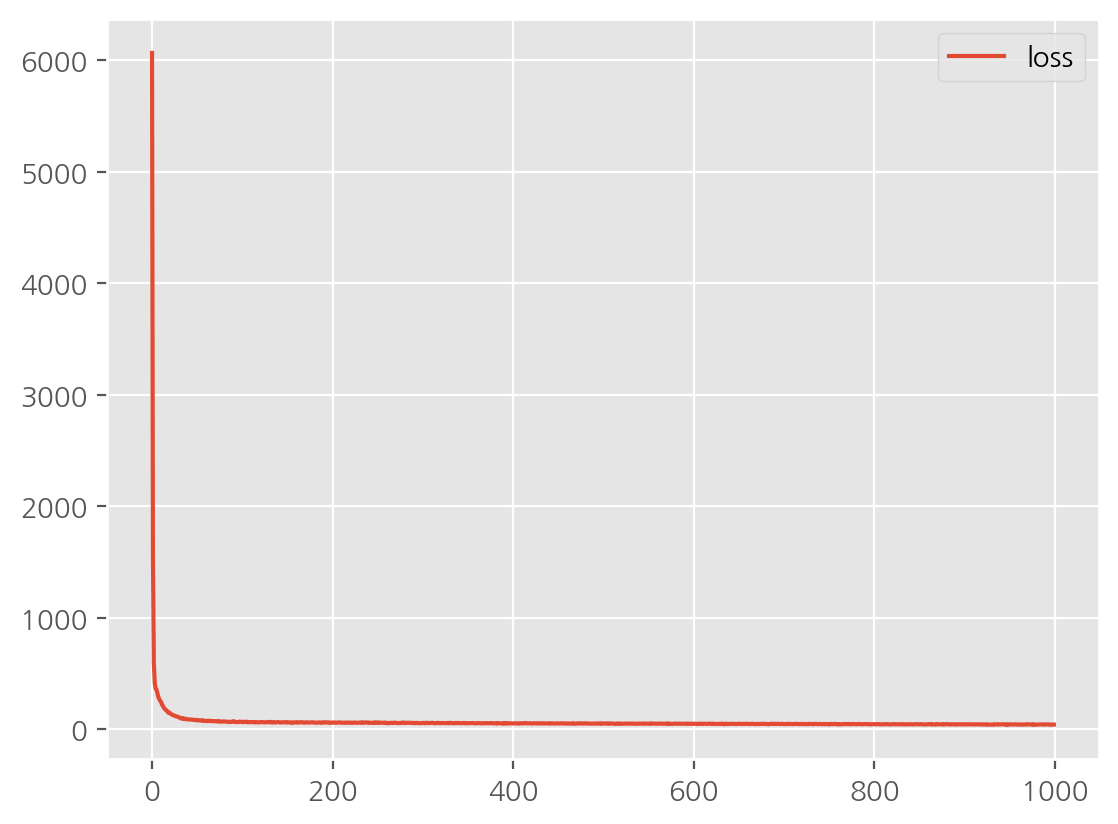

In [15]:
# loss plot

df_hist[["loss"]].plot()

In [16]:
# loss, mse, mae = model.evaluate
model.evaluate(X, y)

235/235 [==============================] - 1s 2ms/step - loss: 3.5194 - mse: 3.5194 - mae: 1.4516


[3.519366979598999, 3.519366979598999, 1.4516470432281494]

In [17]:
# predict
y_valid_pred = model.predict(X).flatten()
y_valid_pred[:5]

235/235 [==============================] - 1s 2ms/step


array([169.1722  ,  33.39212 ,  23.935287,  91.766075,  32.93918 ],
      dtype=float32)

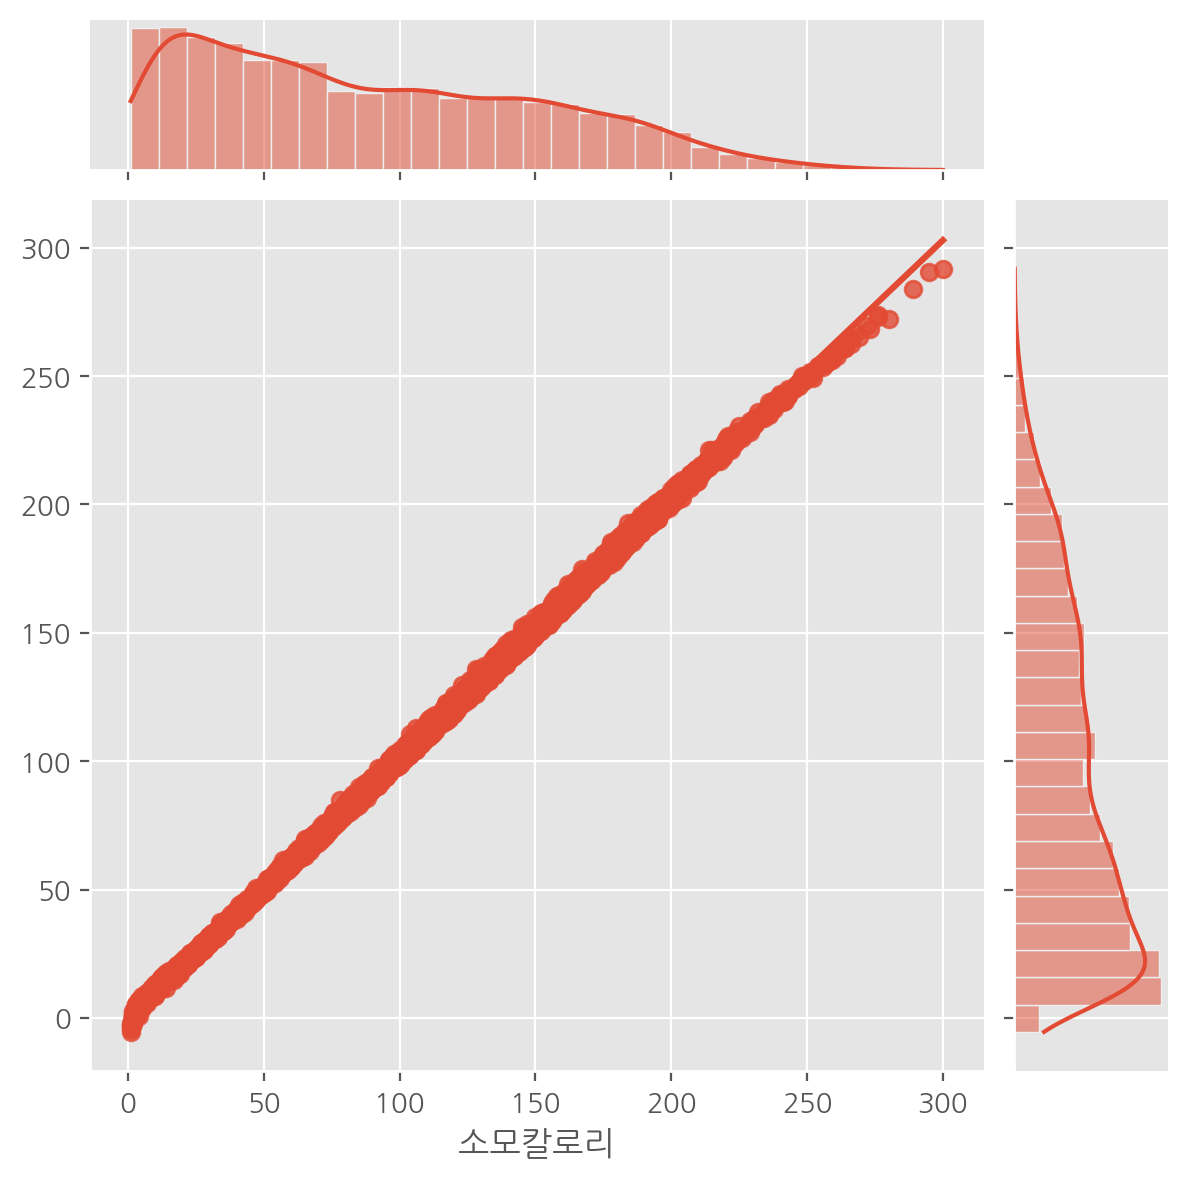

In [18]:
# jointplot
sns.jointplot(x=y, y=y_valid_pred, kind="reg")

In [19]:
from sklearn.metrics import r2_score

r2 = r2_score(y, y_valid_pred)
r2

0.9991079960052748

In [20]:
X_test = test_OHI 

In [21]:
y_predict = model.predict(X_test).flatten()
y_predict[:5]

235/235 [==============================] - 0s 1ms/step


array([174.54092 , 191.56093 ,  53.358677, 163.84196 , 228.31288 ],
      dtype=float32)

In [22]:
submission['Calories_Burned'] = y_predict

In [23]:
submission.to_csv('dl.csv', index = False)